# Importação do banco de dados

In [2]:
#libPaths()
#install.packages("readxl")
library(readxl)

In [3]:
bd<- read_excel("Planilha de dados_projetos LaNEx_planilha limpa2_080521 (1).xlsx",sheet = 1)
head(bd)
dim(bd)

ID,Diagnosis,Age,Sex,Comorbidity,Scholarity,IADL,BBS,STS,HG,...,DTC,STEP,FMT_IT,FMT_DT,MMSE,CDT,TMTA,DSF,DSB,VF
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,69.32512,1,2,3,1,56,10,23.5,...,36.852495,56,31.04,12.84,26,1,48,5,3,15
2,1,68.54757,1,2,4,1,56,11,27.9,...,1.004995,69,15.78,18.40,29,1,73,7,3,24
3,1,61.77960,1,5,4,1,56,15,21.7,...,14.662214,91,17.31,14.05,29,3,50,6,6,21
4,1,71.44695,1,2,2,1,56,18,23.7,...,29.813731,87,16.84,10.39,26,2,65,8,4,17
5,3,75.84394,2,0,4,NA,55,13,37.3,...,10.882431,105,82.00,138.00,26,2,56,8,6,18
6,1,71.32923,2,2,1,1,56,16,35.3,...,54.663985,131,112.43,16.00,26,1,47,7,6,14


[1] 192  23

In [4]:
bd<- bd[,-1]
summary(bd)

   Diagnosis          Age             Sex        Comorbidity      Scholarity   
 Min.   :1.000   Min.   :59.69   Min.   :1.00   Min.   :0.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:69.36   1st Qu.:1.00   1st Qu.:1.000   1st Qu.:2.000  
 Median :1.000   Median :74.28   Median :1.00   Median :2.000   Median :3.000  
 Mean   :1.693   Mean   :75.42   Mean   :1.24   Mean   :1.816   Mean   :2.861  
 3rd Qu.:3.000   3rd Qu.:81.49   3rd Qu.:1.00   3rd Qu.:2.000   3rd Qu.:4.000  
 Max.   :3.000   Max.   :97.18   Max.   :2.00   Max.   :8.000   Max.   :4.000  
                                                NA's   :13      NA's   :5      
      IADL            BBS             STS              HG       
 Min.   :1.000   Min.   :40.00   Min.   : 0.00   Min.   :11.70  
 1st Qu.:1.000   1st Qu.:54.00   1st Qu.: 9.25   1st Qu.:19.70  
 Median :1.000   Median :55.00   Median :11.50   Median :23.30  
 Mean   :1.374   Mean   :54.37   Mean   :11.65   Mean   :24.64  
 3rd Qu.:2.000   3rd Qu.:56.00   3r

# Análise exploratória

In [5]:
data<- na.omit(bd) 
dim(data) #140 idosos após remoção dos Nas
table(data$Diagnosis) #(93, 21 e 26)
str(data)
data$Sex<- as.integer(data$Sex)
data$IADL<- as.integer(data$IADL)

[1] 140  22


 1  2  3 
93 21 26 

tibble [140 x 22] (S3: tbl_df/tbl/data.frame)
 $ Diagnosis  : num [1:140] 1 1 1 1 1 1 1 2 3 3 ...
 $ Age        : num [1:140] 69.3 68.5 61.8 71.4 71.3 ...
 $ Sex        : num [1:140] 1 1 1 1 2 1 1 1 1 2 ...
 $ Comorbidity: num [1:140] 2 2 5 2 2 1 2 2 1 1 ...
 $ Scholarity : num [1:140] 3 4 4 2 1 4 4 4 1 4 ...
 $ IADL       : num [1:140] 1 1 1 1 1 1 1 1 2 2 ...
 $ BBS        : num [1:140] 56 56 56 56 56 56 54 55 54 55 ...
 $ STS        : num [1:140] 10 11 15 18 16 11 14 15 6 17 ...
 $ HG         : num [1:140] 23.5 27.9 21.7 23.7 35.3 19.7 17.9 25.1 15.9 36 ...
 $ GSST       : num [1:140] 1 1.02 1.18 1.1 1.48 ...
 $ GSDT       : num [1:140] 0.637 1.038 1.227 0.892 1.376 ...
 $ DeltaGS    : num [1:140] 0.3664 -0.0142 -0.0436 0.2134 0.1017 ...
 $ DTC        : num [1:140] 36.9 1 14.7 29.8 54.7 ...
 $ STEP       : num [1:140] 56 69 91 87 131 69 67 67 19 99 ...
 $ FMT_IT     : num [1:140] 31 15.8 17.3 16.8 112.4 ...
 $ FMT_DT     : num [1:140] 12.8 18.4 14.1 10.4 16 ...
 $ MMSE       : num [1

# PCA

Loading required package: psych



Error in solve.default(r) : 
  sistema é computacionalmente singular: condição recíproca número = 9.14738e-18


matrix is not invertible, image not found



Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data[, -1])
Overall MSA =  0.5
MSA for each item = 
        Age         Sex Comorbidity  Scholarity        IADL         BBS 
        0.5         0.5         0.5         0.5         0.5         0.5 
        STS          HG        GSST        GSDT     DeltaGS         DTC 
        0.5         0.5         0.5         0.5         0.5         0.5 
       STEP      FMT_IT      FMT_DT        MMSE         CDT        TMTA 
        0.5         0.5         0.5         0.5         0.5         0.5 
        DSF         DSB          VF 
        0.5         0.5         0.5 

Loading required package: FactoMineR

Warning message:
"package 'FactoMineR' was built under R version 3.6.3"
Loading required package: factoextra

Warning message:
"package 'factoextra' was built under R version 3.6.3"
Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,6.666414e+00,3.174483e+01,31.74483
Dim.2,2.352209e+00,1.120099e+01,42.94582
Dim.3,2.124949e+00,1.011880e+01,53.06463
Dim.4,1.554484e+00,7.402307e+00,60.46693
Dim.5,1.252056e+00,5.962170e+00,66.42910
Dim.6,9.712860e-01,4.625172e+00,71.05427
Dim.7,9.198776e-01,4.380370e+00,75.43464
Dim.8,7.562931e-01,3.601396e+00,79.03604
Dim.9,6.922245e-01,3.296307e+00,82.33235


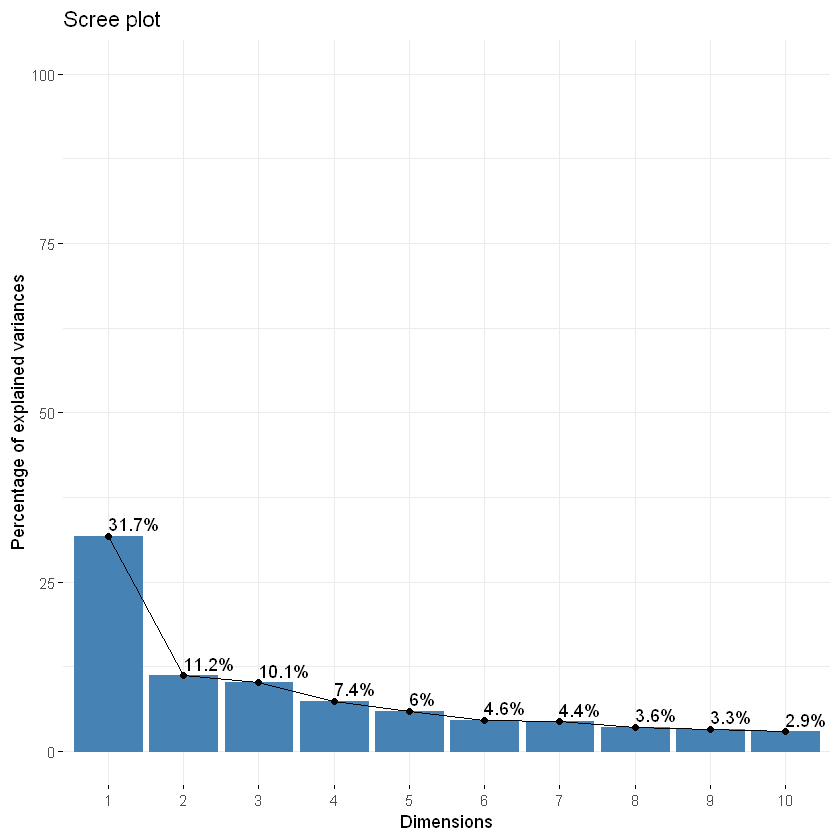

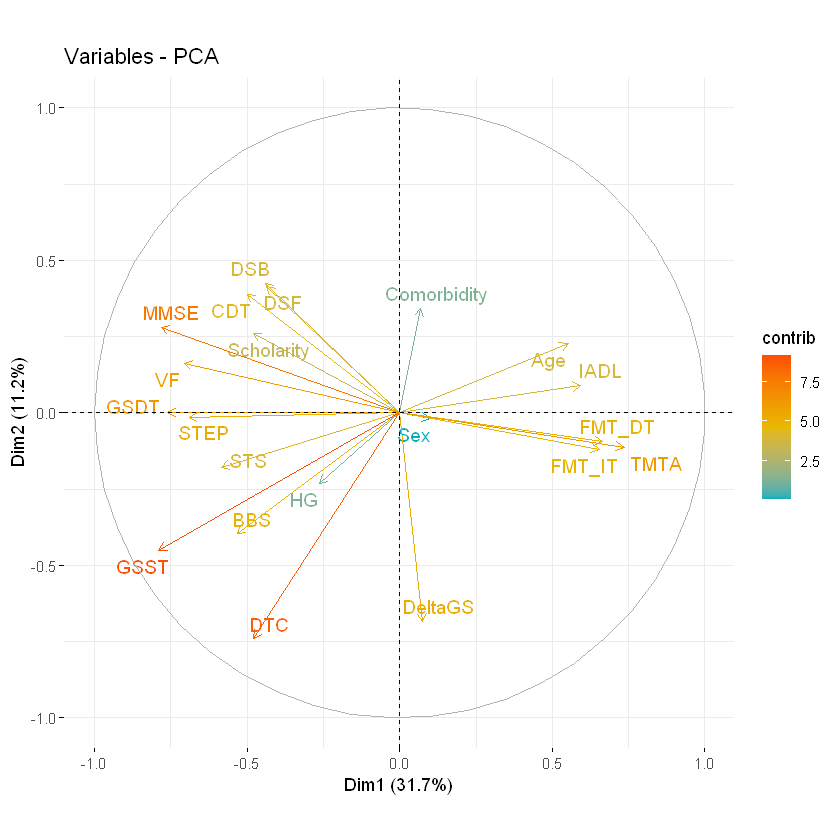

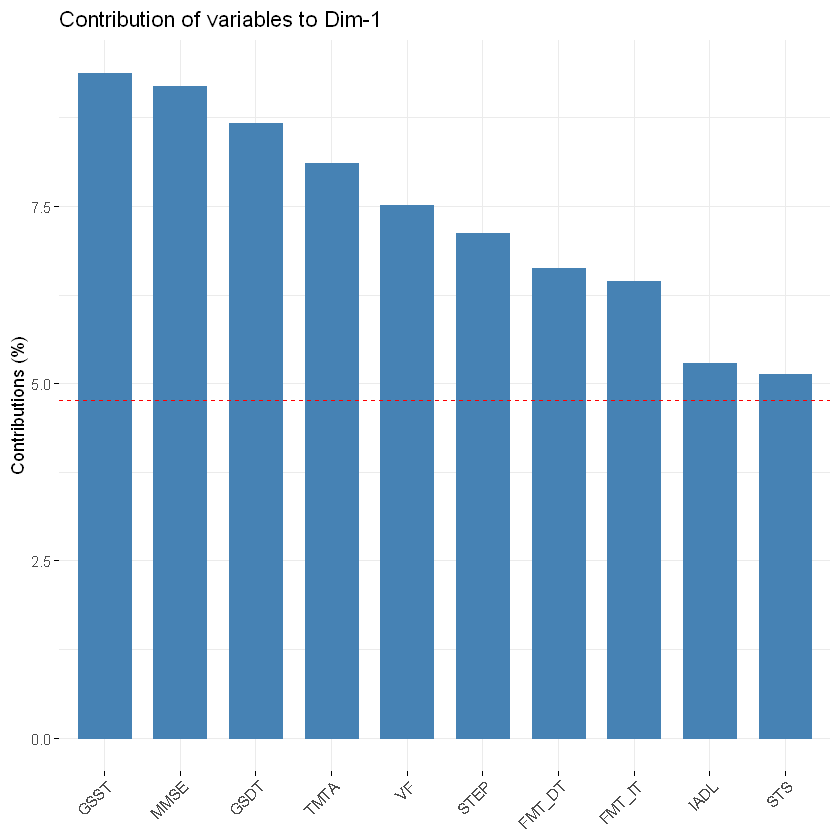

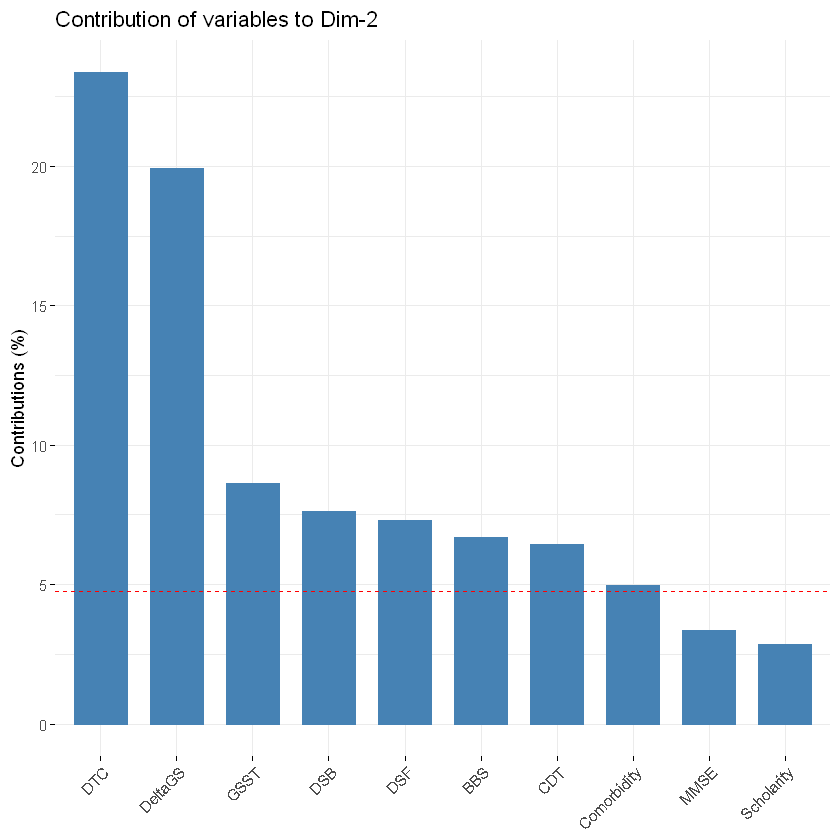

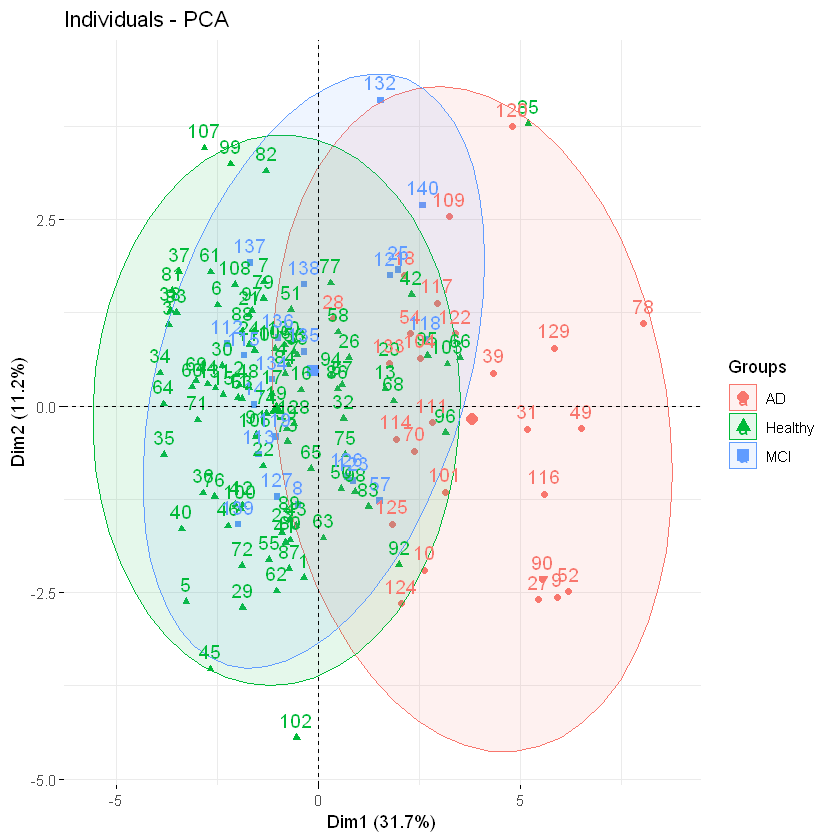

In [5]:
#Teste KMO (verifica se um modelo de FA é adequado aos dados)
#install.packages("psych")
require(psych)
KMO(data[,-1]) #0.5-aceitável. Acima de 0.85-recomendado
#install.packages("FactoMineR")
#install.packages("factoextra")
require(FactoMineR)
require(factoextra)
PCA<- prcomp(data[,-1],scale. = T)
eig.val<- get_eigenvalue(PCA)
eig.val
#Scree plot
fviz_eig(PCA,addlabels = T,ylim=c(0,100))
#Extrair os resultados das variáveis do PCA p/ plotar no gráfico
var<- get_pca_var(PCA)
ind<- get_pca_ind(PCA)
fviz_pca_var(PCA,col.var="contrib",gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = T)
#Contribuição das variáveis para a 1ª e 2ª dimensão
fviz_contrib(PCA, choice = "var", axes = 1, top = 10) 
fviz_contrib(PCA, choice = "var", axes = 2, top = 10)
#Criar grupos p/ ajudar na visualização do gráfico
Labels= data$Diagnosis
Labels<- as.numeric(Labels)
Labels[Labels==1]<- "Healthy"
Labels[Labels==2]<- "MCI"
Labels[Labels==3]<- "AD"
Labels<- as.factor(Labels)
fviz_pca_ind(PCA,geom= c("point","text"),habillage = Labels,addEllipses = T)

# Distribuição das classes

tibble [140 x 22] (S3: tbl_df/tbl/data.frame)
 $ Diagnosis  : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 2 3 3 ...
 $ Age        : num [1:140] 69.3 68.5 61.8 71.4 71.3 ...
 $ Sex        : Factor w/ 2 levels "1","2": 1 1 1 1 2 1 1 1 1 2 ...
 $ Comorbidity: num [1:140] 2 2 5 2 2 1 2 2 1 1 ...
 $ Scholarity : Factor w/ 4 levels "1","2","3","4": 3 4 4 2 1 4 4 4 1 4 ...
 $ IADL       : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 2 2 ...
 $ BBS        : num [1:140] 56 56 56 56 56 56 54 55 54 55 ...
 $ STS        : num [1:140] 10 11 15 18 16 11 14 15 6 17 ...
 $ HG         : num [1:140] 23.5 27.9 21.7 23.7 35.3 19.7 17.9 25.1 15.9 36 ...
 $ GSST       : num [1:140] 1 1.02 1.18 1.1 1.48 ...
 $ GSDT       : num [1:140] 0.637 1.038 1.227 0.892 1.376 ...
 $ DeltaGS    : num [1:140] 0.3664 -0.0142 -0.0436 0.2134 0.1017 ...
 $ DTC        : num [1:140] 36.9 1 14.7 29.8 54.7 ...
 $ STEP       : num [1:140] 56 69 91 87 131 69 67 67 19 99 ...
 $ FMT_IT     : num [1:140] 31 15.8 17.3 16.8 112.4 ...
 

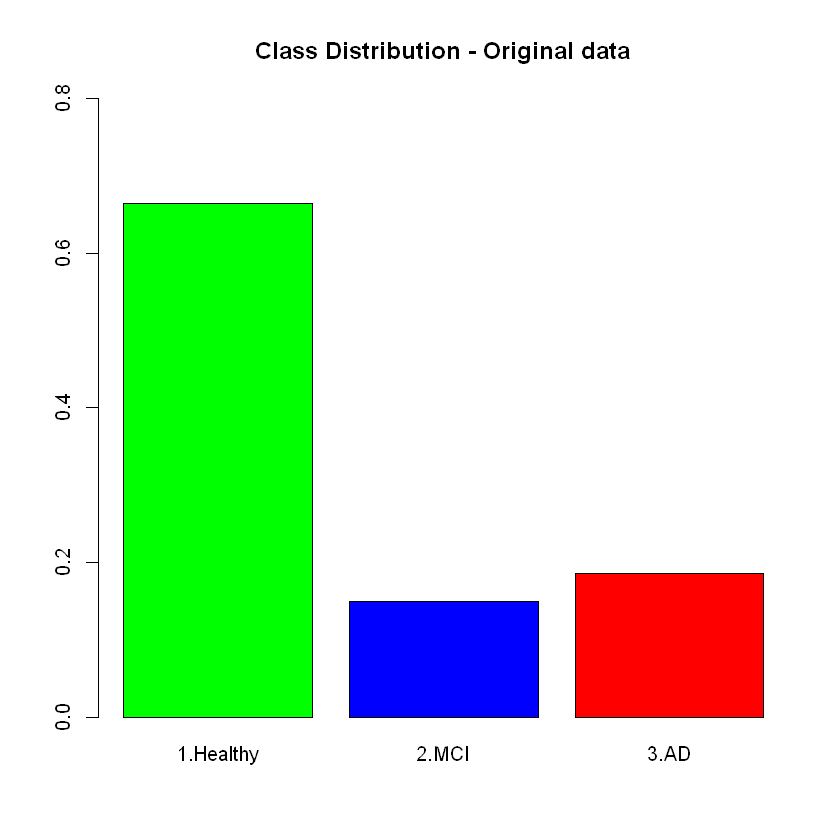

In [6]:
data$Diagnosis<- as.factor(data$Diagnosis)
data$Sex<- as.factor(data$Sex)
data$Scholarity<- as.factor(data$Scholarity)
data$IADL<- as.factor(data$IADL)
str(data)
classes= data$Diagnosis
classes<- as.numeric(classes)
classes[classes==1]<- "1.Healthy"
classes[classes==2]<- "2.MCI"
classes[classes==3]<- "3.AD"
classes<- as.factor(classes)
barplot(prop.table(table(classes)),
        col=c("green","blue","red"),ylim=c(0,0.8),main="Class Distribution - Original data") #Classes desbalanceadas - Data augmentation

# Divisão em amostras de treino e de teste

In [7]:
#install.packages("caret")
require(caret)
set.seed(555)
train<- createDataPartition(data$Diagnosis,p=0.7,list=F)
data_train<- data[train,]
data_test<- data[-train,]
table(data_train$Diagnosis) #(66,15,19) 
table(data_test$Diagnosis) #(27,6,7)

Loading required package: caret

Loading required package: lattice




 1  2  3 
66 15 19 


 1  2  3 
27  6  7 

# RFE-RF

Loading required package: e1071

Loading required package: randomForest

Warning message:
"package 'randomForest' was built under R version 3.6.3"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin





Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD  KappaSD Selected
         2   0.7692 0.5078   0.061486 0.130465         
         3   0.8393 0.6327   0.028038 0.070873         
         4   0.7993 0.5711   0.040549 0.094472         
         5   0.7888 0.5499   0.047767 0.100760         
         6   0.8188 0.6037   0.051204 0.118256         
         7   0.8388 0.6599   0.046207 0.081962         
         8   0.8498 0.6659   0.005321 0.007723         
         9   0.8494 0.6686   0.037280 0.085031        *
        10   0.8283 0.6216   0.063154 0.140765         
        11   0.8293 0.6266   0.031925 0.077567         
        12   0.8203 0.6050   0.054787 0.129692         
        13   0.8298 0.6258   0.045446 0.109323         
        14   0.8298 0.6217   0.045446 0.112103         
        15   0.8293 0.6198   0.031925 0.071056         
        16   0.8198 0.5978   0.02846

[1] "MMSE"   "IADL"   "GSDT"   "FMT_DT" "FMT_IT" "GSST"   "TMTA"   "STEP"  
[9] "Age"

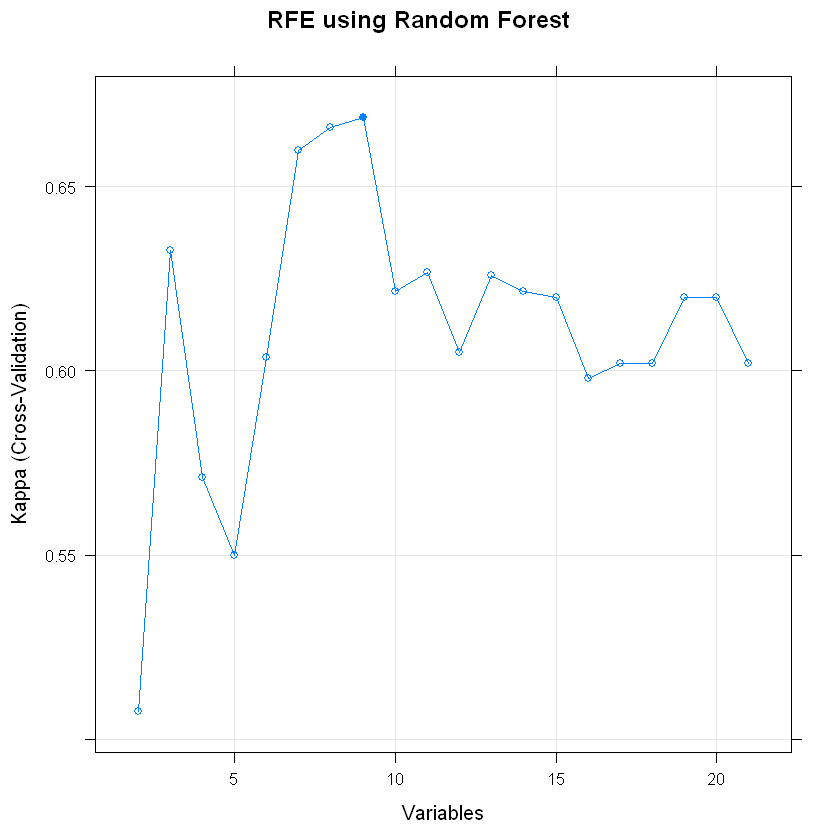

In [8]:
#install.packages("e1071")
require(e1071)
#install.packages("randomForest")
require(randomForest)
set.seed(2)
control <- rfeControl(functions=rfFuncs, method="cv", number=5)
set.seed(3)
results <- rfe(data_train[,2:22], data_train[[1]], sizes=c(2:22),rfeControl=control,metric=ifelse(is.factor(data_train$Diagnosis),"Kappa","RMSE"))
print(results) #9 variáveis + diagnosis
#list the chosen features
predictors(results)
#plot the results
plot(results, type=c("g", "o"),main="RFE using Random Forest")

# Random Forest a partir do subset do RFE-RF

Diagnosis,MMSE,IADL,GSDT,FMT_DT,FMT_IT,GSST,TMTA,STEP,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,1,0.6369427,12.84,31.04,1.0033445,48,56,69.32512
1,29,1,1.0380623,18.40,15.78,1.0238908,73,69,68.54757
1,29,1,1.2269939,14.05,17.31,1.1834320,50,91,61.77960
1,26,1,0.8915305,10.39,16.84,1.1049724,65,87,71.44695
1,29,1,1.1560694,23.69,17.57,1.0830325,43,69,70.00000
1,28,1,0.7802341,34.65,18.59,0.8784773,55,67,83.04723


Random Forest 

100 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 79, 81, 80, 80 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8108020  0.5897794
  5     0.8012782  0.5670567
  9     0.7707519  0.5028310

Kappa was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18%
Confusion matrix:
   1 2  3 class.error
1 64 0  2  0.03030303
2 11 1  3  0.93333333
3  2 0 17  0.10526316

Confusion Matrix and Statistics

             
RF_prediction  1  2  3
            1 26  6  1
            2  0  0  0
            3  1  0  6

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.6435, 0.9095)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.0602          
                                          
                  Kappa : 0.5152          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9630     0.00   0.8571
Specificity            0.4615     1.00   0.9697
Pos Pred Value         0.7879      NaN   0.8571
Neg Pred Value         0.8571     0.85   0.9697
Prevalence             0.6750     0.15   0.1750
Detection Rate         0.6500     0.00   0.1500
Detection Prevalence   0.8250     0.00   0.1750
Balanced Accuracy      0.7123     0.50   0.9134

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.9629630,0.4615385,0.7878788,0.8571429,0.7878788,0.9629630,0.8666667,0.675,0.65,0.825,0.7122507
Class: 2,0.0000000,1.0000000,NaN,0.8500000,NA,0.0000000,NA,0.150,0.00,0.000,0.5000000
Class: 3,0.8571429,0.9696970,0.8571429,0.9696970,0.8571429,0.8571429,0.8571429,0.175,0.15,0.175,0.9134199


rf variable importance

       Overall
MMSE    100.00
GSDT     59.25
IADL2    53.74
FMT_IT   47.34
FMT_DT   43.58
GSST     36.83
TMTA     27.15
Age      20.44
STEP      0.00

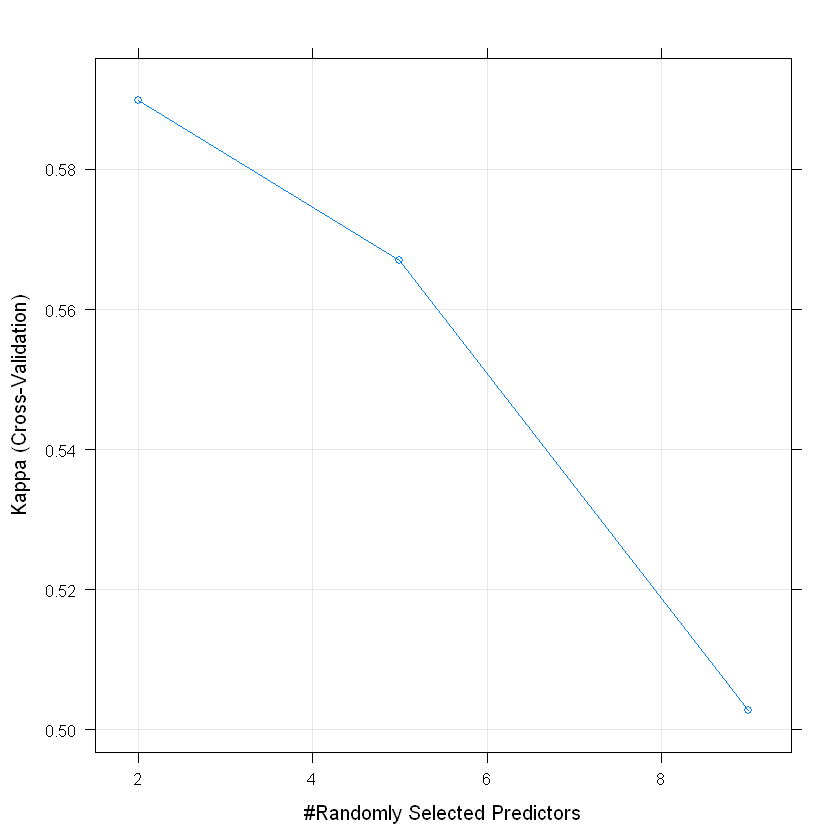

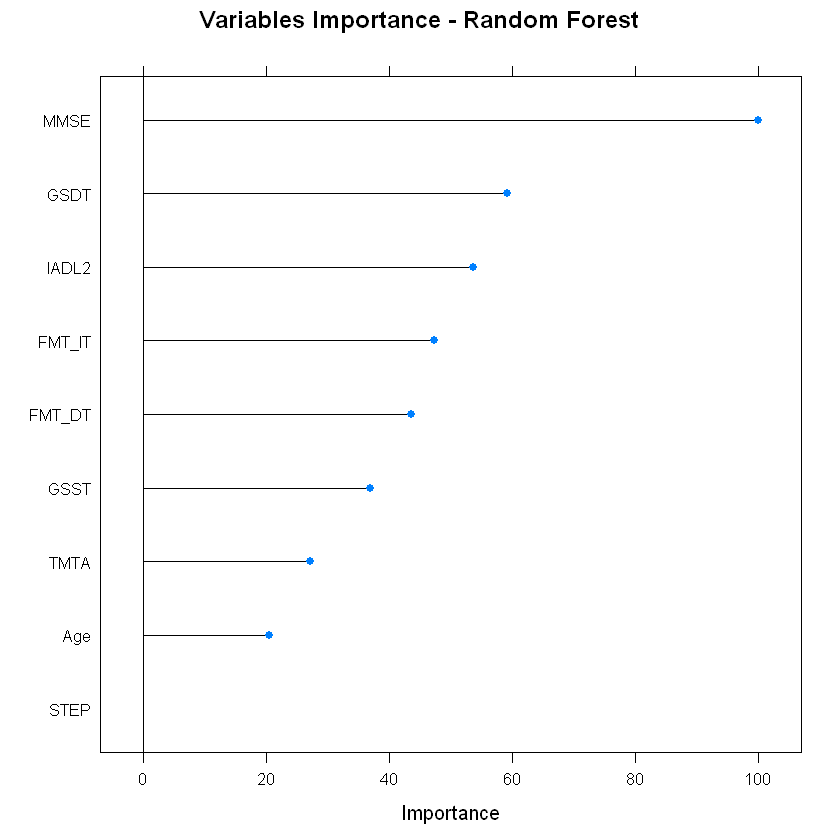

In [9]:
data_train_rfe<- data_train[,c("Diagnosis","MMSE",
                   "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
data_test_rfe<- data_test[,c("Diagnosis","MMSE",
                  "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
head(data_train_rfe)
set.seed(4)
RF_model1=train(Diagnosis~.,data=data_train_rfe,method='rf',metric=ifelse(is.factor(data_train_rfe$Diagnosis),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_model1 #Acurácia de 81.08% e kappa= 58,97%
plot(RF_model1)
#RF_model1$pred
#mtry2<- subset(RF_model1$pred,RF_model1$pred[4]==2)
#mtry2

fold1= subset(RF_model1$pred,RF_model1$pred[5]=="Fold1")
fold1_metrics_rf= confusionMatrix(table(fold1$pred,fold1$obs))$byClass
recall1_rf_original=fold1_metrics_rf[17]
F1score1_rf_original=fold1_metrics_rf[20]

fold2= subset(RF_model1$pred,RF_model1$pred[5]=="Fold2")
fold2_metrics_rf= confusionMatrix(table(fold2$pred,fold2$obs))$byClass
recall2_rf_original=fold2_metrics_rf[17]
F1score2_rf_original=fold2_metrics_rf[20]

fold3= subset(RF_model1$pred,RF_model1$pred[5]=="Fold3")
fold3_metrics_rf= confusionMatrix(table(fold3$pred,fold3$obs))$byClass
recall3_rf_original=fold3_metrics_rf[17]
F1score3_rf_original=fold3_metrics_rf[20]

fold4= subset(RF_model1$pred,RF_model1$pred[5]=="Fold4")
fold4_metrics_rf= confusionMatrix(table(fold4$pred,fold4$obs))$byClass
recall4_rf_original=fold4_metrics_rf[17]
F1score4_rf_original=fold4_metrics_rf[20]

fold5= subset(RF_model1$pred,RF_model1$pred[5]=="Fold5")
fold5_metrics_rf= confusionMatrix(table(fold5$pred,fold5$obs))$byClass
recall5_rf_original=fold5_metrics_rf[17]
F1score5_rf_original=fold5_metrics_rf[20]

RF_model1$finalModel #Acurácia=82%
RF_prediction<- predict(RF_model1,data_test_rfe)
confusionMatrix(table(RF_prediction,data_test_rfe$Diagnosis)) #Acurácia=80% e Kappa=51.52% 
confusionMatrix(table(RF_prediction,data_test_rfe$Diagnosis))$byClass #Recall e F1 CCL(0 e NA) 
varImp(RF_model1)
plot(varImp(RF_model1),main="Variables Importance - Random Forest")

In [10]:
Recall_OriginalData<- c(recall1_rf_original,recall2_rf_original,recall3_rf_original,recall4_rf_original,recall5_rf_original)
F1_OriginalData<- c(F1score1_rf_original,F1score2_rf_original,F1score3_rf_original,F1score4_rf_original,F1score5_rf_original)
Recall_OriginalData
F1_OriginalData

[1] 0.0000000 0.0000000 0.0000000 0.3333333 0.0000000

[1]       NaN       NaN        NA 0.3333333        NA

# RFE-DT


Recursive feature selection

Outer resampling method: Cross-Validated (5 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         2     0.80 0.5746    0.03536 0.05111         
         3     0.78 0.5188    0.07583 0.12823         
         4     0.78 0.5359    0.11511 0.25259         
         5     0.81 0.5797    0.02236 0.05708         
         6     0.80 0.5699    0.03536 0.09248         
         7     0.82 0.6080    0.02739 0.07927         
         8     0.81 0.5927    0.02236 0.05559         
         9     0.83 0.6263    0.04472 0.11492        *
        10     0.83 0.6160    0.05701 0.15194         
        11     0.82 0.6102    0.02739 0.08332         
        12     0.80 0.5631    0.03536 0.08253         
        13     0.81 0.5921    0.02236 0.05485         
        14     0.81 0.5770    0.02236 0.04723         
        15     0.81 0.5770    0.02236 0.04723         
        16     0.82 0.6017    0.02739 0.06842      

[1] "MMSE"   "IADL"   "GSDT"   "FMT_DT" "FMT_IT" "GSST"   "TMTA"   "Sex"   
[9] "Age"

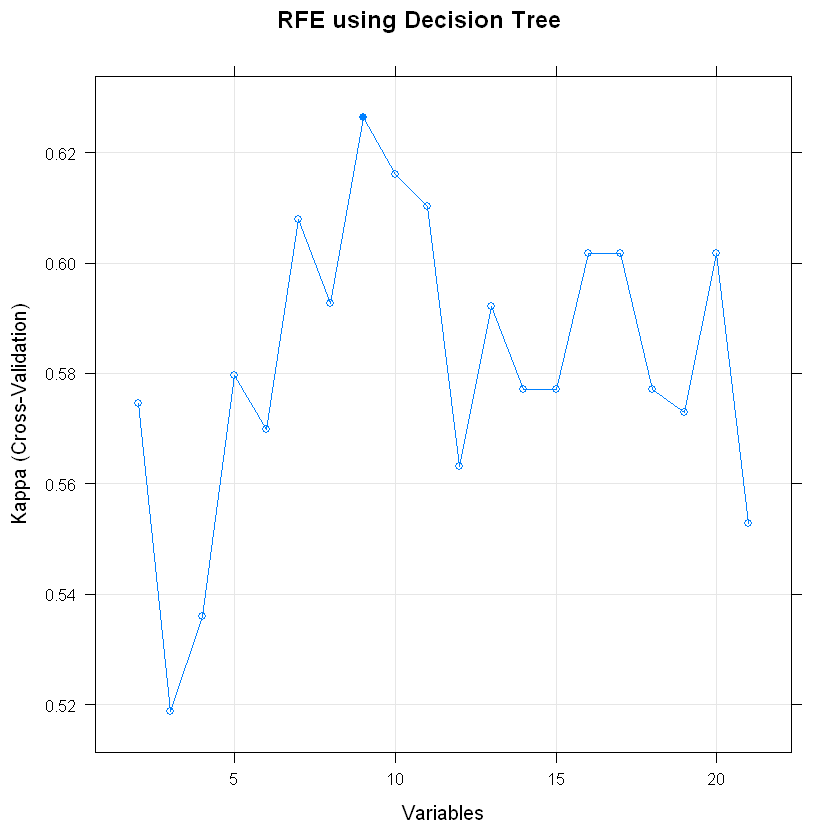

In [11]:
set.seed(22)
control2 <- rfeControl(functions=treebagFuncs, method="cv", number=5)
set.seed(33)
results2 <- rfe(data_train[,2:22], data_train[[1]], sizes=c(2:22),
                rfeControl=control,metric=ifelse(is.factor(data_train$Diagnosis),"Kappa","RMSE"))
print(results2) #9 variáveis + diagnosis
#list the chosen features
predictors(results2)
#plot the results
plot(results2, type=c("g", "o"),main="RFE using Decision Tree")

# Decision tree a partir do subset do RFE-DT

Diagnosis,MMSE,IADL,GSDT,FMT_DT,FMT_IT,GSST,TMTA,Sex,Age
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,26,1,0.6369427,12.84,31.04,1.0033445,48,1,69.32512
1,29,1,1.0380623,18.40,15.78,1.0238908,73,1,68.54757
1,29,1,1.2269939,14.05,17.31,1.1834320,50,1,61.77960
1,26,1,0.8915305,10.39,16.84,1.1049724,65,1,71.44695
1,29,1,1.1560694,23.69,17.57,1.0830325,43,1,70.00000
1,28,1,0.7802341,34.65,18.59,0.8784773,55,1,83.04723


CART 

100 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 80, 80, 79, 81, 80 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8103759  0.5738326
  0.05882353  0.7998496  0.5383441
  0.47058824  0.7101754  0.1869312

Kappa was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

n= 100 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 100 34 1 (0.66000000 0.15000000 0.19000000)  
   2) MMSE>=23.5 82 16 1 (0.80487805 0.15853659 0.03658537)  
     4) FMT_IT< 33.145 54  3 1 (0.94444444 0.05555556 0.00000000) *
     5) FMT_IT>=33.145 28 13 1 (0.53571429 0.35714286 0.10714286)  
      10) Age< 72.44079 11  1 1 (0.90909091 0.09090909 0.00000000) *
      11) Age>=72.44079 17  8 2 (0.29411765 0.52941176 0.17647059) *
   3) MMSE< 23.5 18  2 3 (0.00000000 0.11111111 0.88888889) *

Loading required package: rpart.plot

Loading required package: rpart



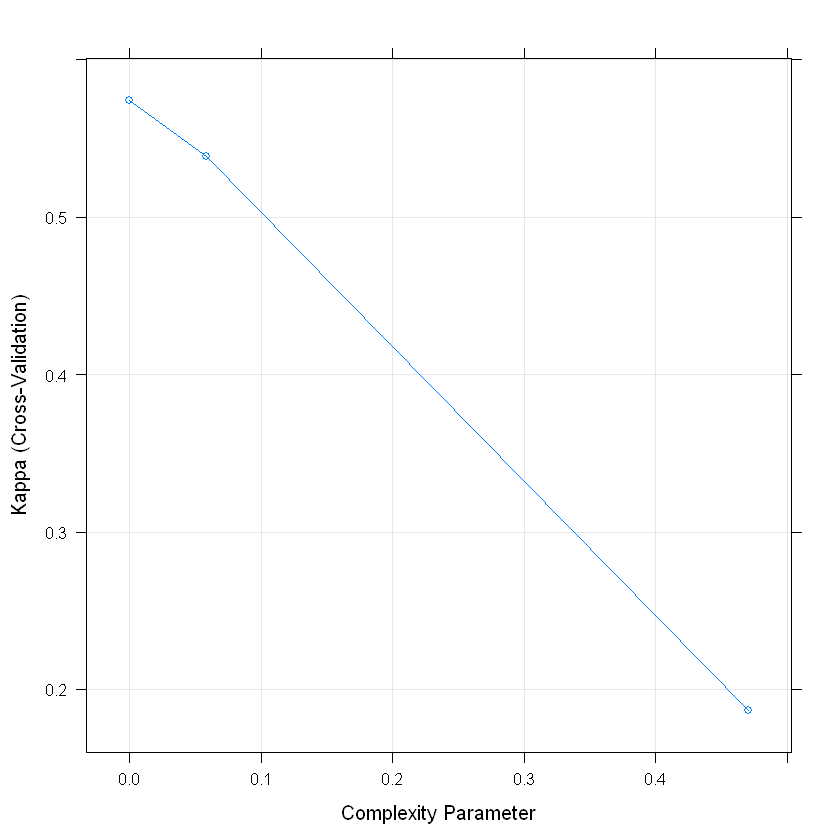

Confusion Matrix and Statistics

               
Tree_prediction  1  2  3
              1 24  6  1
              2  3  0  0
              3  0  0  6

Overall Statistics
                                         
               Accuracy : 0.75           
                 95% CI : (0.588, 0.8731)
    No Information Rate : 0.675          
    P-Value [Acc > NIR] : 0.2011         
                                         
                  Kappa : 0.431          
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.8889   0.0000   0.8571
Specificity            0.4615   0.9118   1.0000
Pos Pred Value         0.7742   0.0000   1.0000
Neg Pred Value         0.6667   0.8378   0.9706
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.6000   0.0000   0.1500
Detection Prevalence   0.7750   0.0750   0.1500
Balanced Accuracy      0.6752   0.4559   0.928

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.8888889,0.4615385,0.7741935,0.6666667,0.7741935,0.8888889,0.8275862,0.675,0.60,0.775,0.6752137
Class: 2,0.0000000,0.9117647,0.0000000,0.8378378,0.0000000,0.0000000,NaN,0.150,0.00,0.075,0.4558824
Class: 3,0.8571429,1.0000000,1.0000000,0.9705882,1.0000000,0.8571429,0.9230769,0.175,0.15,0.150,0.9285714


rpart variable importance

       Overall
IADL2   100.00
MMSE     86.56
GSST     71.34
GSDT     61.49
FMT_DT   50.85
Age      37.42
FMT_IT   33.40
Sex2     11.26
TMTA      0.00

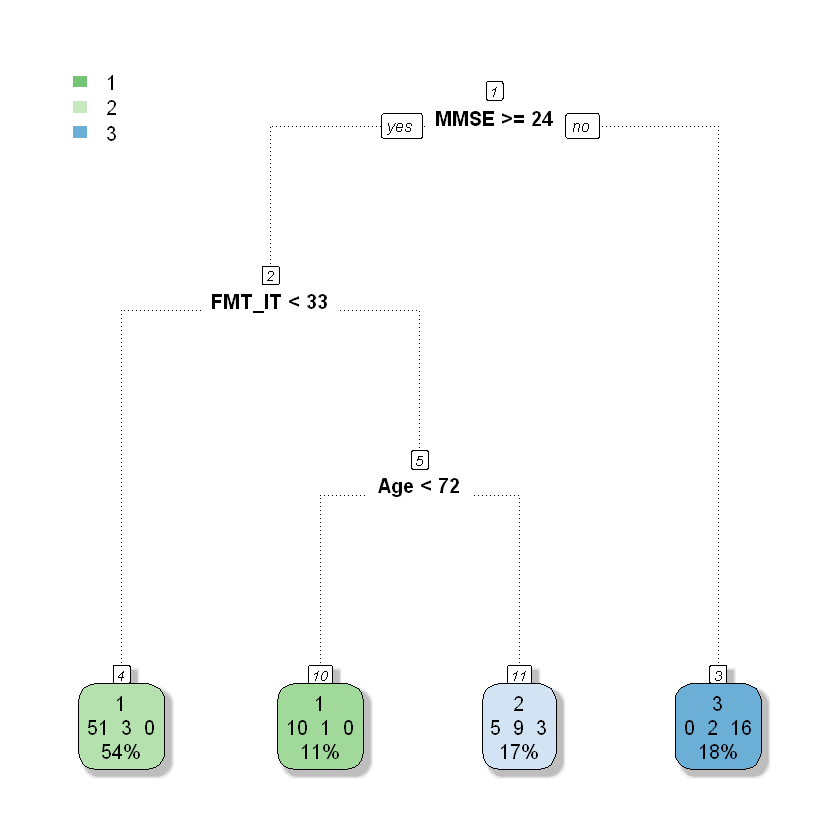

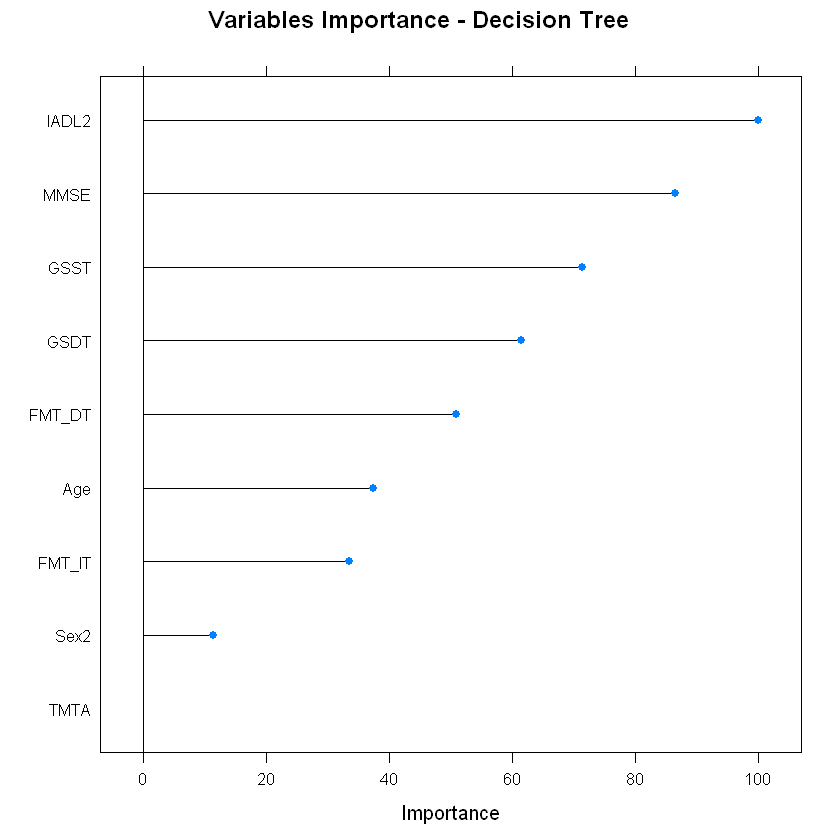

In [12]:
data_train_rfe2<- data_train[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
data_test_rfe2<- data_test[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
head(data_train_rfe2)
set.seed(44)
Tree_model1=train(Diagnosis~.,data=data_train_rfe2,method='rpart',metric=ifelse(is.factor(data_train_rfe$Diagnosis),"Kappa","RMSE"),trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model1 #Acurácia=81.03% e kappa=57.38% e cp=0
#Tree_model1$pred
predicition_Treemodel1<- predict(Tree_model1,data_test_rfe2)
Metrics_Treemodel1<- confusionMatrix(predicition_Treemodel1,data_test_rfe2$Diagnosis)$byClass

fold1_tree= subset(Tree_model1$pred,Tree_model1$pred[5]=="Fold1")
fold1_metrics_tree= confusionMatrix(table(fold1_tree$pred,fold1_tree$obs))$byClass
recall1_tree_original=fold1_metrics_tree[17]
F1score1_tree_original=fold1_metrics_tree[20]

fold2_tree= subset(Tree_model1$pred,Tree_model1$pred[5]=="Fold2")
fold2_metrics_tree= confusionMatrix(table(fold2_tree$pred,fold2_tree$obs))$byClass
recall2_tree_original=fold2_metrics_tree[17]
F1score2_tree_original=fold2_metrics_tree[20]

fold3_tree= subset(Tree_model1$pred,Tree_model1$pred[5]=="Fold3")
fold3_metrics_tree= confusionMatrix(table(fold3_tree$pred,fold3_tree$obs))$byClass
recall3_tree_original=fold3_metrics_tree[17]
F1score3_tree_original=fold3_metrics_tree[20]

fold4_tree= subset(Tree_model1$pred,Tree_model1$pred[5]=="Fold4")
fold4_metrics_tree= confusionMatrix(table(fold4_tree$pred,fold4_tree$obs))$byClass
recall4_tree_original=fold4_metrics_tree[17]
F1score4_tree_original=fold4_metrics_tree[20]

fold5_tree= subset(Tree_model1$pred,Tree_model1$pred[5]=="Fold5")
fold5_metrics_tree= confusionMatrix(table(fold5_tree$pred,fold5_tree$obs))$byClass
recall5_tree_original=fold5_metrics_tree[17]
F1score5_tree_original=fold5_metrics_tree[20]

plot(Tree_model1)
Tree_model1$finalModel
#install.packages("rpart.plot")
require(rpart.plot)
rpart.plot(Tree_model1$finalModel,type=0,extra=101,box.palette = "GnBu",
           branch.lty=3,shadow.col = "gray",nn=T,cex=1) 
Tree_prediction<- predict(Tree_model1,data_test_rfe2)
confusionMatrix(table(Tree_prediction,data_test_rfe2$Diagnosis)) #Acurácia=75% e Kappa=43.10% 
confusionMatrix(table(Tree_prediction,data_test_rfe2$Diagnosis))$byClass #Recall e F1 CCL(0 e NA) 
varImp(Tree_model1)
plot(varImp(Tree_model1),main="Variables Importance - Decision Tree")

In [14]:
Recall_OriginalData_tree<- c(recall1_tree_original,recall2_tree_original,recall3_tree_original,recall4_tree_original,recall5_tree_original)
F1score_OriginalData_tree<- c(F1score1_tree_original,F1score2_tree_original,F1score3_tree_original,F1score4_tree_original,F1score5_tree_original)
Recall_OriginalData_tree
F1score_OriginalData_tree

[1] 0.0000000 0.0000000 0.0000000 0.2222222 0.0000000

[1]       NaN        NA        NA 0.3333333        NA

# Data augmentation

## 5-fold cross-validation

In [17]:
set.seed(111)
train_folds <- createFolds(data$Diagnosis, k = 5, list = T, returnTrain = T)
#sapply(folds_treino,length)
train_fold01<- data[train_folds$Fold1,]
test_fold01<- data[-train_folds$Fold1,]
table(train_fold01$Diagnosis)#(75,16,21) 
table(test_fold01$Diagnosis) #(18,5,5)



 1  2  3 
75 16 21 


 1  2  3 
18  5  5 

## SMOTE 

### fold 1

In [18]:
#install.packages("smotefamily")
require(smotefamily)
train_fold01$Sex<- as.numeric(train_fold01$Sex)
train_fold01$Scholarity<- as.numeric(train_fold01$Scholarity)
train_fold01$IADL<- as.numeric(train_fold01$IADL)
test_fold01$Sex<- as.numeric(test_fold01$Sex)
test_fold01$Scholarity<- as.numeric(test_fold01$Scholarity)
test_fold01$IADL<- as.numeric(test_fold01$IADL)

#sau e ccl
train_fold01$Diagnosis<-as.numeric(train_fold01$Diagnosis)
train_fold01_ccl<- train_fold01[train_fold01$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold01_ccl$Diagnosis) #(75,16)
train_fold01_ccl$Diagnosis<- as.factor(train_fold01_ccl$Diagnosis)
set.seed(100)
train_fold01_smote<- SMOTE(train_fold01_ccl[,-1],train_fold01_ccl[,1],K=1)
train_fold01_smote_ccl<- train_fold01_smote$data
table(train_fold01_smote_ccl$class) #(75,64)
#Sau e DA
train_fold01$Diagnosis<-as.numeric(train_fold01$Diagnosis)
train_fold01_da<- train_fold01[train_fold01$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold01_da$Diagnosis) #(75,21)
train_fold01_da$Diagnosis<- as.factor(train_fold01_da$Diagnosis)
set.seed(200)
train_fold01_smote2<- SMOTE(train_fold01_da[,-1],train_fold01_da[,1],K=1)
train_fold01_smote_da<- train_fold01_smote2$data
table(train_fold01_smote_da$class) #(75,63)
#Unindo DA do smote_data_da com o smote_data_ccl
train_fold01_smote_da2<- train_fold01_smote_da[1:63,]
train_fold01_smote_final<- rbind(train_fold01_smote_ccl,train_fold01_smote_da2)
dim(train_fold01_smote_final) #202 x 22
train_fold01_smote_final$class<- as.factor(train_fold01_smote_final$class)
table(train_fold01_smote_final$class) #(75,64,63)
names(train_fold01_smote_final)[22]<- "Diagnosis"



 1  2 
75 16 


 1  2 
75 64 


 1  3 
75 21 


 1  3 
75 63 

[1] 202  22


 1  2  3 
75 64 63 

In [19]:
#Treinamento do modelo1 - RF - *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
train_fold01_smote_final1<- train_fold01_smote_final[,c("Diagnosis","MMSE",
                                                       "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(300)
rf_fold01_smote<- randomForest(train_fold01_smote_final1$Diagnosis~.,data = train_fold01_smote_final1) 
rf_fold01_smote #taxa de erro = 6,93%
#Validação do modelo1
test_fold011<- test_fold01[,c("Diagnosis","MMSE",
                             "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_smote_fold01<- predict(rf_fold01_smote,test_fold011)
Metrics_smote_fold01<- confusionMatrix(prediction_smote_fold01,test_fold011$Diagnosis)$byClass #Recall e F1 ccl (0.2 e 0.2)
#Acurácia=67.86% e kappa=40.43% 
Metrics_smote_fold01<- as.list(Metrics_smote_fold01)

#Treinamento do modelo1 - árvore
set.seed(301)
train_fold01_smote_final2<- train_fold01_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold01_smote<- rpart(train_fold01_smote_final2$Diagnosis~.,data=train_fold01_smote_final2,method = "class")
test_fold012<- test_fold01[,c("Diagnosis","MMSE",
                             "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_smote_tree_fold01<- predict(tree_fold01_smote,test_fold012,type = "class")
Metrics_smote_tree_fold01<- confusionMatrix(prediction_smote_tree_fold01,test_fold012$Diagnosis)$byClass #Recall e F1 ccl (0.2 e 0.18)
#Acurácia= 64.29% e kappa= 35.78%


Call:
 randomForest(formula = train_fold01_smote_final1$Diagnosis ~      ., data = train_fold01_smote_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 6.93%
Confusion matrix:
   1  2  3 class.error
1 67  8  0   0.1066667
2  5 58  1   0.0937500
3  0  0 63   0.0000000

### fold 2

In [24]:
train_fold02<- data[train_folds$Fold2,]
test_fold02<- data[-train_folds$Fold2,]
table(train_fold02$Diagnosis) #(75,17,21)
table(test_fold02$Diagnosis) #(18,4,5)
train_fold02$Sex<- as.numeric(train_fold02$Sex)
train_fold02$Scholarity<- as.numeric(train_fold02$Scholarity)
train_fold02$IADL<- as.numeric(train_fold02$IADL)
test_fold02$Sex<- as.numeric(test_fold02$Sex)
test_fold02$Scholarity<- as.numeric(test_fold02$Scholarity)
test_fold02$IADL<- as.numeric(test_fold02$IADL)

#sau e ccl
train_fold02$Diagnosis<-as.numeric(train_fold02$Diagnosis)
train_fold02_ccl<- train_fold02[train_fold02$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold02_ccl$Diagnosis) #(75,17)
train_fold02_ccl$Diagnosis<- as.factor(train_fold02_ccl$Diagnosis)
set.seed(101)
train_fold02_smote<- SMOTE(train_fold02_ccl[,-1],train_fold02_ccl[,1],K=1)
train_fold02_smote_ccl<- train_fold02_smote$data
table(train_fold02_smote_ccl$class) #(75,68)
#Sau e DA
train_fold02$Diagnosis<-as.numeric(train_fold02$Diagnosis)
train_fold02_da<- train_fold02[train_fold02$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold02_da$Diagnosis) #(75,21)
train_fold02_da$Diagnosis<- as.factor(train_fold02_da$Diagnosis)
set.seed(201)
train_fold02_smote2<- SMOTE(train_fold02_da[,-1],train_fold02_da[,1],K=1)
train_fold02_smote_da<- train_fold02_smote2$data
table(train_fold02_smote_da$class) #(75,63)
#Unindo DA do smote_data_da com o smote_data_ccl
train_fold02_smote_da2<- train_fold02_smote_da[1:63,]
train_fold02_smote_final<- rbind(train_fold02_smote_ccl,train_fold02_smote_da2)
dim(train_fold02_smote_final) #206 x 22
train_fold02_smote_final$class<- as.factor(train_fold02_smote_final$class)
table(train_fold02_smote_final$class) #(75,68,63)
names(train_fold02_smote_final)[22]<- "Diagnosis"


 1  2  3 
75 17 21 


 1  2  3 
18  4  5 


 1  2 
75 17 


 1  2 
75 68 


 1  3 
75 21 


 1  3 
75 63 

[1] 206  22


 1  2  3 
75 68 63 

In [25]:
#Treinamento do modelo2 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(301)
train_fold02_smote_final1<- train_fold02_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold02_smote<- randomForest(train_fold02_smote_final1$Diagnosis~.,data = train_fold02_smote_final1) 
rf_fold02_smote #Taxa de erro = 8.74%
#Validação do modelo2
test_fold021<- test_fold02[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_smote_fold02<- predict(rf_fold02_smote,test_fold021)
Metrics_smote_fold02<- confusionMatrix(prediction_smote_fold02,test_fold021$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia=74.07% e kappa=41.49%
Metrics_smote_fold02<- as.list(Metrics_smote_fold02)

#Treinamento do modelo2 - árvore
set.seed(301)
train_fold02_smote_final2<- train_fold02_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold02_smote<- rpart(train_fold02_smote_final2$Diagnosis~.,data=train_fold02_smote_final2,method = "class")
test_fold022<- test_fold02[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_smote_tree_fold02<- predict(tree_fold02_smote,test_fold022,type="class")
Metrics_smote_tree_fold02<- confusionMatrix(prediction_smote_tree_fold02,test_fold022$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia= 62.96% e kappa= 26.23%
Metrics_smote_tree_fold02<- as.list(Metrics_smote_tree_fold02)


Call:
 randomForest(formula = train_fold02_smote_final1$Diagnosis ~      ., data = train_fold02_smote_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 8.74%
Confusion matrix:
   1  2  3 class.error
1 65  9  1  0.13333333
2  5 61  2  0.10294118
3  0  1 62  0.01587302

### fold 3

In [26]:
train_fold03<- data[train_folds$Fold3,]
test_fold03<- data[-train_folds$Fold3,]
table(train_fold03$Diagnosis) #(74,17,20)
table(test_fold03$Diagnosis) #(19,4,6)
train_fold03$Sex<- as.numeric(train_fold03$Sex)
train_fold03$Scholarity<- as.numeric(train_fold03$Scholarity)
train_fold03$IADL<- as.numeric(train_fold03$IADL)
test_fold03$Sex<- as.numeric(test_fold03$Sex)
test_fold03$Scholarity<- as.numeric(test_fold03$Scholarity)
test_fold03$IADL<- as.numeric(test_fold03$IADL)

#sau e ccl
train_fold03$Diagnosis<-as.numeric(train_fold03$Diagnosis)
train_fold03_ccl<- train_fold03[train_fold03$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold03_ccl$Diagnosis) #(74,17)
train_fold03_ccl$Diagnosis<- as.factor(train_fold03_ccl$Diagnosis)
set.seed(103)
train_fold03_smote<- SMOTE(train_fold03_ccl[,-1],train_fold03_ccl[,1],K=1)
train_fold03_smote_ccl<- train_fold03_smote$data
table(train_fold03_smote_ccl$class) #(74,68)
#Sau e DA
train_fold03$Diagnosis<-as.numeric(train_fold03$Diagnosis)
train_fold03_da<- train_fold03[train_fold03$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold03_da$Diagnosis) #(74,20)
train_fold03_da$Diagnosis<- as.factor(train_fold03_da$Diagnosis)
set.seed(203)
train_fold03_smote2<- SMOTE(train_fold03_da[,-1],train_fold03_da[,1],K=1)
train_fold03_smote_da<- train_fold03_smote2$data
table(train_fold03_smote_da$class) #(74,60)
#Unindo DA do smote_data_da com o smote_data_ccl
train_fold03_smote_da2<- train_fold03_smote_da[1:60,]
train_fold03_smote_final<- rbind(train_fold03_smote_ccl,train_fold03_smote_da2)
dim(train_fold03_smote_final) #202 x 22
train_fold03_smote_final$class<- as.factor(train_fold03_smote_final$class)
table(train_fold03_smote_final$class) #(74,68,60)
names(train_fold03_smote_final)[22]<- "Diagnosis"


 1  2  3 
74 17 20 


 1  2  3 
19  4  6 


 1  2 
74 17 


 1  2 
74 68 


 1  3 
74 20 


 1  3 
74 60 

[1] 202  22


 1  2  3 
74 68 60 

In [27]:
#Treinamento do modelo3 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(303)
train_fold03_smote_final1<- train_fold03_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold03_smote<- randomForest(train_fold03_smote_final1$Diagnosis~.,data = train_fold03_smote_final1) 
rf_fold03_smote #Taxa de erro = 12.87%
#Validação do modelo3
test_fold031<- test_fold03[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_smote_fold03<- predict(rf_fold03_smote,test_fold031)
Metrics_smote_fold03<- confusionMatrix(prediction_smote_fold03,test_fold031$Diagnosis)$byClass #Recall e F1 ccl (0.25 e 0.33)
#Acurácia=86.21% e kappa=71.78%
Metrics_smote_fold03<- as.list(Metrics_smote_fold03)

#Treinamento do modelo3 - árvore
set.seed(301)
train_fold03_smote_final2<- train_fold03_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold03_smote<- rpart(train_fold03_smote_final2$Diagnosis~.,data=train_fold03_smote_final2,method = "class")
test_fold032<- test_fold03[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_smote_tree_fold03<- predict(tree_fold03_smote,test_fold032,type="class")
Metrics_smote_tree_fold03<- confusionMatrix(prediction_smote_tree_fold03,test_fold032$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia= 75.86% e kappa= 53.76%
Metrics_smote_tree_fold03<- as.list(Metrics_smote_tree_fold03)


Call:
 randomForest(formula = train_fold03_smote_final1$Diagnosis ~      ., data = train_fold03_smote_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 12.87%
Confusion matrix:
   1  2  3 class.error
1 60 12  2   0.1891892
2 10 56  2   0.1764706
3  0  0 60   0.0000000

### fold 4

In [28]:
train_fold04<- data[train_folds$Fold4,]
test_fold04<- data[-train_folds$Fold4,]
table(train_fold04$Diagnosis) #(74,17,21)
table(test_fold04$Diagnosis) #(19,4,5)
train_fold04$Sex<- as.numeric(train_fold04$Sex)
train_fold04$Scholarity<- as.numeric(train_fold04$Scholarity)
train_fold04$IADL<- as.numeric(train_fold04$IADL)
test_fold04$Sex<- as.numeric(test_fold04$Sex)
test_fold04$Scholarity<- as.numeric(test_fold04$Scholarity)
test_fold04$IADL<- as.numeric(test_fold04$IADL)

#sau e ccl
train_fold04$Diagnosis<-as.numeric(train_fold04$Diagnosis)
train_fold04_ccl<- train_fold04[train_fold04$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold04_ccl$Diagnosis) #(74,17)
train_fold04_ccl$Diagnosis<- as.factor(train_fold04_ccl$Diagnosis)
set.seed(104)
train_fold04_smote<- SMOTE(train_fold04_ccl[,-1],train_fold04_ccl[,1],K=1)
train_fold04_smote_ccl<- train_fold04_smote$data
table(train_fold04_smote_ccl$class) #(74,68)
#Sau e DA
train_fold04$Diagnosis<-as.numeric(train_fold04$Diagnosis)
train_fold04_da<- train_fold04[train_fold04$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold04_da$Diagnosis) #(74,21)
train_fold04_da$Diagnosis<- as.factor(train_fold04_da$Diagnosis)
set.seed(204)
train_fold04_smote2<- SMOTE(train_fold04_da[,-1],train_fold04_da[,1],K=1)
train_fold04_smote_da<- train_fold04_smote2$data
table(train_fold04_smote_da$class) #(74,63)
#Unindo DA do smote_data_da com o smote_data_ccl
train_fold04_smote_da2<- train_fold04_smote_da[1:63,]
train_fold04_smote_final<- rbind(train_fold04_smote_ccl,train_fold04_smote_da2)
dim(train_fold04_smote_final) #205 x 22
train_fold04_smote_final$class<- as.factor(train_fold04_smote_final$class)
table(train_fold04_smote_final$class) #(75,68,63)
names(train_fold04_smote_final)[22]<- "Diagnosis"


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 1  2 
74 17 


 1  2 
74 68 


 1  3 
74 21 


 1  3 
74 63 

[1] 205  22


 1  2  3 
74 68 63 

In [29]:
#Treinamento do modelo4 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(304)
train_fold04_smote_final1<- train_fold04_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold04_smote<- randomForest(train_fold04_smote_final1$Diagnosis~.,data = train_fold04_smote_final1) 
rf_fold04_smote #Taxa de erro = 9.27%
#Validação do modelo4
test_fold041<- test_fold04[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_smote_fold04<- predict(rf_fold04_smote,test_fold041)
Metrics_smote_fold04<- confusionMatrix(prediction_smote_fold04,test_fold041$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia=78.57% e kappa=50.15%
Metrics_smote_fold04<- as.list(Metrics_smote_fold04)

#Treinamento do modelo4 - árvore
set.seed(301)
train_fold04_smote_final2<- train_fold04_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold04_smote<- rpart(train_fold04_smote_final2$Diagnosis~.,data=train_fold04_smote_final2,method = "class")
test_fold042<- test_fold04[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_smote_tree_fold04<- predict(tree_fold04_smote,test_fold042,type="class")
Metrics_smote_tree_fold04<- confusionMatrix(prediction_smote_tree_fold04,test_fold042$Diagnosis)$byClass #Recall e F1 ccl (0.5 e 0.5)
#Acurácia= 85.71% e kappa= 69.57%
Metrics_smote_tree_fold04<- as.list(Metrics_smote_tree_fold04)


Call:
 randomForest(formula = train_fold04_smote_final1$Diagnosis ~      ., data = train_fold04_smote_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 9.27%
Confusion matrix:
   1  2  3 class.error
1 65  8  1  0.12162162
2  7 59  2  0.13235294
3  1  0 62  0.01587302

### fold 5

In [30]:
#Data augmentation (SMOTE) no fold de treino 05 
train_fold05<- data[train_folds$Fold5,]
test_fold05<- data[-train_folds$Fold5,]
table(train_fold05$Diagnosis) #(74,17,21)
table(test_fold05$Diagnosis) #(19,4,5)
train_fold05$Sex<- as.numeric(train_fold05$Sex)
train_fold05$Scholarity<- as.numeric(train_fold05$Scholarity)
train_fold05$IADL<- as.numeric(train_fold05$IADL)
test_fold05$Sex<- as.numeric(test_fold05$Sex)
test_fold05$Scholarity<- as.numeric(test_fold05$Scholarity)
test_fold05$IADL<- as.numeric(test_fold05$IADL)

#sau e ccl
train_fold05$Diagnosis<-as.numeric(train_fold05$Diagnosis)
train_fold05_ccl<- train_fold05[train_fold05$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold05_ccl$Diagnosis) #(74,17)
train_fold05_ccl$Diagnosis<- as.factor(train_fold05_ccl$Diagnosis)
set.seed(105)
train_fold05_smote<- SMOTE(train_fold05_ccl[,-1],train_fold05_ccl[,1],K=1)
train_fold05_smote_ccl<- train_fold05_smote$data
table(train_fold05_smote_ccl$class) #(74,68)
#Sau e DA
train_fold05$Diagnosis<-as.numeric(train_fold05$Diagnosis)
train_fold05_da<- train_fold05[train_fold05$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold05_da$Diagnosis) #(74,21)
train_fold05_da$Diagnosis<- as.factor(train_fold05_da$Diagnosis)
set.seed(205)
train_fold05_smote2<- SMOTE(train_fold05_da[,-1],train_fold05_da[,1],K=1)
train_fold05_smote_da<- train_fold05_smote2$data
table(train_fold05_smote_da$class) #(74,63)
#Unindo DA do smote_data_da com o smote_data_ccl
train_fold05_smote_da2<- train_fold05_smote_da[1:63,]
train_fold05_smote_final<- rbind(train_fold05_smote_ccl,train_fold05_smote_da2)
dim(train_fold05_smote_final) #205 x 22
train_fold05_smote_final$class<- as.factor(train_fold05_smote_final$class)
table(train_fold05_smote_final$class) #(74,68,63)
names(train_fold05_smote_final)[22]<- "Diagnosis"


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 1  2 
74 17 


 1  2 
74 68 


 1  3 
74 21 


 1  3 
74 63 

[1] 205  22


 1  2  3 
74 68 63 

In [31]:
#Treinamento do modelo5 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(305)
train_fold05_smote_final1<- train_fold05_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold05_smote<- randomForest(train_fold05_smote_final1$Diagnosis~.,data = train_fold05_smote_final1) 
rf_fold05_smote #Taxa de erro = 8.29%
#Validação do modelo5
test_fold051<- test_fold05[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_smote_fold05<- predict(rf_fold05_smote,test_fold051)
Metrics_smote_fold05<- confusionMatrix(prediction_smote_fold05,test_fold051$Diagnosis)$byClass #Recall e F1 ccl (0 e NaN)
#Acurácia=75% e kappa=46.59%
Metrics_smote_fold05<- as.list(Metrics_smote_fold05)

#Treinamento do modelo5 - árvore
set.seed(301)
train_fold05_smote_final2<- train_fold05_smote_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold05_smote<- rpart(train_fold05_smote_final2$Diagnosis~.,data=train_fold05_smote_final2,method = "class")
test_fold052<- test_fold05[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_smote_tree_fold05<- predict(tree_fold05_smote,test_fold052,type="class")
Metrics_smote_tree_fold05<- confusionMatrix(prediction_smote_tree_fold05,test_fold052$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia= 71.43% e kappa= 41.36%
Metrics_smote_tree_fold05<- as.list(Metrics_smote_tree_fold05)


Call:
 randomForest(formula = train_fold05_smote_final1$Diagnosis ~      ., data = train_fold05_smote_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 8.29%
Confusion matrix:
   1  2  3 class.error
1 65  8  1   0.1216216
2  7 60  1   0.1176471
3  0  0 63   0.0000000

### Métricas de interesse (dados aumentados - smote)

In [32]:
Acuracia_RF_teste_smote=mean(67.86,74.07,82.21,78.57,75) 
Acuracia_RF_teste_smote #67.86%
Acuracia_DT_teste_smote=mean(64.29,62.96,75.86,85.71,71.43) 
Acuracia_DT_teste_smote #64.29%
recall_RF_smote_ccl<- c(Metrics_smote_fold01[[17]],Metrics_smote_fold02[[17]],Metrics_smote_fold03[[17]],
                     Metrics_smote_fold04[[17]],Metrics_smote_fold05[[17]])
recall_DT_smote_ccl<- c(Metrics_smote_tree_fold01[[17]],Metrics_smote_tree_fold02[[17]],Metrics_smote_tree_fold03[[17]],
                        Metrics_smote_tree_fold04[[17]],Metrics_smote_tree_fold05[[17]])
F1_smote_RF_ccl<- c(Metrics_smote_fold01[[20]],Metrics_smote_fold02[[20]],Metrics_smote_fold03[[20]],
                 Metrics_smote_fold04[[20]],Metrics_smote_fold05[[20]])
F1_smote_DT_ccl<- c(Metrics_smote_tree_fold01[[20]],Metrics_smote_tree_fold02[[20]],Metrics_smote_tree_fold03[[20]],
                 Metrics_smote_tree_fold04[[20]],Metrics_smote_tree_fold05[[20]])
mean(recall_RF_smote_ccl,na.rm=T) #0.09
sd(recall_RF_smote_ccl,na.rm=T) #0.1244
mean(recall_DT_smote_ccl,na.rm=T) #0.14
sd(recall_DT_smote_ccl,na.rm=T) #0.2190
mean(F1_smote_RF_ccl,na.rm=T) #0.267
sd(F1_smote_RF_ccl,na.rm=T) #0.094
mean(F1_smote_DT_ccl,na.rm=T) #0.3409
sd(F1_smote_DT_ccl,na.rm=T) #0.2249

[1] 67.86

[1] 64.29

[1] 0.09

[1] 0.124499

[1] 0.14

[1] 0.219089

[1] 0.2666667

[1] 0.0942809

[1] 0.3409091

[1] 0.2249885

## ROSE 

### fold 1

In [49]:
#install.packages("ROSE")
require(ROSE)
#sau e ccl
train_fold01$Diagnosis<-as.numeric(train_fold01$Diagnosis)
train_fold01_ccl<- train_fold01[train_fold01$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold01_ccl$Diagnosis) #(75,16)
train_fold01_ccl$Diagnosis<- as.factor(train_fold01_ccl$Diagnosis)
set.seed(111)
train_fold01_augmented_rose<- ovun.sample(Diagnosis~.,data=train_fold01_ccl,method = "over",N=150)$data
table(train_fold01_augmented_rose$Diagnosis) #(75,75)
#Sau e DA
train_fold01$Diagnosis<-as.numeric(train_fold01$Diagnosis)
train_fold01_da<- train_fold01[train_fold01$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold01_da$Diagnosis) #(75,21)
train_fold01_da$Diagnosis<- as.factor(train_fold01_da$Diagnosis)
set.seed(222)
train_fold01_augmented_rose2<- ovun.sample(Diagnosis~.,data=train_fold01_da,method = "over",N=150)$data
table(train_fold01_augmented_rose2$Diagnosis) #(75,75)
#Unindo DA do fold01_treino_aumentado_rose2 com o fold01_treino_aumentado_rose
train_fold01_augmented_rose2<- train_fold01_augmented_rose2[train_fold01_augmented_rose2$Diagnosis!="1",]
train_fold01_augmented_rose_final<- rbind(train_fold01_augmented_rose,train_fold01_augmented_rose2)
dim(train_fold01_augmented_rose_final) #225 x 22
table(train_fold01_augmented_rose_final$Diagnosis) #(75,75,75)

Loading required package: ROSE

Loaded ROSE 0.0-4





 1  2 
75 16 


 1  2 
75 75 


 1  3 
75 21 


 1  3 
75 75 

[1] 225  22


 1  2  3 
75 75 75 

In [50]:
set.seed(333)
train_fold01_augmented_rose_final1<- train_fold01_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold01_rose<- randomForest(train_fold01_augmented_rose_final1$Diagnosis~.,data = train_fold01_augmented_rose_final1) 
rf_fold01_rose
#Acurácia=0.75% e Kappa=0.4717%
#Validação do modelo1 - RF
test_fold0111<- test_fold01[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose_fold01<- predict(rf_fold01_rose,test_fold0111)
Metrics_rose_fold01<- confusionMatrix(table(prediction_rose_fold01,test_fold0111$Diagnosis))$byClass #Recall e F1 (0 e Nan)
Metrics_rose_fold01<- as.list(Metrics_rose_fold01)



Call:
 randomForest(formula = train_fold01_augmented_rose_final1$Diagnosis ~      ., data = train_fold01_augmented_rose_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.22%
Confusion matrix:
   1  2  3 class.error
1 71  3  1  0.05333333
2  1 74  0  0.01333333
3  0  0 75  0.00000000

In [51]:
set.seed(301)
train_fold01_augmented_rose_final2<- train_fold01_augmented_rose_final[,c("Diagnosis","MMSE",
                                                        "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold01_rose<- rpart(train_fold01_augmented_rose_final2$Diagnosis~.,data=train_fold01_augmented_rose_final2,method = "class")
#Acurácia= 60.71% e Kappa= 29.36%
test_fold0122<- test_fold01[,c("Diagnosis","MMSE",
                              "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree_fold01<- predict(tree_fold01_rose,test_fold0122,type="class")
Metrics_rose_tree_fold01<- confusionMatrix(prediction_rose_tree_fold01,test_fold0122$Diagnosis)$byClass #Recall e F1 (0.2 e 0.1538)
Metrics_rose_tree_fold01<- as.list(Metrics_rose_tree_fold01)

### fold 2

In [52]:
train_fold02<- data[train_folds$Fold2,]
test_fold02<- data[-train_folds$Fold2,]
table(train_fold02$Diagnosis)
table(test_fold02$Diagnosis) 

train_fold02$Diagnosis<-as.numeric(train_fold02$Diagnosis)
train_fold02_ccl<- train_fold02[train_fold02$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold02_ccl$Diagnosis) #(75,17)
train_fold02_ccl$Diagnosis<- as.factor(train_fold02_ccl$Diagnosis)
set.seed(11)
train_fold02_augmented_rose<- ovun.sample(Diagnosis~.,data=train_fold02_ccl,method = "over",N=150)$data
table(train_fold02_augmented_rose$Diagnosis) #(75,75)
#Sau e DA
train_fold02$Diagnosis<-as.numeric(train_fold02$Diagnosis)
train_fold02_da<- train_fold02[train_fold02$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold02_da$Diagnosis) #(75,21)
train_fold02_da$Diagnosis<- as.factor(train_fold02_da$Diagnosis)
set.seed(22)
train_fold02_augmented_rose2<- ovun.sample(Diagnosis~.,data=train_fold02_da,method = "over",N=150)$data
table(train_fold02_augmented_rose2$Diagnosis) #(75,75)
#Unindo DA do fold02_treino_aumentado_rose2 com o fold02_treino_aumentado_rose
train_fold02_augmented_rose2<- train_fold02_augmented_rose2[train_fold02_augmented_rose2$Diagnosis!="1",]
train_fold02_augmented_rose_final<- rbind(train_fold02_augmented_rose,train_fold02_augmented_rose2)
dim(train_fold02_augmented_rose_final)
table(train_fold02_augmented_rose_final$Diagnosis) #(75,75,75)


 1  2  3 
75 17 21 


 1  2  3 
18  4  5 


 1  2 
75 17 


 1  2 
75 75 


 1  3 
75 21 


 1  3 
75 75 

[1] 225  22


 1  2  3 
75 75 75 

In [53]:
train_fold02_augmented_rose_final1<- train_fold02_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(33)
rf_fold02_rose<- randomForest(train_fold02_augmented_rose_final1$Diagnosis~.,data = train_fold02_augmented_rose_final1) 
rf_fold02_rose 
#Acurácia= 74.07% e Kappa= 41.3%
#Validação do modelo2
test_fold0211<- test_fold02[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose_fold02<- predict(rf_fold02_rose,test_fold0211)
Metrics_rose_fold02<- confusionMatrix(table(prediction_rose_fold02,test_fold0211$Diagnosis))$byClass #Recall e F1 (0 e Nan)
Metrics_rose_fold02<- as.list(Metrics_rose_fold02)


Call:
 randomForest(formula = train_fold02_augmented_rose_final1$Diagnosis ~      ., data = train_fold02_augmented_rose_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.11%
Confusion matrix:
   1  2  3 class.error
1 70  4  1  0.06666667
2  0 73  2  0.02666667
3  0  0 75  0.00000000

In [54]:
set.seed(301)
train_fold02_augmented_rose_final2<- train_fold02_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold02_rose<- rpart(train_fold02_augmented_rose_final2$Diagnosis~.,data=train_fold02_augmented_rose_final2,method = "class")
#Acurácia= 70.37% e Kappa= 30.32%
test_fold0222<- test_fold02[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree_fold02<- predict(tree_fold02_rose,test_fold0222,type="class")
Metrics_rose_tree_fold02<- confusionMatrix(prediction_rose_tree_fold02,test_fold0222$Diagnosis)$byClass #Recall e F1 (0 e Nan)
Metrics_rose_tree_fold02<- as.list(Metrics_rose_tree_fold02)

### fold 3

In [55]:
train_fold03<- data[train_folds$Fold3,]
test_fold03<- data[-train_folds$Fold3,]
table(train_fold03$Diagnosis)
table(test_fold03$Diagnosis)

train_fold03$Diagnosis<-as.numeric(train_fold03$Diagnosis)
train_fold03_ccl<- train_fold03[train_fold03$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold03_ccl$Diagnosis) #(74,17)
train_fold03_ccl$Diagnosis<- as.factor(train_fold03_ccl$Diagnosis)
set.seed(1)
train_fold03_augmented_rose<- ovun.sample(Diagnosis~.,data=train_fold03_ccl,method = "over",N=148)$data
table(train_fold03_augmented_rose$Diagnosis) #(74,74)
#Sau e DA
train_fold03$Diagnosis<-as.numeric(train_fold03$Diagnosis)
train_fold03_da<- train_fold03[train_fold03$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold03_da$Diagnosis) #(74,20)
train_fold03_da$Diagnosis<- as.factor(train_fold03_da$Diagnosis)
set.seed(2)
train_fold03_augmented_rose2<- ovun.sample(Diagnosis~.,data=train_fold03_da,method = "over",N=148)$data
table(train_fold03_augmented_rose2$Diagnosis) #(74,74)
#Unindo DA do fold03_treino_aumentado_rose2 com o fold03_treino_aumentado_rose
train_fold03_augmented_rose2<- train_fold03_augmented_rose2[train_fold03_augmented_rose2$Diagnosis!="1",]
train_fold03_augmented_rose_final<- rbind(train_fold03_augmented_rose,train_fold03_augmented_rose2)
dim(train_fold03_augmented_rose_final)
table(train_fold03_augmented_rose_final$Diagnosis) #(74,74,74)


 1  2  3 
74 17 20 


 1  2  3 
19  4  6 


 1  2 
74 17 


 1  2 
74 74 


 1  3 
74 20 


 1  3 
74 74 

[1] 222  22


 1  2  3 
74 74 74 

In [56]:
train_fold03_augmented_rose_final1<- train_fold03_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(1)
rf_fold03_rose<- randomForest(train_fold03_augmented_rose_final1$Diagnosis~.,data = train_fold03_augmented_rose_final1) 
rf_fold03_rose 
#Acurácia= 86.21% e Kappa= 69.71%
#Validação do modelo3
test_fold0311<- test_fold03[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose_fold03<- predict(rf_fold03_rose,test_fold0311)
Metrics_rose_fold03<- confusionMatrix(table(prediction_rose_fold03,test_fold0311$Diagnosis))$byClass #Recall e F1 (0.25 e 0.4)
Metrics_rose_fold03<- as.list(Metrics_rose_fold03)


Call:
 randomForest(formula = train_fold03_augmented_rose_final1$Diagnosis ~      ., data = train_fold03_augmented_rose_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.15%
Confusion matrix:
   1  2  3 class.error
1 68  3  3  0.08108108
2  1 73  0  0.01351351
3  0  0 74  0.00000000

In [57]:
set.seed(301)
train_fold03_augmented_rose_final2<- train_fold03_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold03_rose<- rpart(train_fold03_augmented_rose_final2$Diagnosis~.,data=train_fold03_augmented_rose_final2,method = "class")
#Acurácia= 72.41% e Kappa= 52.07%
test_fold0322<- test_fold03[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree_fold03<- predict(tree_fold03_rose,test_fold0322,type="class")
Metrics_rose_tree_fold03<- confusionMatrix(prediction_rose_tree_fold03,test_fold0322$Diagnosis)$byClass #Recall e F1 (0.25 e 0.2)
Metrics_rose_tree_fold03<- as.list(Metrics_rose_tree_fold03)

### fold 4

In [58]:
train_fold04<- data[train_folds$Fold4,]
test_fold04<- data[-train_folds$Fold4,]
table(train_fold04$Diagnosis)
table(test_fold04$Diagnosis)

train_fold04$Diagnosis<-as.numeric(train_fold04$Diagnosis)
train_fold04_ccl<- train_fold04[train_fold04$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold04_ccl$Diagnosis) #(74,17)
train_fold04_ccl$Diagnosis<- as.factor(train_fold04_ccl$Diagnosis)
set.seed(1111)
train_fold04_augmented_rose<- ovun.sample(Diagnosis~.,data=train_fold04_ccl,method = "over",N=148)$data
table(train_fold04_augmented_rose$Diagnosis) #(74,74)
#Sau e DA
train_fold04$Diagnosis<-as.numeric(train_fold04$Diagnosis)
train_fold04_da<- train_fold04[train_fold04$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold04_da$Diagnosis) #(74,21)
train_fold04_da$Diagnosis<- as.factor(train_fold04_da$Diagnosis)
set.seed(2222)
train_fold04_augmented_rose2<- ovun.sample(Diagnosis~.,data=train_fold04_da,method = "over",N=148)$data
table(train_fold04_augmented_rose2$Diagnosis) #(74,74)
#Unindo DA do fold04_treino_aumentado_rose2 com o fold04_treino_aumentado_rose
train_fold04_augmented_rose2<- train_fold04_augmented_rose2[train_fold04_augmented_rose2$Diagnosis!="1",]
train_fold04_augmented_rose_final<- rbind(train_fold04_augmented_rose,train_fold04_augmented_rose2)
dim(train_fold04_augmented_rose_final)
table(train_fold04_augmented_rose_final$Diagnosis) #(74,74,74)


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 1  2 
74 17 


 1  2 
74 74 


 1  3 
74 21 


 1  3 
74 74 

[1] 222  22


 1  2  3 
74 74 74 

In [59]:
train_fold04_augmented_rose_final1<- train_fold04_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(3333)
rf_fold04_rose<- randomForest(train_fold04_augmented_rose_final1$Diagnosis~.,data = train_fold04_augmented_rose_final1) 
rf_fold04_rose 
#Acurácia= 85.71% e Kappa= 66.77%
#Validação do modelo4
test_fold0411<- test_fold04[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose_fold04<- predict(rf_fold04_rose,test_fold0411)
Metrics_rose_fold04<- confusionMatrix(table(prediction_rose_fold04,test_fold0411$Diagnosis))$byClass #Recall e F1 (0.25 e 0.4)
Metrics_rose_fold04<- as.list(Metrics_rose_fold04)


Call:
 randomForest(formula = train_fold04_augmented_rose_final1$Diagnosis ~      ., data = train_fold04_augmented_rose_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.6%
Confusion matrix:
   1  2  3 class.error
1 67  5  2  0.09459459
2  1 73  0  0.01351351
3  0  0 74  0.00000000

In [60]:
train_fold04_augmented_rose_final2<- train_fold04_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold04_rose<- rpart(train_fold04_augmented_rose_final2$Diagnosis~.,data=train_fold04_augmented_rose_final2,method = "class")
#Acurácia= 71.43% e Kappa= 43.72%
test_fold0422<- test_fold04[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree_fold04<- predict(tree_fold04_rose,test_fold0422,type="class")
Metrics_rose_tree_fold04<- confusionMatrix(prediction_rose_tree_fold04,test_fold0422$Diagnosis)$byClass #Recall e F1 (0.25 e 0.2)
Metrics_rose_tree_fold04<- as.list(Metrics_rose_tree_fold04)

### fold 5

In [61]:
train_fold05<- data[train_folds$Fold5,]
test_fold05<- data[-train_folds$Fold5,]
table(train_fold05$Diagnosis)
table(test_fold05$Diagnosis)

train_fold05$Diagnosis<-as.numeric(train_fold05$Diagnosis)
train_fold05_ccl<- train_fold05[train_fold05$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_fold05_ccl$Diagnosis) #(74,17)
train_fold05_ccl$Diagnosis<- as.factor(train_fold05_ccl$Diagnosis)
set.seed(11111)
train_fold05_augmented_rose<- ovun.sample(Diagnosis~.,data=train_fold05_ccl,method = "over",N=148)$data
table(train_fold05_augmented_rose$Diagnosis) #(74,74)
#Sau e DA
train_fold05$Diagnosis<-as.numeric(train_fold05$Diagnosis)
train_fold05_da<- train_fold05[train_fold05$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_fold05_da$Diagnosis) #(74,21)
train_fold05_da$Diagnosis<- as.factor(train_fold05_da$Diagnosis)
set.seed(22222)
train_fold05_augmented_rose2<- ovun.sample(Diagnosis~.,data=train_fold05_da,method = "over",N=148)$data
table(train_fold05_augmented_rose2$Diagnosis) #(74,74)
#Unindo DA do fold05_treino_aumentado_rose2 com o fold05_treino_aumentado_rose
train_fold05_augmented_rose2<- train_fold05_augmented_rose2[train_fold05_augmented_rose2$Diagnosis!="1",]
train_fold05_augmented_rose_final<- rbind(train_fold05_augmented_rose,train_fold05_augmented_rose2)
dim(train_fold05_augmented_rose_final)
table(train_fold05_augmented_rose_final$Diagnosis) #(74,74,74)


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 1  2 
74 17 


 1  2 
74 74 


 1  3 
74 21 


 1  3 
74 74 

[1] 222  22


 1  2  3 
74 74 74 

In [62]:
train_fold05_augmented_rose_final1<- train_fold05_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(33333)
rf_fold05_rose<- randomForest(train_fold05_augmented_rose_final1$Diagnosis~.,data = train_fold05_augmented_rose_final1) 
rf_fold05_rose 
#Acurácia= 78.57% e Kappa= 52.27%
#Validação do modelo5
test_fold0511<- test_fold05[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_rose_fold05<- predict(rf_fold05_rose,test_fold0511)
Metrics_rose_fold05<- confusionMatrix(table(prediction_rose_fold05,test_fold0511$Diagnosis))$byClass #Recall e F1 (0 e Nan)
Metrics_rose_fold05<- as.list(Metrics_rose_fold05)


Call:
 randomForest(formula = train_fold05_augmented_rose_final1$Diagnosis ~      ., data = train_fold05_augmented_rose_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 3.6%
Confusion matrix:
   1  2  3 class.error
1 66  7  1   0.1081081
2  0 74  0   0.0000000
3  0  0 74   0.0000000

In [63]:
set.seed(301)
train_fold05_augmented_rose_final2<- train_fold05_augmented_rose_final[,c("Diagnosis","MMSE",
                                                                          "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold05_rose<- rpart(train_fold05_augmented_rose_final2$Diagnosis~.,data=train_fold05_augmented_rose_final2,method = "class")
#Acurácia= 60.71% e Kappa= 27.87%
test_fold0522<- test_fold05[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_rose_tree_fold05<- predict(tree_fold05_rose,test_fold0522,type="class")
Metrics_rose_tree_fold05<- confusionMatrix(prediction_rose_tree_fold05,test_fold0522$Diagnosis)$byClass #Recall e F1 (0 e Nan)
Metrics_rose_tree_fold05<- as.list(Metrics_rose_tree_fold05)

### Métricas de interesse (dados aumentados - rose)

In [64]:
Acuracia_RF_teste_rose= mean(75,74.07,86.21,85.71,78.57) 
Acuracia_RF_teste_rose #75
Acuracia_DT_teste_rose= mean(60.71,70.37,72.41,71.43,60.71) 
Acuracia_DT_teste_rose #60.71
recall_rose_RF_ccl<-c(Metrics_rose_fold01[[17]],Metrics_rose_fold02[[17]],Metrics_rose_fold03[[17]],
                   Metrics_rose_fold04[[17]],Metrics_rose_fold05[[17]])
recall_rose_DT_ccl<-c(Metrics_rose_tree_fold01[[17]],Metrics_rose_tree_fold02[[17]],Metrics_rose_tree_fold03[[17]],
                      Metrics_rose_tree_fold04[[17]],Metrics_rose_tree_fold05[[17]])
F1_rose_RF_ccl<- c(Metrics_rose_fold01[[20]],Metrics_rose_fold02[[20]],Metrics_rose_fold03[[20]],
                Metrics_rose_fold04[[20]],Metrics_rose_fold05[[20]])
F1_rose_DT_ccl<- c(Metrics_rose_tree_fold01[[20]],Metrics_rose_tree_fold02[[20]],Metrics_rose_tree_fold03[[20]],
                   Metrics_rose_tree_fold04[[20]],Metrics_rose_tree_fold05[[20]])
mean(recall_rose_RF_ccl,na.rm=T) #0.1
sd(recall_rose_RF_ccl,na.rm=T) #0.1369
mean(recall_rose_DT_ccl,na.rm=T) #0.14
sd(recall_rose_DT_ccl,na.rm=T) #0.1294
mean(F1_rose_RF_ccl,na.rm=T) #0.4
sd(F1_rose_RF_ccl,na.rm=T) #0
mean(F1_rose_DT_ccl,na.rm=T) #0.1846
sd(F1_rose_DT_ccl,na.rm=T) #0.0266

[1] 75

[1] 60.71

[1] 0.1

[1] 0.1369306

[1] 0.14

[1] 0.1294218

[1] 0.4

[1] 0

[1] 0.1846154

[1] 0.02664694

## AUGMENTER

### fold 1

In [33]:
#install.packages("augmenterR")
require(AugmenterR)
train_fold01<- as.data.frame(train_fold01)
str(train_fold01)
train_fold01$Diagnosis<- as.factor(train_fold01$Diagnosis)
train_fold01$Sex<- as.factor(train_fold01$Sex)
train_fold01$Scholarity<- as.numeric(train_fold01$Scholarity)
train_fold01$IADL<- as.factor(train_fold01$IADL)
test_fold01<- as.data.frame(test_fold01)
test_fold01$Diagnosis<- as.factor(test_fold01$Diagnosis)
test_fold01$Sex<- as.factor(test_fold01$Sex)
test_fold01$Scholarity<- as.numeric(test_fold01$Scholarity)
test_fold01$IADL<- as.factor(test_fold01$IADL)
table(test_fold01$Diagnosis) #(18,5,5)
set.seed(1)
train_fold01_augmented_ccl<- GenerateMultipleCandidates(train_fold01,Class='2',col=1,Prob=0.9,amount=80)
table(train_fold01_augmented_ccl$Diagnosis) #79(prob=0.9 e amount=80)
set.seed(2)
train_fold01_augmented_da<- GenerateMultipleCandidates(train_fold01,Class='3',col=1,Prob=0.9,amount=80)
table(train_fold01_augmented_da$Diagnosis) #80(prob=0.9 e amount 80) 
train_fold01$Diagnosis<- as.numeric(train_fold01$Diagnosis)
train_fold01_healthy<- train_fold01[train_fold01$Diagnosis=="1",]
train_fold01_augmented_ccl_da<- rbind(train_fold01_augmented_ccl,train_fold01_augmented_da)
train_fold01_final<- rbind(train_fold01_healthy,train_fold01_augmented_ccl_da)
dim(train_fold01_final) #234 x 22
table(train_fold01_final$Diagnosis) #(75,79,80) 

Loading required package: AugmenterR

Warning message:
"package 'AugmenterR' was built under R version 3.6.3"


'data.frame':	112 obs. of  22 variables:
 $ Diagnosis  : num  1 1 1 1 1 1 2 3 1 1 ...
 $ Age        : num  69.3 68.5 61.8 71.4 71.3 ...
 $ Sex        : num  1 1 1 1 2 1 1 2 1 1 ...
 $ Comorbidity: num  2 2 5 2 2 1 2 1 4 1 ...
 $ Scholarity : num  3 4 4 2 1 4 4 4 4 3 ...
 $ IADL       : num  1 1 1 1 1 1 1 2 1 1 ...
 $ BBS        : num  56 56 56 56 56 56 55 55 55 56 ...
 $ STS        : num  10 11 15 18 16 11 15 17 12 12 ...
 $ HG         : num  23.5 27.9 21.7 23.7 35.3 19.7 25.1 36 28.8 25.7 ...
 $ GSST       : num  1 1.02 1.18 1.1 1.48 ...
 $ GSDT       : num  0.637 1.038 1.227 0.892 1.376 ...
 $ DeltaGS    : num  0.3664 -0.0142 -0.0436 0.2134 0.1017 ...
 $ DTC        : num  36.9 1 14.7 29.8 54.7 ...
 $ STEP       : num  56 69 91 87 131 69 67 99 97 78 ...
 $ FMT_IT     : num  31 15.8 17.3 16.8 112.4 ...
 $ FMT_DT     : num  12.8 18.4 14.1 10.4 16 ...
 $ MMSE       : num  26 29 29 26 26 29 26 20 28 28 ...
 $ CDT        : num  1 1 3 2 1 3 1 0 2 1 ...
 $ TMTA       : num  48 73 50 65 47 ..


 1  2  3 
18  5  5 


 2 
79 


 3 
80 

[1] 234  22


 1  2  3 
75 79 80 

In [34]:
#Treinamento do modelo1 c/ Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
train_fold01_final$Diagnosis<- as.factor(train_fold01_final$Diagnosis)
train_fold01_final1<- train_fold01_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(3)
rf_fold01<- randomForest(train_fold01_final1$Diagnosis~.,data = train_fold01_final1) 
rf_fold01 #Taxa de erro = 1.28%
#Validação do modelo1
test_fold01111<- test_fold01[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_augmenter_fold01<- predict(rf_fold01,test_fold01111)
Metrics_fold01<- confusionMatrix(prediction_augmenter_fold01,test_fold01111$Diagnosis)$byClass #0 e Nan 
#Acurácia=71.43% e kappa=37.43%
Metrics_fold01<- as.list(Metrics_fold01)


Call:
 randomForest(formula = train_fold01_final1$Diagnosis ~ ., data = train_fold01_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.28%
Confusion matrix:
   1  2  3 class.error
1 72  2  1        0.04
2  0 79  0        0.00
3  0  0 80        0.00

In [35]:
#Treinamento do modelo1 - árvore
set.seed(301)
train_fold01_final2<- train_fold01_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold01_augmenter<- rpart(train_fold01_final2$Diagnosis~.,data=train_fold01_final2,method = "class")
test_fold01222<- test_fold01[,c("Diagnosis","MMSE",
                               "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_augmenter_tree_fold01<- predict(tree_fold01_augmenter,test_fold01222,type="class")
Metrics_augmenter_tree_fold01<- confusionMatrix(prediction_augmenter_tree_fold01,test_fold01222$Diagnosis)$byClass #Recall e F1 ccl (0 e Nan)
#Acurácia= 64.29% e kappa= 31.71%
Metrics_augmenter_tree_fold01<- as.list(Metrics_augmenter_tree_fold01)

### fold 2

In [36]:
#Data augmentation augmenter no fold de treino 02
train_fold02<- as.data.frame(train_fold02)
str(train_fold02)
train_fold02$Diagnosis<- as.factor(train_fold02$Diagnosis)
train_fold02$Sex<- as.factor(train_fold02$Sex)
train_fold02$Scholarity<- as.numeric(train_fold02$Scholarity)
train_fold02$IADL<- as.factor(train_fold02$IADL)
table(train_fold02$Diagnosis) #(75,17,21)
test_fold02<- as.data.frame(test_fold02)
test_fold02$Diagnosis<- as.factor(test_fold02$Diagnosis)
test_fold02$Sex<- as.factor(test_fold02$Sex)
test_fold02$Scholarity<- as.numeric(test_fold02$Scholarity)
test_fold02$IADL<- as.factor(test_fold02$IADL)
table(test_fold02$Diagnosis) #(18,4,5)
set.seed(4)
train_fold02_augmented_ccl<- GenerateMultipleCandidates(train_fold02,Class='2',col=1,Prob=0.9,amount=80)
table(train_fold02_augmented_ccl$Diagnosis) #80 (prob=0.9 e amount=80)
set.seed(5)
train_fold02_augmented_da<- GenerateMultipleCandidates(train_fold02,Class='3',col=1,Prob=0.9,amount=70)
table(train_fold02_augmented_da$Diagnosis) #60 (prob=0.9 e amount=70)
train_fold02$Diagnosis<- as.numeric(train_fold02$Diagnosis)
train_fold02_healthy<- train_fold02[train_fold02$Diagnosis=="1",]
train_fold02_augmented_ccl_da<- rbind(train_fold02_augmented_ccl,train_fold02_augmented_da)
train_fold02_final<- rbind(train_fold02_healthy,train_fold02_augmented_ccl_da)
dim(train_fold02_final) #215 x 22
table(train_fold02_final$Diagnosis) #(75,80,60) 

'data.frame':	113 obs. of  22 variables:
 $ Diagnosis  : num  1 1 1 1 1 2 3 3 1 1 ...
 $ Age        : num  68.5 61.8 71.4 71.3 83 ...
 $ Sex        : num  1 1 1 2 1 1 1 2 1 1 ...
 $ Comorbidity: num  2 5 2 2 2 2 1 1 4 1 ...
 $ Scholarity : num  4 4 2 1 4 4 1 4 4 3 ...
 $ IADL       : num  1 1 1 1 1 1 2 2 1 1 ...
 $ BBS        : num  56 56 56 56 54 55 54 55 55 56 ...
 $ STS        : num  11 15 18 16 14 15 6 17 12 12 ...
 $ HG         : num  27.9 21.7 23.7 35.3 17.9 25.1 15.9 36 28.8 25.7 ...
 $ GSST       : num  1.024 1.183 1.105 1.478 0.878 ...
 $ GSDT       : num  1.038 1.227 0.892 1.376 0.78 ...
 $ DeltaGS    : num  -0.0142 -0.0436 0.2134 0.1017 0.0982 ...
 $ DTC        : num  1.005 14.662 29.814 54.664 -0.969 ...
 $ STEP       : num  69 91 87 131 67 67 19 99 97 78 ...
 $ FMT_IT     : num  15.8 17.3 16.8 112.4 18.6 ...
 $ FMT_DT     : num  18.4 14.1 10.4 16 34.6 ...
 $ MMSE       : num  29 29 26 26 28 26 11 20 28 28 ...
 $ CDT        : num  1 3 2 1 3 1 0 0 2 1 ...
 $ TMTA       : num


 1  2  3 
75 17 21 


 1  2  3 
18  4  5 


 2 
80 


 3 
60 

[1] 215  22


 1  2  3 
75 80 60 

In [37]:
#Treinamento do modelo2 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(6)
train_fold02_final1<- train_fold02_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
train_fold02_final1$Diagnosis<- as.factor(train_fold02_final1$Diagnosis)
rf_fold02<- randomForest(train_fold02_final1$Diagnosis~.,data = train_fold02_final1) 
rf_fold02 #Taxa de erro = 0.47%
#Validação do modelo2
test_fold02111<- test_fold02[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_augmenter_fold02<- predict(rf_fold02,test_fold02111)
Metrics_fold02<- confusionMatrix(prediction_augmenter_fold02,test_fold02111$Diagnosis)$byClass #0 e Nan
#Acurácia=74.07% e kappa=36.15%
Metrics_fold02<- as.list(Metrics_fold02)


Call:
 randomForest(formula = train_fold02_final1$Diagnosis ~ ., data = train_fold02_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.47%
Confusion matrix:
   1  2  3 class.error
1 74  1  0  0.01333333
2  0 80  0  0.00000000
3  0  0 60  0.00000000

In [38]:
#Treinamento do modelo2 - árvore
set.seed(301)
train_fold02_final2<- train_fold02_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold02_augmenter<- rpart(train_fold02_final2$Diagnosis~.,data=train_fold02_final2,method = "class")
test_fold02222<- test_fold02[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_augmenter_tree_fold02<- predict(tree_fold02_augmenter,test_fold02222,type="class")
Metrics_augmenter_tree_fold02<- confusionMatrix(prediction_augmenter_tree_fold02,test_fold02222$Diagnosis)$byClass #Recall e F1 ccl (0.25 e 0.222)
#Acurácia= 66.67% e kappa= 30.97%
Metrics_augmenter_tree_fold02<- as.list(Metrics_augmenter_tree_fold02)

### fold 3

In [39]:
train_fold03<- as.data.frame(train_fold03)
str(train_fold03)
train_fold03$Diagnosis<- as.factor(train_fold03$Diagnosis)
train_fold03$Sex<- as.factor(train_fold03$Sex)
train_fold03$Scholarity<- as.numeric(train_fold03$Scholarity)
train_fold03$IADL<- as.factor(train_fold03$IADL)
table(train_fold03$Diagnosis) #(74,17,20)
test_fold03<- as.data.frame(test_fold03)
test_fold03$Diagnosis<- as.factor(test_fold03$Diagnosis)
test_fold03$Sex<- as.factor(test_fold03$Sex)
test_fold03$Scholarity<- as.numeric(test_fold03$Scholarity)
test_fold03$IADL<- as.factor(test_fold03$IADL)
table(test_fold03$Diagnosis) #(19,4,6)
set.seed(7)
train_fold03_augmented_ccl<- GenerateMultipleCandidates(train_fold03,Class='2',col=1,Prob=0.9,amount=80)
table(train_fold03_augmented_ccl$Diagnosis) #72 (prob=0.9 e amount=80) 
set.seed(8)
train_fold03_augmented_da<- GenerateMultipleCandidates(train_fold03,Class='3',col=1,Prob=0.9,amount=70)
table(train_fold03_augmented_da$Diagnosis) #52(prob=0.9 e amount=70) 
train_fold03$Diagnosis<- as.numeric(train_fold03$Diagnosis)
train_fold03_healthy<- train_fold03[train_fold03$Diagnosis=="1",]
train_fold03_augmented_ccl_da<- rbind(train_fold03_augmented_ccl,train_fold03_augmented_da)
train_fold03_final<- rbind(train_fold03_healthy,train_fold03_augmented_ccl_da)
dim(train_fold03_final) #198 x 22
table(train_fold03_final$Diagnosis) #(74,72,52)

'data.frame':	111 obs. of  22 variables:
 $ Diagnosis  : num  1 1 1 1 1 1 1 2 3 3 ...
 $ Age        : num  69.3 68.5 61.8 71.4 71.3 ...
 $ Sex        : num  1 1 1 1 2 1 1 1 1 2 ...
 $ Comorbidity: num  2 2 5 2 2 1 2 2 1 1 ...
 $ Scholarity : num  3 4 4 2 1 4 4 4 1 4 ...
 $ IADL       : num  1 1 1 1 1 1 1 1 2 2 ...
 $ BBS        : num  56 56 56 56 56 56 54 55 54 55 ...
 $ STS        : num  10 11 15 18 16 11 14 15 6 17 ...
 $ HG         : num  23.5 27.9 21.7 23.7 35.3 19.7 17.9 25.1 15.9 36 ...
 $ GSST       : num  1 1.02 1.18 1.1 1.48 ...
 $ GSDT       : num  0.637 1.038 1.227 0.892 1.376 ...
 $ DeltaGS    : num  0.3664 -0.0142 -0.0436 0.2134 0.1017 ...
 $ DTC        : num  36.9 1 14.7 29.8 54.7 ...
 $ STEP       : num  56 69 91 87 131 69 67 67 19 99 ...
 $ FMT_IT     : num  31 15.8 17.3 16.8 112.4 ...
 $ FMT_DT     : num  12.8 18.4 14.1 10.4 16 ...
 $ MMSE       : num  26 29 29 26 26 29 28 26 11 20 ...
 $ CDT        : num  1 1 3 2 1 3 3 1 0 0 ...
 $ TMTA       : num  48 73 50 65 47 ...


 1  2  3 
74 17 20 


 1  2  3 
19  4  6 


 2 
72 


 3 
52 

[1] 198  22


 1  2  3 
74 72 52 

In [40]:
#Treinamento do modelo3 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
train_fold03_final1<- train_fold03_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(9)
train_fold03_final1$Diagnosis<- as.factor(train_fold03_final1$Diagnosis)
rf_fold03<- randomForest(train_fold03_final1$Diagnosis~.,data = train_fold03_final1) 
rf_fold03 #Taxa de erro = 1.52%
#Validação do modelo3
test_fold03111<- test_fold03[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_augmenter_fold03<- predict(rf_fold03,test_fold03111)
Metrics_fold03<- confusionMatrix(prediction_augmenter_fold03,test_fold03111$Diagnosis)$byClass #0 e Nan
#Acurácia=79.31% e kappa=49.12%
Metrics_fold03<- as.list(Metrics_fold03)


Call:
 randomForest(formula = train_fold03_final1$Diagnosis ~ ., data = train_fold03_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 1.52%
Confusion matrix:
   1  2  3 class.error
1 71  1  2  0.04054054
2  0 72  0  0.00000000
3  0  0 52  0.00000000

In [41]:
#Treinamento do modelo3 - árvore
set.seed(301)
train_fold03_final2<- train_fold03_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold03_augmenter<- rpart(train_fold03_final2$Diagnosis~.,data=train_fold03_final2,method = "class")
test_fold03222<- test_fold03[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_augmenter_tree_fold03<- predict(tree_fold03_augmenter,test_fold03222,type="class")
Metrics_augmenter_tree_fold03<- confusionMatrix(prediction_augmenter_tree_fold03,test_fold03222$Diagnosis)$byClass #Recall e F1 ccl (0.25 e 0.2857)
#Acurácia= 75.86% e kappa= 47.55%
Metrics_augmenter_tree_fold03<- as.list(Metrics_augmenter_tree_fold03)


### fold 4

In [42]:
train_fold04<- as.data.frame(train_fold04)
str(train_fold04)
train_fold04$Diagnosis<- as.factor(train_fold04$Diagnosis)
train_fold04$Sex<- as.factor(train_fold04$Sex)
train_fold04$Scholarity<- as.numeric(train_fold04$Scholarity)
train_fold04$IADL<- as.factor(train_fold04$IADL)
table(train_fold04$Diagnosis) #(74,17,21)
test_fold04<- as.data.frame(test_fold04)
test_fold04$Diagnosis<- as.factor(test_fold04$Diagnosis)
test_fold04$Sex<- as.factor(test_fold04$Sex)
test_fold04$Scholarity<- as.numeric(test_fold04$Scholarity)
test_fold04$IADL<- as.factor(test_fold04$IADL)
table(test_fold04$Diagnosis) #(19,4,5)
set.seed(7)
train_fold04_augmented_ccl<- GenerateMultipleCandidates(train_fold04,Class='2',col=1,Prob=0.9,amount=80)
table(train_fold04_augmented_ccl$Diagnosis) #69 (prob=0.9 e amount=80) 
set.seed(8)
train_fold04_augmented_da<- GenerateMultipleCandidates(train_fold04,Class='3',col=1,Prob=0.9,amount=70)
table(train_fold04_augmented_da$Diagnosis) #66(prob=0.9 e amount=70) 
train_fold04$Diagnosis<- as.numeric(train_fold04$Diagnosis)
train_fold04_healthy<- train_fold04[train_fold04$Diagnosis=="1",]
train_fold04_augmented_ccl_da<- rbind(train_fold04_augmented_ccl,train_fold04_augmented_da)
train_fold04_final<- rbind(train_fold04_healthy,train_fold04_augmented_ccl_da)
dim(train_fold04_final) #209 x 22
table(train_fold04_final$Diagnosis) #(74,69,66)

'data.frame':	112 obs. of  22 variables:
 $ Diagnosis  : num  1 1 1 1 1 2 3 1 1 1 ...
 $ Age        : num  69.3 68.5 71.3 70 83 ...
 $ Sex        : num  1 1 2 1 1 1 1 1 1 1 ...
 $ Comorbidity: num  2 2 2 1 2 2 1 1 2 2 ...
 $ Scholarity : num  3 4 1 4 4 4 1 3 4 3 ...
 $ IADL       : num  1 1 1 1 1 1 2 1 1 1 ...
 $ BBS        : num  56 56 56 56 54 55 54 56 56 55 ...
 $ STS        : num  10 11 16 11 14 15 6 12 20 17 ...
 $ HG         : num  23.5 27.9 35.3 19.7 17.9 25.1 15.9 25.7 18.3 11.8 ...
 $ GSST       : num  1.003 1.024 1.478 1.083 0.878 ...
 $ GSDT       : num  0.637 1.038 1.376 1.156 0.78 ...
 $ DeltaGS    : num  0.3664 -0.0142 0.1017 -0.073 0.0982 ...
 $ DTC        : num  36.852 1.005 54.664 1.56 -0.969 ...
 $ STEP       : num  56 69 131 69 67 67 19 78 90 43 ...
 $ FMT_IT     : num  31 15.8 112.4 17.6 18.6 ...
 $ FMT_DT     : num  12.8 18.4 16 23.7 34.6 ...
 $ MMSE       : num  26 29 26 29 28 26 11 28 27 28 ...
 $ CDT        : num  1 1 1 3 3 1 0 1 2 3 ...
 $ TMTA       : num  48 


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 2 
69 


 3 
66 

[1] 209  22


 1  2  3 
74 69 66 

In [43]:
#Treinamento do modelo4 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
set.seed(12)
train_fold04_final$Diagnosis<- as.factor(train_fold04_final$Diagnosis)
train_fold04_final1<- train_fold04_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
rf_fold04<- randomForest(train_fold04_final1$Diagnosis~.,data = train_fold04_final1) 
rf_fold04 #Taxa de erro = 2.39%
#Validação do modelo4
test_fold04111<- test_fold04[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_augmenter_fold04<- predict(rf_fold04,test_fold04111)
Metrics_fold04<- confusionMatrix(prediction_augmenter_fold04,test_fold04111$Diagnosis)$byClass #0 e Nan
#Acurácia=82.14% e kappa=54.55%
Metrics_fold04<- as.list(Metrics_fold04)


Call:
 randomForest(formula = train_fold04_final1$Diagnosis ~ ., data = train_fold04_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.39%
Confusion matrix:
   1  2  3 class.error
1 71  1  2  0.04054054
2  1 67  1  0.02898551
3  0  0 66  0.00000000

In [44]:
#Treinamento do modelo4 - árvore
set.seed(301)
train_fold04_final2<- train_fold04_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold04_augmenter<- rpart(train_fold04_final2$Diagnosis~.,data=train_fold04_final2,method = "class")
test_fold04222<- test_fold04[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_augmenter_tree_fold04<- predict(tree_fold04_augmenter,test_fold04222,type="class")
Metrics_augmenter_tree_fold04<- confusionMatrix(prediction_augmenter_tree_fold04,test_fold04222$Diagnosis)$byClass #Recall e F1 ccl (0.25 e 0.2857)
#Acurácia= 67.86% e kappa= 31.34%
Metrics_augmenter_tree_fold04<- as.list(Metrics_augmenter_tree_fold04)

### fold 5

In [45]:
train_fold05<- as.data.frame(train_fold05)
str(train_fold05)
train_fold05$Diagnosis<- as.factor(train_fold05$Diagnosis)
train_fold05$Sex<- as.factor(train_fold05$Sex)
train_fold05$Scholarity<- as.numeric(train_fold05$Scholarity)
train_fold05$IADL<- as.factor(train_fold05$IADL)
table(train_fold05$Diagnosis) #(74,17,21)
test_fold05<- as.data.frame(test_fold05)
test_fold05$Diagnosis<- as.factor(test_fold05$Diagnosis)
test_fold05$Sex<- as.factor(test_fold05$Sex)
test_fold05$Scholarity<- as.numeric(test_fold05$Scholarity)
test_fold05$IADL<- as.factor(test_fold05$IADL)
table(test_fold05$Diagnosis) #(19,4,5)
set.seed(7)
train_fold05_augmented_ccl<- GenerateMultipleCandidates(train_fold05,Class='2',col=1,Prob=0.9,amount=80)
table(train_fold05_augmented_ccl$Diagnosis) #64 (prob=0.9 e amount=80) 
set.seed(8)
train_fold05_augmented_da<- GenerateMultipleCandidates(train_fold05,Class='3',col=1,Prob=0.9,amount=70)
table(train_fold05_augmented_da$Diagnosis) #64(prob=0.9 e amount=70) 
train_fold05$Diagnosis<- as.numeric(train_fold05$Diagnosis)
train_fold05_healthy<- train_fold05[train_fold05$Diagnosis=="1",]
train_fold05_augmented_ccl_da<- rbind(train_fold05_augmented_ccl,train_fold05_augmented_da)
train_fold05_final<- rbind(train_fold05_healthy,train_fold05_augmented_ccl_da)
dim(train_fold05_final)
table(train_fold05_final$Diagnosis) #(74,64,64)

'data.frame':	112 obs. of  22 variables:
 $ Diagnosis  : num  1 1 1 1 1 3 3 1 1 2 ...
 $ Age        : num  69.3 61.8 71.4 70 83 ...
 $ Sex        : num  1 1 1 1 1 1 2 1 1 1 ...
 $ Comorbidity: num  2 5 2 1 2 1 1 4 2 1 ...
 $ Scholarity : num  3 4 2 4 4 1 4 4 3 4 ...
 $ IADL       : num  1 1 1 1 1 2 2 1 1 1 ...
 $ BBS        : num  56 56 56 56 54 54 55 55 53 55 ...
 $ STS        : num  10 15 18 11 14 6 17 12 10 12 ...
 $ HG         : num  23.5 21.7 23.7 19.7 17.9 15.9 36 28.8 16 16.9 ...
 $ GSST       : num  1.003 1.183 1.105 1.083 0.878 ...
 $ GSDT       : num  0.637 1.227 0.892 1.156 0.78 ...
 $ DeltaGS    : num  0.3664 -0.0436 0.2134 -0.073 0.0982 ...
 $ DTC        : num  36.852 14.662 29.814 1.56 -0.969 ...
 $ STEP       : num  56 91 87 69 67 19 99 97 55 65 ...
 $ FMT_IT     : num  31 17.3 16.8 17.6 18.6 ...
 $ FMT_DT     : num  12.8 14.1 10.4 23.7 34.6 ...
 $ MMSE       : num  26 29 26 29 28 11 20 28 26 29 ...
 $ CDT        : num  1 3 2 3 3 0 0 2 1 2 ...
 $ TMTA       : num  48 50 


 1  2  3 
74 17 21 


 1  2  3 
19  4  5 


 2 
64 


 3 
64 

[1] 202  22


 1  2  3 
74 64 64 

In [46]:
#Treinamento do modelo4 *Cv tornaria o modelo enviesado, visto que teria dados sintéticos nos folds de teste
train_fold05_final1<- train_fold05_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
set.seed(12)
train_fold05_final1$Diagnosis<- as.factor(train_fold05_final1$Diagnosis)
rf_fold05<- randomForest(train_fold05_final1$Diagnosis~.,data = train_fold05_final1) 
rf_fold05 #Taxa de erro = 2.97%
#Validação do modelo5
test_fold05111<- test_fold05[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","STEP","Age")]
prediction_augmenter_fold05<- predict(rf_fold05,test_fold05111)
Metrics_fold05<- confusionMatrix(prediction_augmenter_fold05,test_fold05111$Diagnosis)$byClass #Recall e F1 ccl (0 e NA)
#Acurácia=85.71% e kappa=66.67%
Metrics_fold05<- as.list(Metrics_fold05)


Call:
 randomForest(formula = train_fold05_final1$Diagnosis ~ ., data = train_fold05_final1) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.97%
Confusion matrix:
   1  2  3 class.error
1 69  3  2  0.06756757
2  1 63  0  0.01562500
3  0  0 64  0.00000000

In [47]:
#Treinamento do modelo1 - árvore
set.seed(301)
train_fold05_final2<- train_fold05_final[,c("Diagnosis","MMSE",
                                            "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
tree_fold05_augmenter<- rpart(train_fold05_final2$Diagnosis~.,data=train_fold05_final2,method = "class")
test_fold05222<- test_fold05[,c("Diagnosis","MMSE",
                                "IADL","GSDT","FMT_DT","FMT_IT","GSST","TMTA","Sex","Age")]
prediction_augmenter_tree_fold05<- predict(tree_fold05_augmenter,test_fold05222,type="class")
Metrics_augmenter_tree_fold05<- confusionMatrix(prediction_augmenter_tree_fold05,test_fold05222$Diagnosis)$byClass #Recall e F1 ccl (0.25 e 0.33)
#Acurácia= 82.14% e kappa= 61.75%
Metrics_augmenter_tree_fold05<- as.list(Metrics_augmenter_tree_fold05)

### Métricas de interesse (dados aumentados - augmenter)

In [48]:
Acuracia_RF_teste_augmenter= mean(71.43,74.07,79.31,82.14,85.71) 
Acuracia_RF_teste_augmenter #71.43%
Acuracia_DT_teste_augmenter= mean(64.29,66.67,75.86,67.86,82.14) 
Acuracia_DT_teste_augmenter #64.29%
recall_ccl_augmenter_RF<-c(Metrics_fold01[[17]],Metrics_fold02[[17]],Metrics_fold03[[17]],
                        Metrics_fold04[[17]],Metrics_fold05[[17]])
recall_ccl_augmenter_DT<-c(Metrics_augmenter_tree_fold01[[17]],Metrics_augmenter_tree_fold02[[17]],Metrics_augmenter_tree_fold03[[17]],
                           Metrics_augmenter_tree_fold04[[17]],Metrics_augmenter_tree_fold05[[17]])
F1_ccl_augmenter_RF<- c(Metrics_fold01[[20]],Metrics_fold02[[20]],Metrics_fold03[[20]],
                     Metrics_fold04[[20]],Metrics_fold05[[20]])
F1_ccl_augmenter_DT<- c(Metrics_augmenter_tree_fold01[[20]],Metrics_augmenter_tree_fold02[[20]],Metrics_augmenter_tree_fold03[[20]],
                        Metrics_augmenter_tree_fold04[[20]],Metrics_augmenter_tree_fold05[[20]])
mean(recall_ccl_augmenter_RF,na.rm=T) #0
sd(recall_ccl_augmenter_RF,na.rm=T) #0
mean(recall_ccl_augmenter_DT,na.rm=T) #0.2
sd(recall_ccl_augmenter_DT,na.rm=T) #0.1118
mean(F1_ccl_augmenter_RF,na.rm=T) #Nan
sd(F1_ccl_augmenter_RF,na.rm=T) #Nan
mean(F1_ccl_augmenter_DT,na.rm=T) #0.2817
sd(F1_ccl_augmenter_DT,na.rm=T) #0.0455

[1] 71.43

[1] 64.29

[1] 0

[1] 0

[1] 0.2

[1] 0.1118034

[1] NaN

[1] NA

[1] 0.281746

[1] 0.04559177

# Data augmentation - modelo único (após avaliar a robustez dos métodos)

## SMOTE

### Random Forest - smote

tibble [100 x 10] (S3: tbl_df/tbl/data.frame)
 $ Diagnosis: num [1:100] 1 1 1 1 1 1 2 3 1 1 ...
 $ MMSE     : num [1:100] 26 29 29 26 29 28 26 11 28 28 ...
 $ IADL     : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 1 1 ...
 $ GSDT     : num [1:100] 0.637 1.038 1.227 0.892 1.156 ...
 $ FMT_DT   : num [1:100] 12.8 18.4 14.1 10.4 23.7 ...
 $ FMT_IT   : num [1:100] 31 15.8 17.3 16.8 17.6 ...
 $ GSST     : num [1:100] 1 1.02 1.18 1.1 1.08 ...
 $ TMTA     : num [1:100] 48 73 50 65 43 ...
 $ STEP     : num [1:100] 56 69 91 87 69 67 67 19 97 78 ...
 $ Age      : num [1:100] 69.3 68.5 61.8 71.4 70 ...
 - attr(*, "na.action")= 'omit' Named int [1:52] 5 7 8 11 12 13 17 18 19 21 ...
  ..- attr(*, "names")= chr [1:52] "5" "7" "8" "11" ...



 1  2 
66 15 


 1  2 
66 60 


 1  3 
66 19 


 1  3 
66 57 

[1] 183  10


 1  2  3 
66 60 57 

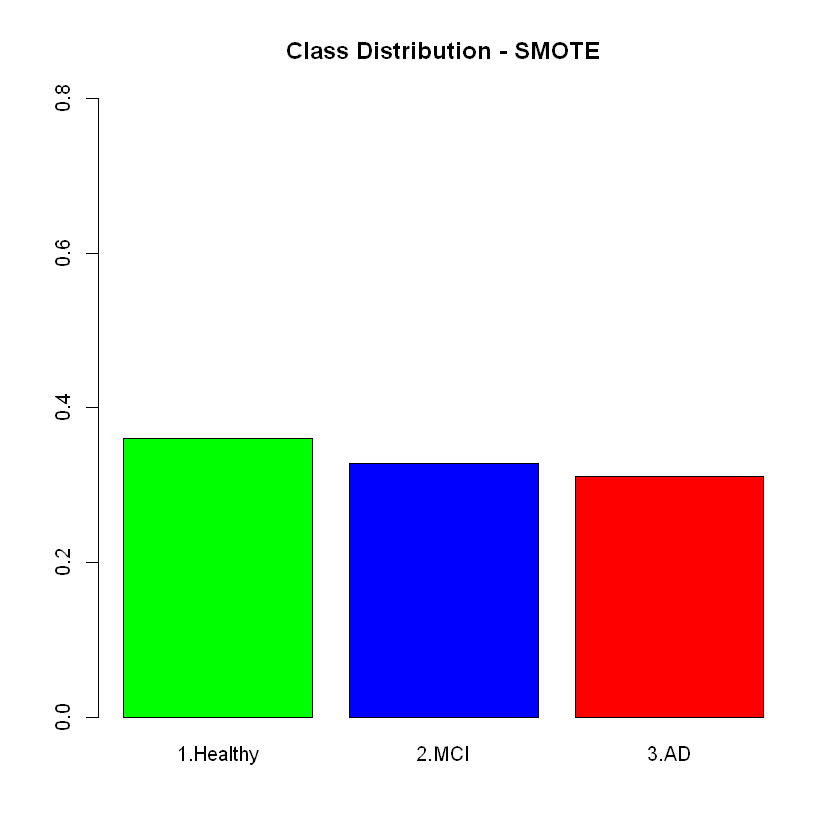

In [87]:
#SMOTE - variáveis devem ser numéricas
#install.packages("smotefamily")
require(smotefamily)
#Saudáveis e CCL
str(data_train_rfe)
data_train_rfe$Diagnosis<-as.numeric(data_train_rfe$Diagnosis)
data_train_rfe$IADL<-as.numeric(data_train_rfe$IADL)
data_train_ccl<- data_train_rfe[data_train_rfe$Diagnosis!="3",] #Apenas saudáveis e CCL
table(data_train_ccl$Diagnosis) #(66,15)
data_train_ccl$Diagnosis<- as.factor(data_train_ccl$Diagnosis)
set.seed(100)
data_train_smote<- SMOTE(data_train_ccl[,-1],data_train_ccl[,1],K=1)
smote_data_ccl<- data_train_smote$data
#View(smote_data_ccl)
table(smote_data_ccl$class) #(66,60)
#Saudáveis e DA
data_train_da<- data_train_rfe[data_train_rfe$Diagnosis!="2",] #Apenas saudáveis e DA
table(data_train_da$Diagnosis) #(66,19)
data_train_da$Diagnosis<- as.factor(data_train_da$Diagnosis)
set.seed(200)
data_train_smote2<- SMOTE(data_train_da[,-1],data_train_da[,1],K=1)
smote_data_da<- data_train_smote2$data
#View(smote_data_da)
table(smote_data_da$class) #(66,57)
#Unindo DA do smote_data_da com o smote_data_ccl
smote_data_da2<- smote_data_da[1:57,]
smote_data_final<- rbind(smote_data_ccl,smote_data_da2)
dim(smote_data_final)
#View(smote_data_final)
smote_data_final$class<- as.factor(smote_data_final$class)
table(smote_data_final$class) #(66,60,57)
classes_smote= smote_data_final$class
classes_smote<- as.numeric(classes_smote)
classes_smote[classes_smote==1]<- "1.Healthy"
classes_smote[classes_smote==2]<- "2.MCI"
classes_smote[classes_smote==3]<- "3.AD"
barplot(prop.table(table(classes_smote)),
        col=c("green","blue","red"),ylim=c(0,0.8),main="Class Distribution - SMOTE")

In [88]:
smote_data_final$IADL<- as.factor(smote_data_final$IADL)

In [89]:
require(dplyr)
smote_data_final<-rename(smote_data_final,Diagnosis=class)

Random Forest 

183 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 146, 146, 147, 146, 147 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8690691  0.8024481
  13    0.8798799  0.8196504
  24    0.8525526  0.7788507

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 13.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 13

        OOB estimate of  error rate: 10.38%
Confusion matrix:
   1  2  3 class.error
1 57  8  1  0.13636364
2  6 52  2  0.13333333
3  1  1 55  0.03508772


 1  2  3 
27  6  7 

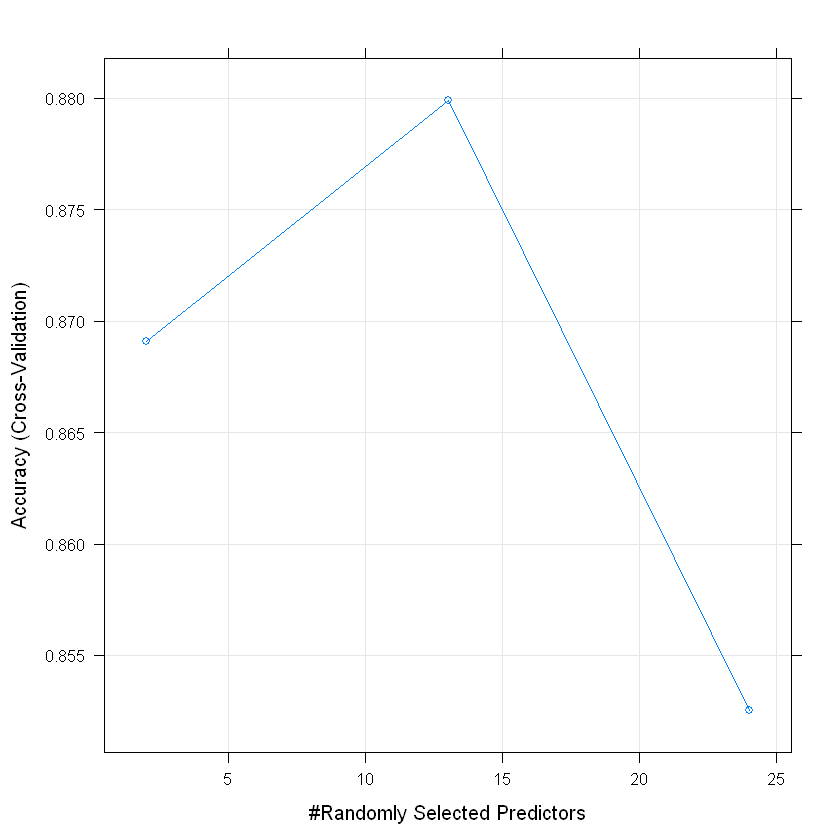

In [90]:
set.seed(444)
RF_model_smote=train(Diagnosis~.,data=smote_data_final,method='rf',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_model_smote #best parameter (mtry=13)
plot(RF_model_smote) #Não precisa especificar o kappa, visto que as classes n estão mais desbalanceadas
#RF_model_smote$pred
#mtry13<- subset(RF_model_smote$pred,RF_model_smote$pred[4]==13)
#mtry13
RF_model_smote$finalModel #Taxa de erro=10.38%
table(data_test_rfe$Diagnosis) #(27,6,7) 

Confusion Matrix and Statistics

                
prediction_smote  1  2  3
               1 23  5  1
               2  3  1  0
               3  1  0  6

Overall Statistics
                                         
               Accuracy : 0.75           
                 95% CI : (0.588, 0.8731)
    No Information Rate : 0.675          
    P-Value [Acc > NIR] : 0.2011         
                                         
                  Kappa : 0.4624         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.8519   0.1667   0.8571
Specificity            0.5385   0.9118   0.9697
Pos Pred Value         0.7931   0.2500   0.8571
Neg Pred Value         0.6364   0.8611   0.9697
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.5750   0.0250   0.1500
Detection Prevalence   0.7250   0.1000   0.1750
Balanced Accuracy      0.6952   0.5392   

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.8518519,0.5384615,0.7931034,0.6363636,0.7931034,0.8518519,0.8214286,0.675,0.575,0.725,0.6951567
Class: 2,0.1666667,0.9117647,0.2500000,0.8611111,0.2500000,0.1666667,0.2000000,0.150,0.025,0.100,0.5392157
Class: 3,0.8571429,0.9696970,0.8571429,0.9696970,0.8571429,0.8571429,0.8571429,0.175,0.150,0.175,0.9134199


rf variable importance

  only 20 most important variables shown (out of 24)

                       Overall
MMSE                 100.00000
FMT_IT                55.19639
Age                   32.97636
FMT_DT                26.85057
GSST                  25.31431
IADL2                 24.42051
TMTA                  17.19502
GSDT                  12.37460
STEP                  10.29239
IADL1.18040724517778   1.18258
IADL1.62939085043035   0.63673
IADL1.64710119413212   0.51910
IADL1.46370117808692   0.35938
IADL1.960573092103     0.24965
IADL1.98956413660198   0.23038
IADL1.57989854947664   0.09393
IADL1.82857978739776   0.05865
IADL1.53581115393899   0.05570
IADL1.35947511484846   0.05563
IADL1.51169400592335   0.01438

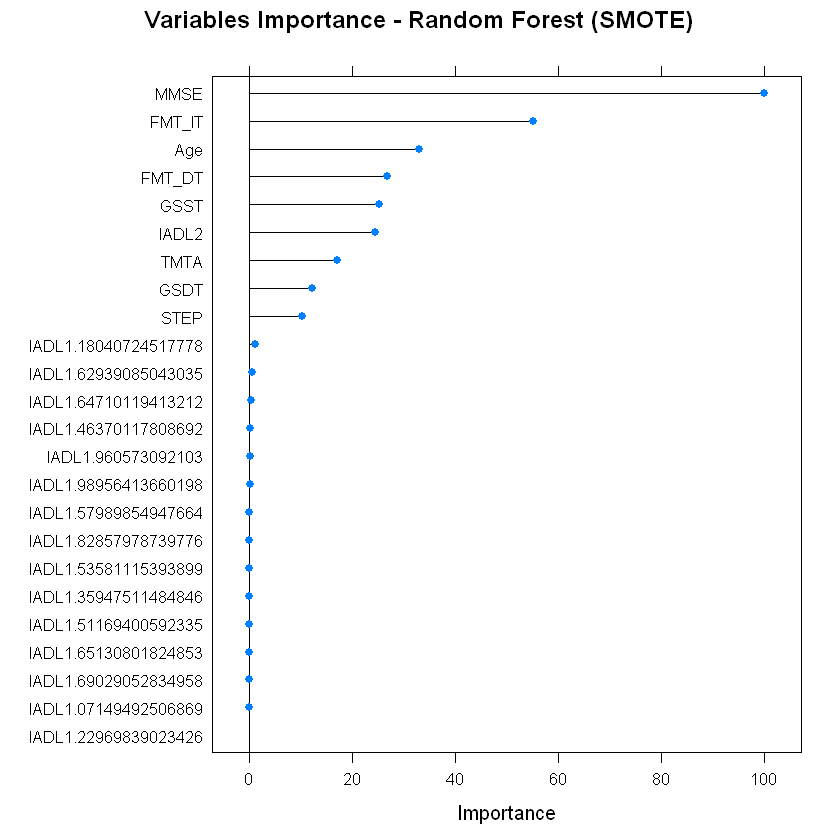

In [91]:
prediction_smote<- predict(RF_model_smote,data_test_rfe)
confusionMatrix(table(prediction_smote,data_test_rfe$Diagnosis)) #Acurácia = 75%
confusionMatrix(table(prediction_smote,data_test_rfe$Diagnosis))$byClass #Recall e F1 CCL(0.16 e 0.2)
varImp(RF_model_smote)
plot(varImp(RF_model_smote),main="Variables Importance - Random Forest (SMOTE)")
recall_RF_smote=confusionMatrix(table(prediction_smote,data_test_rfe$Diagnosis))$byClass[17]
F1_RF_smote= confusionMatrix(table(prediction_smote,data_test_rfe$Diagnosis))$byClass[20]

### Decision tree - smote

In [94]:
#install.packages("rpart")
require(rpart)
#install.packages("rpart.plot")
require(rpart.plot)
#str(data_train_rfe2)
data_train_rfe2$Diagnosis<-as.numeric(data_train_rfe2$Diagnosis)
data_train_rfe2$IADL<-as.numeric(data_train_rfe2$IADL)
data_train_rfe2$Sex<-as.numeric(data_train_rfe2$Sex)
data_train_ccl<- data_train_rfe2[data_train_rfe2$Diagnosis!="3",] #Apenas saudáveis e CCL
table(data_train_ccl$Diagnosis) #(66,15)
data_train_ccl$Diagnosis<- as.factor(data_train_ccl$Diagnosis)
set.seed(100)
data_train_smote<- SMOTE(data_train_ccl[,-1],data_train_ccl[,1],K=1)
smote_data_ccl<- data_train_smote$data
#View(smote_data_ccl)
table(smote_data_ccl$class) #(66,60)
#Sau e DA
data_train_da<- data_train_rfe2[data_train_rfe2$Diagnosis!="2",] #Apenas saudáveis e DA
table(data_train_da$Diagnosis) #(66,19)
data_train_da$Diagnosis<- as.factor(data_train_da$Diagnosis)
set.seed(200)
data_train_smote2<- SMOTE(data_train_da[,-1],data_train_da[,1],K=1)
smote_data_da<- data_train_smote2$data
#View(smote_data_da)
table(smote_data_da$class) #(66,57)
#Unindo DA do smote_data_da com o smote_data_ccl
smote_data_da2<- smote_data_da[1:57,]
smote_data_final2<- rbind(smote_data_ccl,smote_data_da2)
dim(smote_data_final2)
#View(smote_data_final)
smote_data_final2$class<- as.factor(smote_data_final2$class)
table(smote_data_final2$class) #(66,60,57)


 1  2 
66 15 


 1  2 
66 60 


 1  3 
66 19 


 1  3 
66 57 

[1] 183  10


 1  2  3 
66 60 57 

In [95]:
require(dplyr)
smote_data_final2<-rename(smote_data_final2,Diagnosis=class)

CART 

183 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 147, 145, 147, 147, 146 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.07264957  0.8147858  0.7228854
  0.26495726  0.7596807  0.6392572
  0.46153846  0.5335309  0.2773190

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.07264957.

n= 183 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 183 117 1 (0.36065574 0.32786885 0.31147541)  
  2) MMSE>=23.61978 127  61 1 (0.51968504 0.45669291 0.02362205)  
    4) FMT_IT< 24.775 41   1 1 (0.97560976 0.02439024 0.00000000) *
    5) FMT_IT>=24.775 86  29 2 (0.30232558 0.66279070 0.03488372) *
  3) MMSE< 23.61978 56   2 3 (0.00000000 0.03571429 0.96428571) *

Confusion Matrix and Statistics

                 
prediction_smote2  1  2  3
                1 16  4  0
                2 11  2  1
                3  0  0  6

Overall Statistics
                                          
               Accuracy : 0.6             
                 95% CI : (0.4333, 0.7514)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.8801          
                                          
                  Kappa : 0.3148          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.5926   0.3333   0.8571
Specificity            0.6923   0.6471   1.0000
Pos Pred Value         0.8000   0.1429   1.0000
Neg Pred Value         0.4500   0.8462   0.9706
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.4000   0.0500   0.1500
Detection Prevalence   0.5000   0.3500   0.1500
Balanced Accuracy      0.64

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.5925926,0.6923077,0.8000000,0.4500000,0.8000000,0.5925926,0.6808511,0.675,0.40,0.50,0.6424501
Class: 2,0.3333333,0.6470588,0.1428571,0.8461538,0.1428571,0.3333333,0.2000000,0.150,0.05,0.35,0.4901961
Class: 3,0.8571429,1.0000000,1.0000000,0.9705882,1.0000000,0.8571429,0.9230769,0.175,0.15,0.15,0.9285714


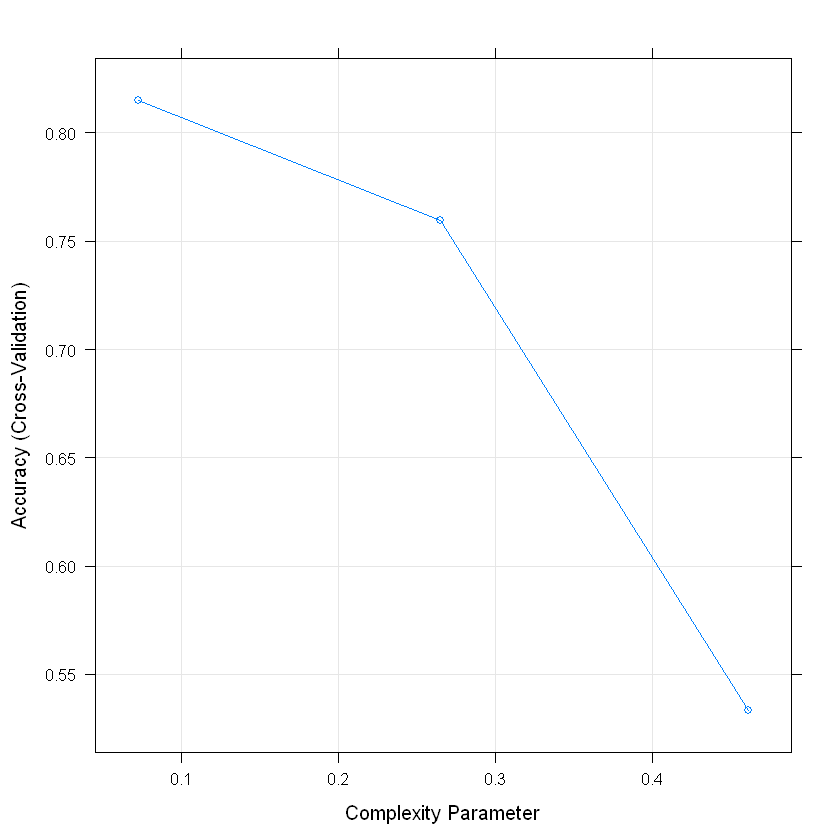

rpart variable importance

       Overall
IADL    100.00
MMSE     98.91
GSST     65.83
FMT_DT   47.28
FMT_IT   45.73
TMTA     45.19
Sex      41.18
Age      29.23
GSDT      0.00

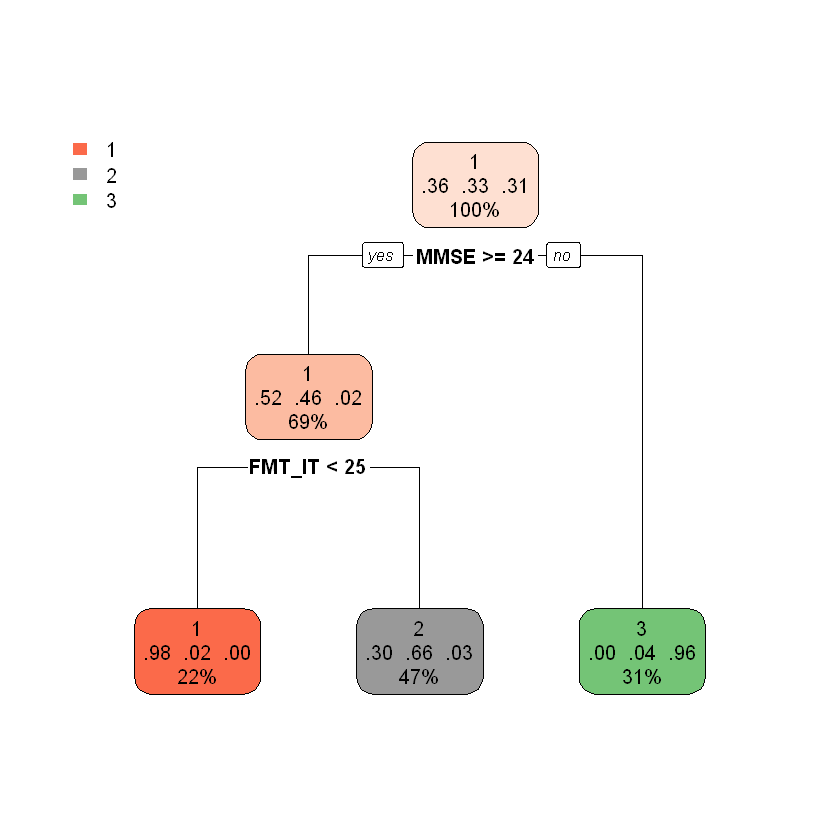

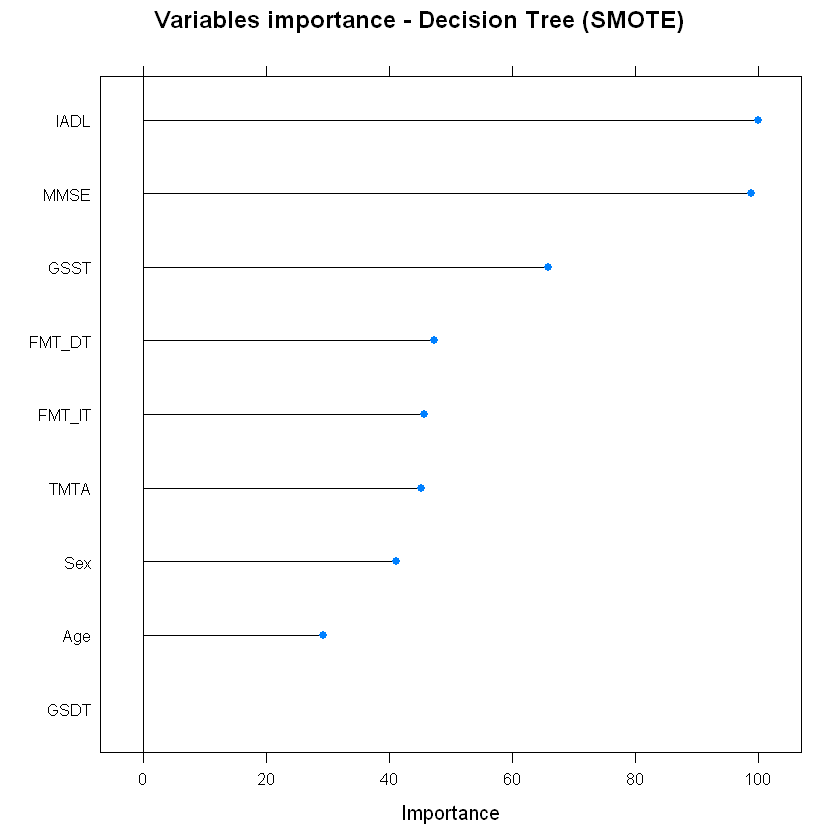

In [96]:
Tree_model_smote<- train(Diagnosis~.,data=smote_data_final2,method='rpart',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_model_smote #best parameter (cp=0.07264957)
plot(Tree_model_smote)
#Tree_model_smote$pred
Tree_model_smote$finalModel
data_test_rfe2$IADL<- as.numeric(data_test_rfe2$IADL)
data_test_rfe2$Sex<- as.numeric(data_test_rfe2$Sex)
prediction_smote2<- predict(Tree_model_smote,data_test_rfe2)
confusionMatrix(table(prediction_smote2,data_test_rfe2$Diagnosis)) #Acurácia = 60%
confusionMatrix(table(prediction_smote2,data_test_rfe2$Diagnosis))$byClass #Recall e F1 CCL (0.33 e 0.2)
rpart.plot(Tree_model_smote$finalModel)
varImp(Tree_model_smote)
plot(varImp(Tree_model_smote), main="Variables importance - Decision Tree (SMOTE)")
recall_tree_smote=confusionMatrix(table(prediction_smote2,data_test_rfe2$Diagnosis))$byClass[17]
F1_tree_smote= confusionMatrix(table(prediction_smote2,data_test_rfe2$Diagnosis))$byClass[20]

## ROSE 

### Random Forest - rose


 1  2 
66 15 


 1  2 
66 66 


 1  3 
66 19 


 1  3 
66 66 

[1] 198  10


 1  2  3 
66 66 66 

 Diagnosis      MMSE            IADL           GSDT            FMT_DT      
 1:66      Min.   :11.00   Min.   :1.00   Min.   :0.3027   Min.   :  9.46  
 2:66      1st Qu.:23.00   1st Qu.:1.00   1st Qu.:0.4935   1st Qu.: 14.80  
 3:66      Median :26.00   Median :2.00   Median :0.5831   Median : 37.48  
           Mean   :25.08   Mean   :1.54   Mean   :0.6632   Mean   : 67.76  
           3rd Qu.:29.00   3rd Qu.:2.00   3rd Qu.:0.8287   3rd Qu.: 65.35  
           Max.   :30.00   Max.   :2.00   Max.   :1.2270   Max.   :301.00  
     FMT_IT            GSST             TMTA             STEP       
 Min.   :  9.65   Min.   :0.4306   Min.   : 24.62   Min.   : 19.00  
 1st Qu.: 23.48   1st Qu.:0.6314   1st Qu.: 50.01   1st Qu.: 55.00  
 Median : 46.18   Median :0.8242   Median : 70.50   Median : 65.00  
 Mean   : 74.70   Mean   :0.8172   Mean   : 83.43   Mean   : 66.22  
 3rd Qu.: 70.62   3rd Qu.:1.0101   3rd Qu.: 99.03   3rd Qu.: 82.00  
 Max.   :301.00   Max.   :1.2685   Max.   :181.00   Ma

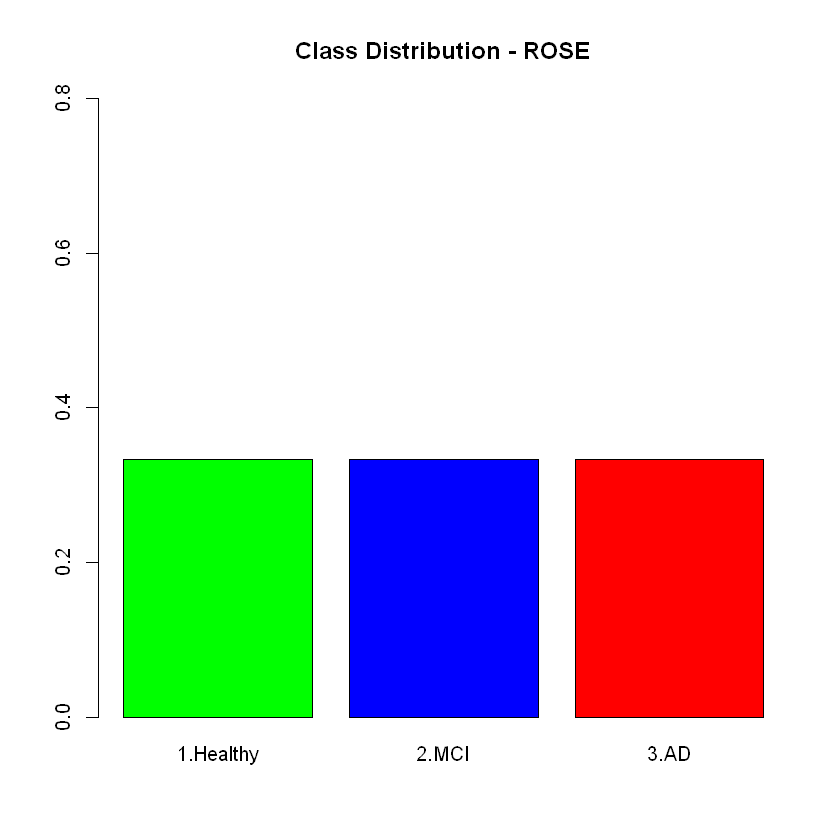

In [99]:
#Só é possível com 2 classes - as obs. são repetidas aleatóriamente
#https://www.youtube.com/watch?v=Ho2Klvzjegg
#install.packages("ROSE")
require(ROSE)
#sau e ccl
data_train_rfe$Diagnosis<-as.numeric(data_train_rfe$Diagnosis)
train_data_ccl<- data_train_rfe[data_train_rfe$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_data_ccl$Diagnosis) #(66,15)
train_data_ccl$Diagnosis<- as.factor(train_data_ccl$Diagnosis)
set.seed(111)
rose_data<- ovun.sample(Diagnosis~.,data=train_data_ccl,method = "over",N=132)$data
table(rose_data$Diagnosis) #(66,66)
#Sau e DA
data_train_rfe$Diagnosis<-as.numeric(data_train_rfe$Diagnosis)
train_data_da<- data_train_rfe[data_train_rfe$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_data_da$Diagnosis) #(66,19)
train_data_da$Diagnosis<- as.factor(train_data_da$Diagnosis)
set.seed(222)
rose_data2<- ovun.sample(Diagnosis~.,data=train_data_da,method = "over",N=132)$data
table(rose_data2$Diagnosis) #(66,66)
#Unindo DA do rose_data2 com o rose_data
rose_data_da<- rose_data2[rose_data2$Diagnosis!="1",]
rose_data_final<- rbind(rose_data,rose_data_da)
dim(rose_data_final)
table(rose_data_final$Diagnosis) #(66,66,66)
summary(rose_data_final) #Valores podem cair fora do intervalo das variáveis
classes_rose= rose_data_final$Diagnosis
classes_rose<- as.numeric(classes_rose)
classes_rose[classes_rose==1]<- "1.Healthy"
classes_rose[classes_rose==2]<- "2.MCI"
classes_rose[classes_rose==3]<- "3.AD"
barplot(prop.table(table(classes_rose)),
        col=c("green","blue","red"),ylim=c(0,0.8),main="Class Distribution - ROSE")

In [100]:
rose_data_final$IADL<- as.factor(rose_data_final$IADL)

Random Forest 

198 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 158, 159, 158, 158, 159 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9747436  0.9621083
  5     0.9597436  0.9396995
  9     0.9647436  0.9471551

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 2.53%
Confusion matrix:
   1  2  3 class.error
1 63  1  2  0.04545455
2  1 65  0  0.01515152
3  0  1 65  0.01515152


 1  2  3 
27  6  7 

               
prediction_rose  1  2  3
              1 26  6  0
              2  0  0  0
              3  1  0  7

Confusion Matrix and Statistics

               
prediction_rose  1  2  3
              1 26  6  0
              2  0  0  0
              3  1  0  7

Overall Statistics
                                          
               Accuracy : 0.825           
                 95% CI : (0.6722, 0.9266)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.02719         
                                          
                  Kappa : 0.5882          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9630     0.00   1.0000
Specificity            0.5385     1.00   0.9697
Pos Pred Value         0.8125      NaN   0.8750
Neg Pred Value         0.8750     0.85   1.0000
Prevalence             0.6750     0.15   0.1750
Detection Rate         0.6500     0.00   0.1750
Detection Prevalence   0.8000     0.00   0.2000
Balanced Accuracy      0.7507     0.5

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.962963,0.5384615,0.8125,0.875,0.8125,0.962963,0.8813559,0.675,0.650,0.8,0.7507123
Class: 2,0.000000,1.0000000,NaN,0.850,NA,0.000000,NA,0.150,0.000,0.0,0.5000000
Class: 3,1.000000,0.9696970,0.8750,1.000,0.8750,1.000000,0.9333333,0.175,0.175,0.2,0.9848485


rf variable importance

       Overall
MMSE   100.000
GSDT    79.665
GSST    78.337
FMT_IT  46.955
IADL2   32.900
FMT_DT  23.867
Age     14.608
TMTA     8.777
STEP     0.000

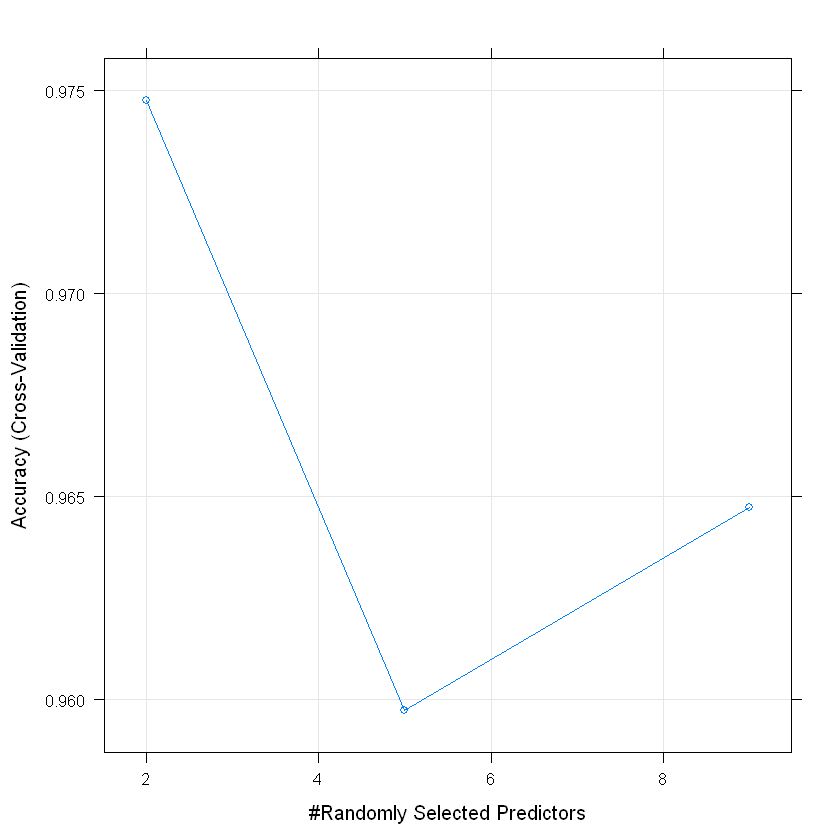

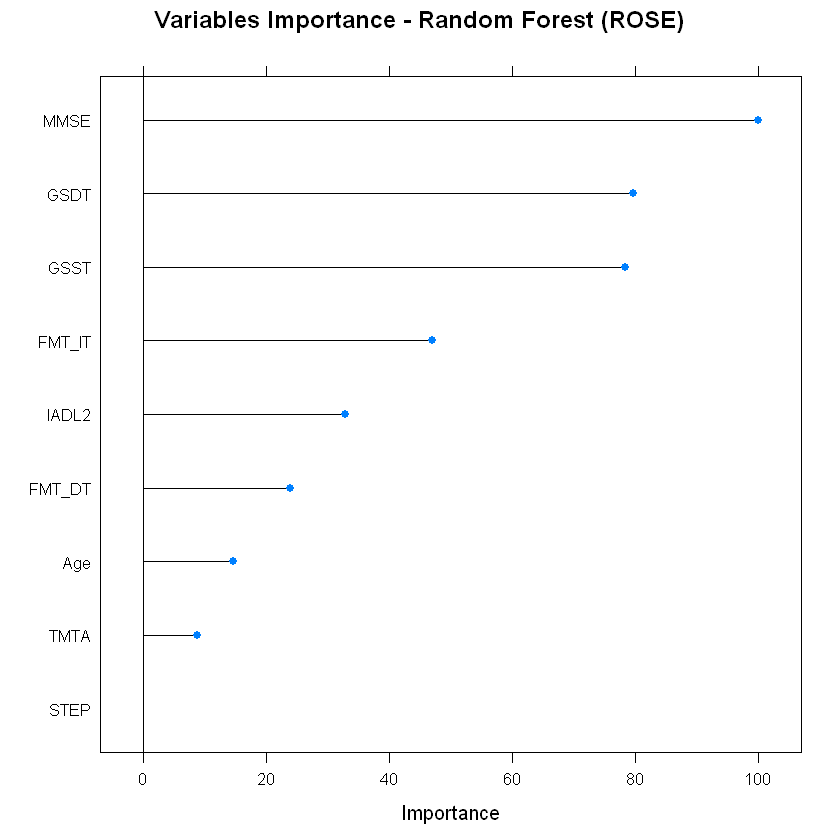

In [101]:
set.seed(555)
RF_model_rose=train(Diagnosis~.,data=rose_data_final,method='rf',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_model_rose #best parameter (mtry=2)
plot(RF_model_rose)
#RF_model_rose$pred
#mtry2<- subset(RF_model_rose$pred,RF_model_rose$pred[4]==2)
#mtry2
RF_model_rose$finalModel  #Taxa de erro=2.53%
table(data_test_rfe2$Diagnosis)  #(27,6,7)
prediction_rose<- predict(RF_model_rose,data_test_rfe)
table(prediction_rose,data_test_rfe$Diagnosis)
confusionMatrix(table(prediction_rose,data_test_rfe$Diagnosis)) #Acurácia = 82.5%
confusionMatrix(table(prediction_rose,data_test_rfe$Diagnosis))$byClass #Recall e F1 ccl (0 e Nan)
varImp(RF_model_rose)
plot(varImp(RF_model_rose),main="Variables Importance - Random Forest (ROSE)")
recall_RF_rose=confusionMatrix(table(prediction_rose,data_test_rfe$Diagnosis))$byClass[17]
F1_RF_rose= confusionMatrix(table(prediction_rose,data_test_rfe$Diagnosis))$byClass[20]

### Decision Tree - rose

In [102]:
data_train_rfe2$Diagnosis<-as.numeric(data_train_rfe2$Diagnosis)
train_data_ccl<- data_train_rfe2[data_train_rfe2$Diagnosis!="3",] #Apenas saudáveis e CCL
table(train_data_ccl$Diagnosis) #(66,15)
train_data_ccl$Diagnosis<- as.factor(train_data_ccl$Diagnosis)
set.seed(111)
rose_data<- ovun.sample(Diagnosis~.,data=train_data_ccl,method = "over",N=132)$data
table(rose_data$Diagnosis) #(66,66)
#Sau e DA
data_train_rfe2$Diagnosis<-as.numeric(data_train_rfe2$Diagnosis)
train_data_da<- data_train_rfe2[data_train_rfe2$Diagnosis!="2",] #Apenas saudáveis e DA
table(train_data_da$Diagnosis) #(66,19)
train_data_da$Diagnosis<- as.factor(train_data_da$Diagnosis)
set.seed(222)
rose_data2<- ovun.sample(Diagnosis~.,data=train_data_da,method = "over",N=132)$data
table(rose_data2$Diagnosis) #(66,66)
#Unindo DA do rose_data2 com o rose_data
rose_data_da<- rose_data2[rose_data2$Diagnosis!="1",]
rose_data_final<- rbind(rose_data,rose_data_da)
dim(rose_data_final)
table(rose_data_final$Diagnosis) #(66,66,66)
#summary(rose_data_final) #Valores podem cair fora do intervalo das variáveis


 1  2 
66 15 


 1  2 
66 66 


 1  3 
66 19 


 1  3 
66 66 

[1] 198  10


 1  2  3 
66 66 66 

CART 

198 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 159, 158, 158, 159, 158 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.06060606  0.6869231  0.5303752
  0.18939394  0.6719231  0.5093262
  0.43939394  0.4397436  0.1660969

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.06060606.

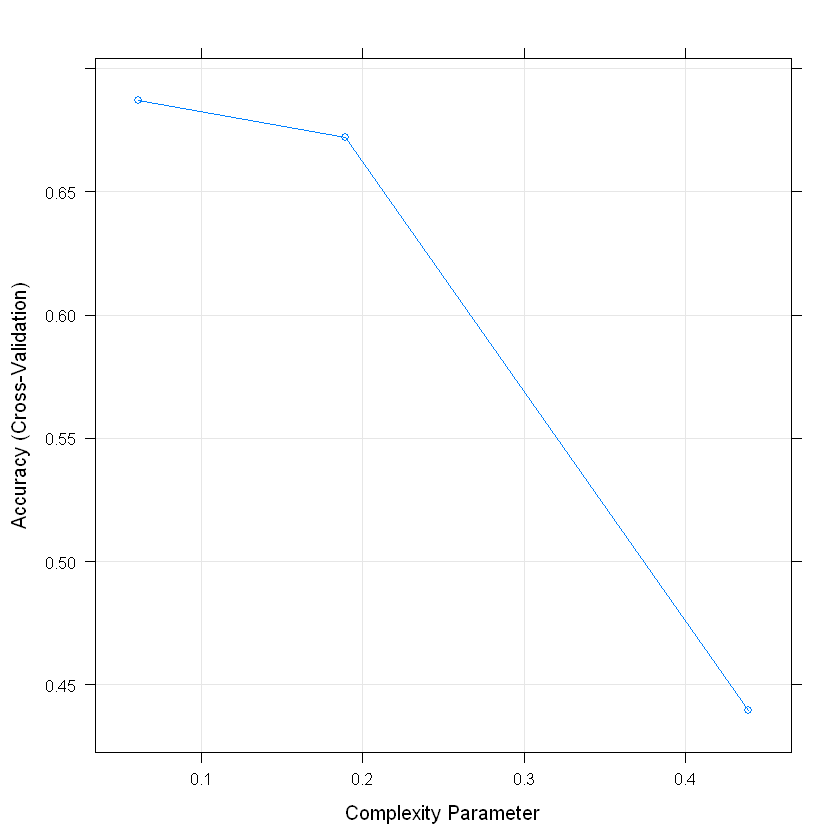

In [103]:
set.seed(456)
tree_model_rose2<- train(Diagnosis~.,data=rose_data_final,method='rpart',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
tree_model_rose2 #best parameter (cp=0.06060606)
plot(tree_model_rose2)
#tree_model_rose2$pred
#tree_model_rose2$finalModel

Confusion Matrix and Statistics

                
prediction_rose2  1  2  3
               1 17  3  0
               2 10  3  1
               3  0  0  6

Overall Statistics
                                          
               Accuracy : 0.65            
                 95% CI : (0.4832, 0.7937)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.6986          
                                          
                  Kappa : 0.4004          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.6296   0.5000   0.8571
Specificity            0.7692   0.6765   1.0000
Pos Pred Value         0.8500   0.2143   1.0000
Neg Pred Value         0.5000   0.8846   0.9706
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.4250   0.0750   0.1500
Detection Prevalence   0.5000   0.3500   0.1500
Balanced Accuracy      0.6994   

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.6296296,0.7692308,0.8500000,0.5000000,0.8500000,0.6296296,0.7234043,0.675,0.425,0.50,0.6994302
Class: 2,0.5000000,0.6764706,0.2142857,0.8846154,0.2142857,0.5000000,0.3000000,0.150,0.075,0.35,0.5882353
Class: 3,0.8571429,1.0000000,1.0000000,0.9705882,1.0000000,0.8571429,0.9230769,0.175,0.150,0.15,0.9285714


rpart variable importance

       Overall
IADL    100.00
GSST     98.31
MMSE     97.93
GSDT     73.61
TMTA     58.73
Age      35.47
FMT_IT   35.33
Sex      14.88
FMT_DT    0.00

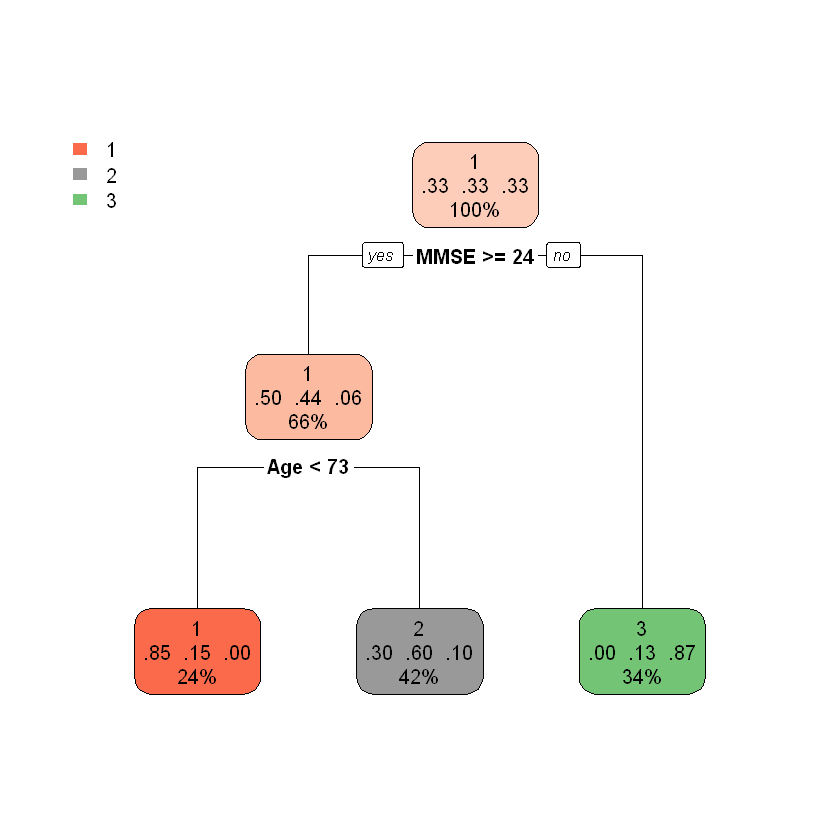

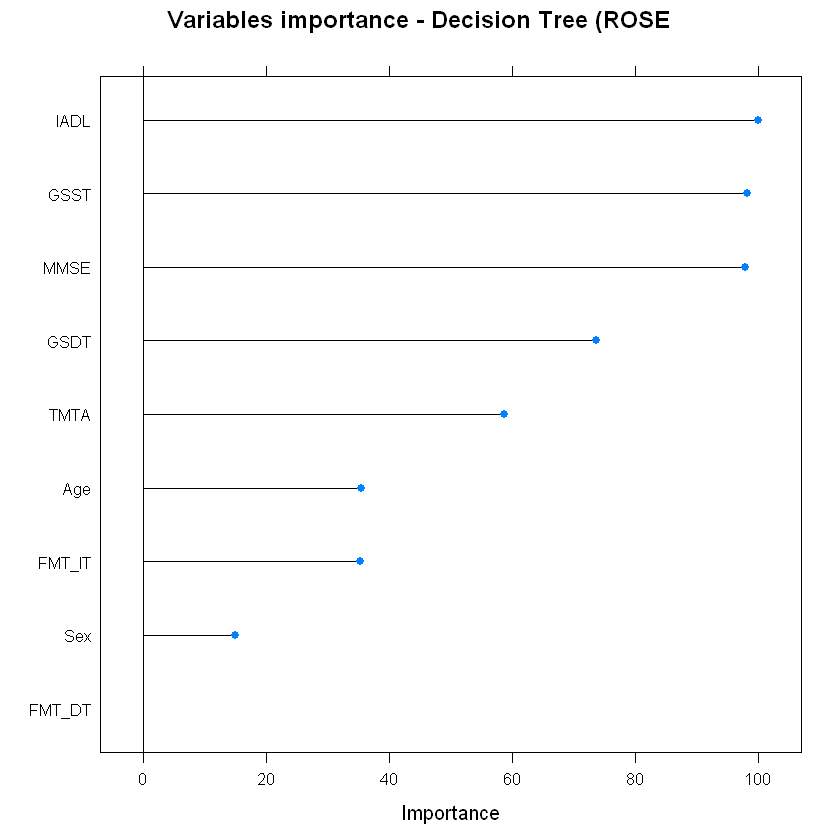

In [104]:
prediction_rose2<- predict(tree_model_rose2,data_test_rfe2)
confusionMatrix(table(prediction_rose2,data_test_rfe2$Diagnosis)) #Acurácia = 65%
confusionMatrix(table(prediction_rose2,data_test_rfe2$Diagnosis))$byClass #Recall e F1 ccl (0.5 e 0.3)
rpart.plot(tree_model_rose2$finalModel)
varImp(tree_model_rose2)
plot(varImp(tree_model_rose2),main="Variables importance - Decision Tree (ROSE")
recall_tree_rose=confusionMatrix(table(prediction_rose2,data_test_rfe2$Diagnosis))$byClass[17]
F1_tree_rose= confusionMatrix(table(prediction_rose2,data_test_rfe2$Diagnosis))$byClass[20]

## AUGMENTER

### Random Forest - augmenter


 1  2  3 
66 15 19 


 2 
58 


 3 
58 


 1  2  3 
66 58 58 

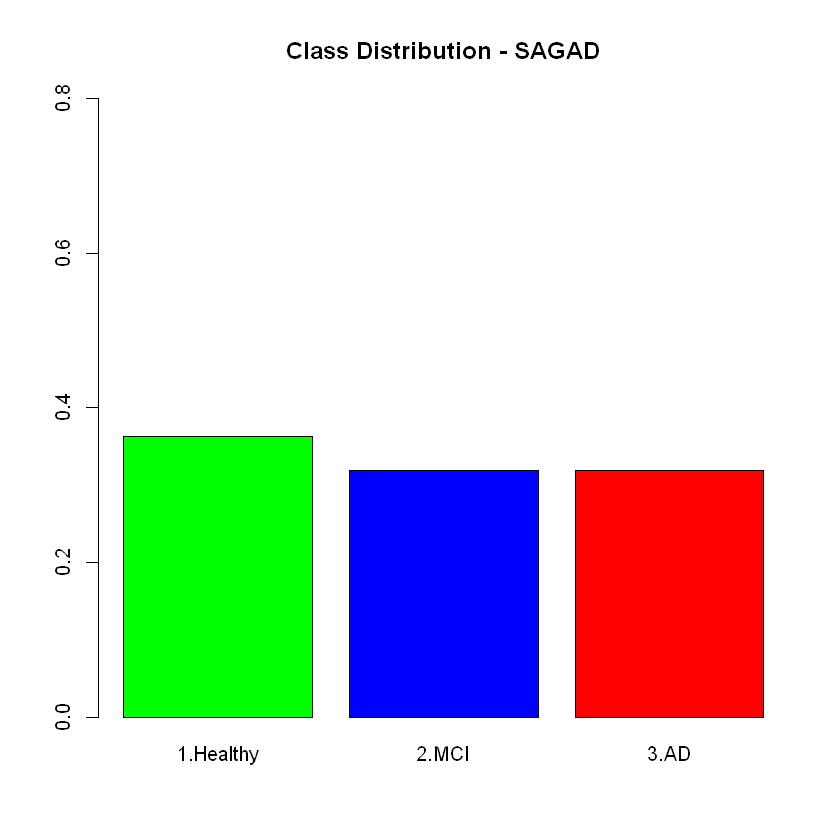

In [113]:
#É possível implementar p/ mais de 2 classes sem ter que dividir o banco de dados
#install.packages("AugmenterR")
require(AugmenterR)
table(data_train_rfe$Diagnosis) #(66,15,19)
#str(data_train_rfe)
data_train_rfe<- as.data.frame(data_train_rfe)
data_train_rfe$Diagnosis<- as.factor(data_train_rfe$Diagnosis)
set.seed(333)
augmenter_data_ccl<- GenerateMultipleCandidates(data_train_rfe,Class='2',col=1,Prob=0.9,amount=70)
table(augmenter_data_ccl$Diagnosis) #58
set.seed(444)
augmenter_data_da<- GenerateMultipleCandidates(data_train_rfe,Class='3',col=1,Prob=0.9,amount=150)
table(augmenter_data_da$Diagnosis) #58
#Unindo os ccl e da (pós augmenterR) com os saudáveis (dados reais)
data_train_rfe$Diagnosis<- as.numeric(data_train_rfe$Diagnosis)
data_train_healthy<- data_train_rfe[data_train_rfe$Diagnosis=="1",]
augmenter_ccl_da<- rbind(augmenter_data_ccl,augmenter_data_da)
augmenter_data_final<- rbind(data_train_healthy,augmenter_ccl_da)
#View(augmenter_data_final)
augmenter_data_final$Diagnosis<- as.factor(augmenter_data_final$Diagnosis)
table(augmenter_data_final$Diagnosis) #(66,58,58)
classes_augmenter= augmenter_data_final$Diagnosis
classes_augmenter<- as.numeric(classes_augmenter)
classes_augmenter[classes_augmenter==1]<- "1.Healthy"
classes_augmenter[classes_augmenter==2]<- "2.MCI"
classes_augmenter[classes_augmenter==3]<- "3.AD"
barplot(prop.table(table(classes_augmenter)),
        col=c("green","blue","red"),ylim=c(0,0.8),main="Class Distribution - SAGAD")

Random Forest 

182 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 145, 147, 145, 146, 145 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.9945946  0.9918771
  5     0.9779193  0.9667776
  9     0.9725139  0.9586368

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


Call:
 randomForest(x = x, y = y, mtry = min(param$mtry, ncol(x))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 1.1%
Confusion matrix:
   1  2  3 class.error
1 65  0  1  0.01515152
2  1 57  0  0.01724138
3  0  0 58  0.00000000


 1  2  3 
27  6  7 

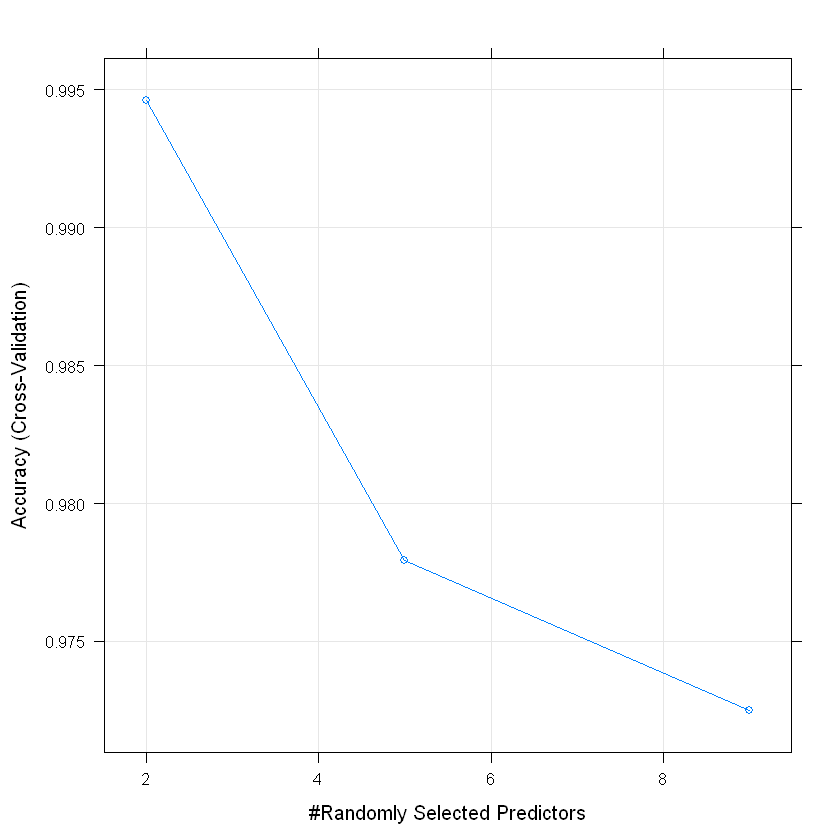

In [114]:
set.seed(777)
RF_Model_augmenter=train(Diagnosis~.,data=augmenter_data_final,method='rf',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
RF_Model_augmenter #best parameter (mtry=2)
plot(RF_Model_augmenter)
#RF_Model_augmenter$pred
#mtry2<- subset(RF_Model_augmenter$pred,RF_Model_augmenter$pred[4]==2)
#mtry2
RF_Model_augmenter$finalModel #Taxa de erro = 1.1%
table(data_test_rfe$Diagnosis) #(27,6,7) 

In [115]:
data_test_rfe_augmenter= data_test_rfe
data_test_rfe_augmenter$IADL<- as.numeric(data_test_rfe_augmenter$IADL)

                    
prediction_augmenter  1  2  3
                   1 26  6  1
                   2  1  0  0
                   3  0  0  6

Confusion Matrix and Statistics

                    
prediction_augmenter  1  2  3
                   1 26  6  1
                   2  1  0  0
                   3  0  0  6

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.6435, 0.9095)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.0602          
                                          
                  Kappa : 0.5159          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9630   0.0000   0.8571
Specificity            0.4615   0.9706   1.0000
Pos Pred Value         0.7879   0.0000   1.0000
Neg Pred Value         0.8571   0.8462   0.9706
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.6500   0.0000   0.1500
Detection Prevalence   0.8250   0.0250   0.1500
Balanced Acc

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.9629630,0.4615385,0.7878788,0.8571429,0.7878788,0.9629630,0.8666667,0.675,0.65,0.825,0.7122507
Class: 2,0.0000000,0.9705882,0.0000000,0.8461538,0.0000000,0.0000000,NaN,0.150,0.00,0.025,0.4852941
Class: 3,0.8571429,1.0000000,1.0000000,0.9705882,1.0000000,0.8571429,0.9230769,0.175,0.15,0.150,0.9285714


rf variable importance

       Overall
IADL    100.00
GSDT     89.68
MMSE     84.58
GSST     66.31
FMT_DT   64.66
FMT_IT   56.96
TMTA     30.94
STEP     10.32
Age       0.00

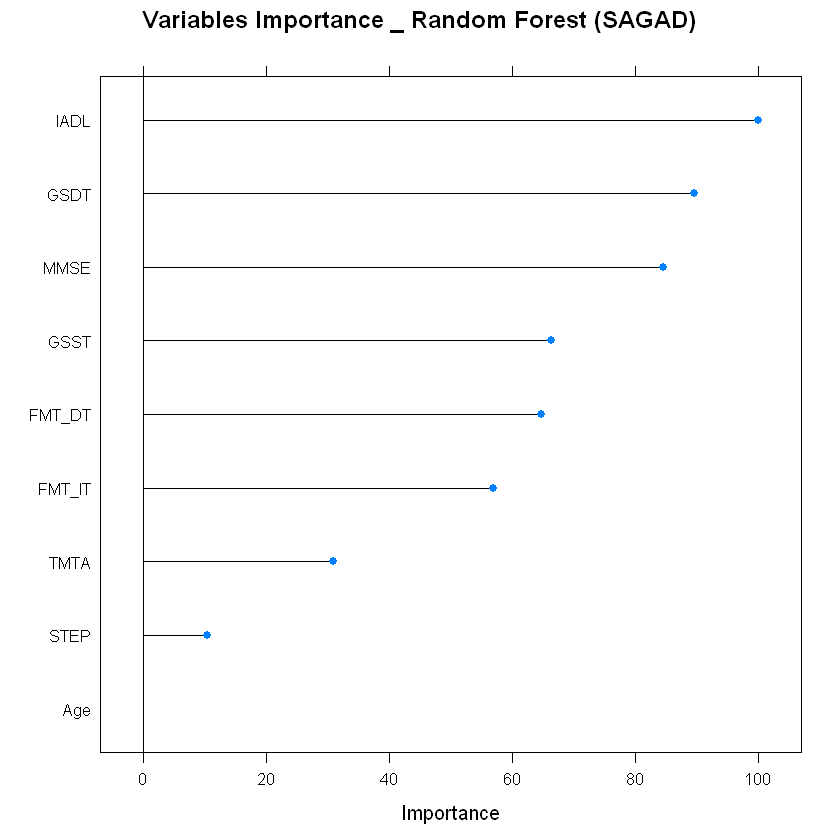

In [116]:
prediction_augmenter<- predict(RF_Model_augmenter,data_test_rfe_augmenter)
table(prediction_augmenter,data_test_rfe_augmenter$Diagnosis)
confusionMatrix(table(prediction_augmenter,data_test_rfe_augmenter$Diagnosis)) #Acurácia = 80%
confusionMatrix(table(prediction_augmenter,data_test_rfe_augmenter$Diagnosis))$byClass #Recall e F1 ccl (0 e Nan)
varImp(RF_Model_augmenter)
plot(varImp(RF_Model_augmenter),main="Variables Importance _ Random Forest (SAGAD)")
recall_RF_augmenter=confusionMatrix(table(prediction_augmenter,data_test_rfe_augmenter$Diagnosis))$byClass[17]
F1_RF_augmenter= confusionMatrix(table(prediction_augmenter,data_test_rfe_augmenter$Diagnosis))$byClass[20]

### Decision Tree - augmenter

In [119]:
table(data_train_rfe2$Diagnosis) #(66,15,19)
#str(data_train_rfe2)
data_train_rfe2<- as.data.frame(data_train_rfe2)
data_train_rfe2$Diagnosis<- as.factor(data_train_rfe2$Diagnosis)
set.seed(333)
augmenter_data_ccl<- GenerateMultipleCandidates(data_train_rfe2,Class='2',col=1,Prob=0.9,amount=70)
table(augmenter_data_ccl$Diagnosis) #58
set.seed(444)
augmenter_data_da<- GenerateMultipleCandidates(data_train_rfe2,Class='3',col=1,Prob=0.9,amount=150)
table(augmenter_data_da$Diagnosis) #58
#Unindo os ccl e da (pós augmenterR) com os saudáveis (dados reais)
data_train_rfe2$Diagnosis<- as.numeric(data_train_rfe2$Diagnosis)
data_train_healthy<- data_train_rfe2[data_train_rfe2$Diagnosis=="1",]
augmenter_ccl_da<- rbind(augmenter_data_ccl,augmenter_data_da)
augmenter_data_final<- rbind(data_train_healthy,augmenter_ccl_da)
dim(augmenter_data_final)
#View(augmenter_data_final)
augmenter_data_final$Diagnosis<- as.factor(augmenter_data_final$Diagnosis)
table(augmenter_data_final$Diagnosis) #(66,58,58)


 1  2  3 
66 15 19 


 2 
58 


 3 
58 

[1] 182  10


 1  2  3 
66 58 58 

CART 

182 samples
  9 predictor
  3 classes: '1', '2', '3' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 145, 146, 146, 145, 146 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01724138  0.9012012  0.8511625
  0.40517241  0.8292793  0.7394535
  0.47413793  0.4722222  0.1740808

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01724138.

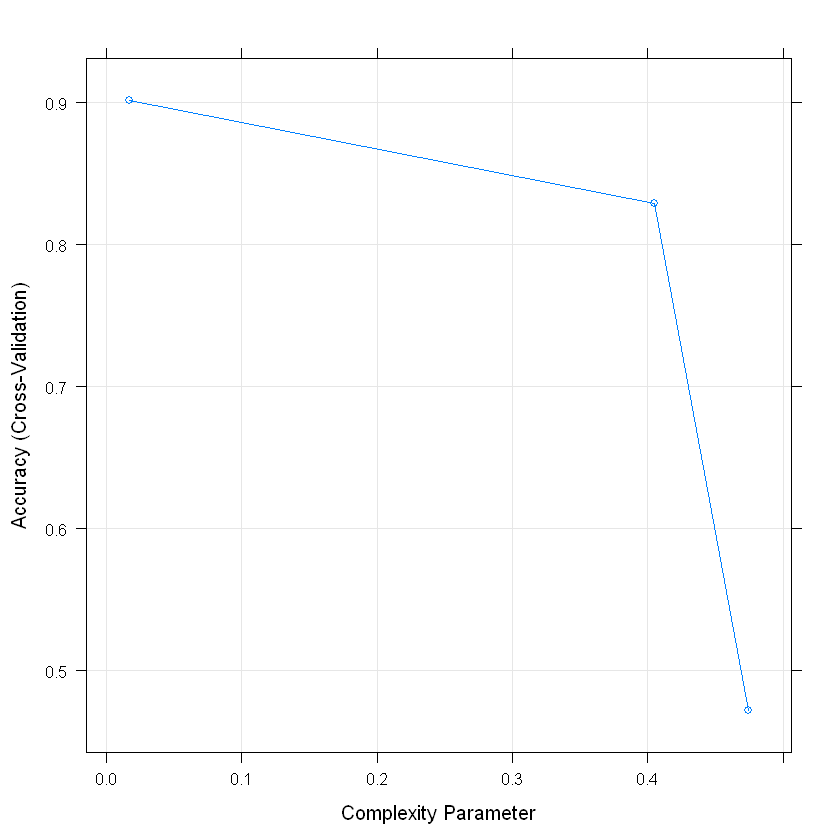

In [120]:
set.seed(789)
Tree_Model_augmenter2<- train(Diagnosis~.,data=augmenter_data_final,method='rpart',trControl=trainControl(method='cv',number=5,savePredictions=TRUE))
Tree_Model_augmenter2 #best parameter (cp=0.01724138)
plot(Tree_Model_augmenter2)
#RF_Model_augmenter2$pred
#Tree_Model_augmenter2$finalModel

In [121]:
data_test_rfe2_augmenter= data_test_rfe2
data_test_rfe2_augmenter$IADL<- as.numeric(data_test_rfe2_augmenter$IADL)

Confusion Matrix and Statistics

                     
prediction_augmenter2  1  2  3
                    1 26  6  1
                    2  1  0  0
                    3  0  0  6

Overall Statistics
                                          
               Accuracy : 0.8             
                 95% CI : (0.6435, 0.9095)
    No Information Rate : 0.675           
    P-Value [Acc > NIR] : 0.0602          
                                          
                  Kappa : 0.5159          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.9630   0.0000   0.8571
Specificity            0.4615   0.9706   1.0000
Pos Pred Value         0.7879   0.0000   1.0000
Neg Pred Value         0.8571   0.8462   0.9706
Prevalence             0.6750   0.1500   0.1750
Detection Rate         0.6500   0.0000   0.1500
Detection Prevalence   0.8250   0.0250   0.1500
Balance

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: 1,0.9629630,0.4615385,0.7878788,0.8571429,0.7878788,0.9629630,0.8666667,0.675,0.65,0.825,0.7122507
Class: 2,0.0000000,0.9705882,0.0000000,0.8461538,0.0000000,0.0000000,NaN,0.150,0.00,0.025,0.4852941
Class: 3,0.8571429,1.0000000,1.0000000,0.9705882,1.0000000,0.8571429,0.9230769,0.175,0.15,0.150,0.9285714


rpart variable importance

       Overall
GSDT    100.00
IADL     96.15
MMSE     63.31
FMT_DT   55.17
TMTA     50.58
GSST     49.67
FMT_IT   43.27
Age      35.32
Sex       0.00

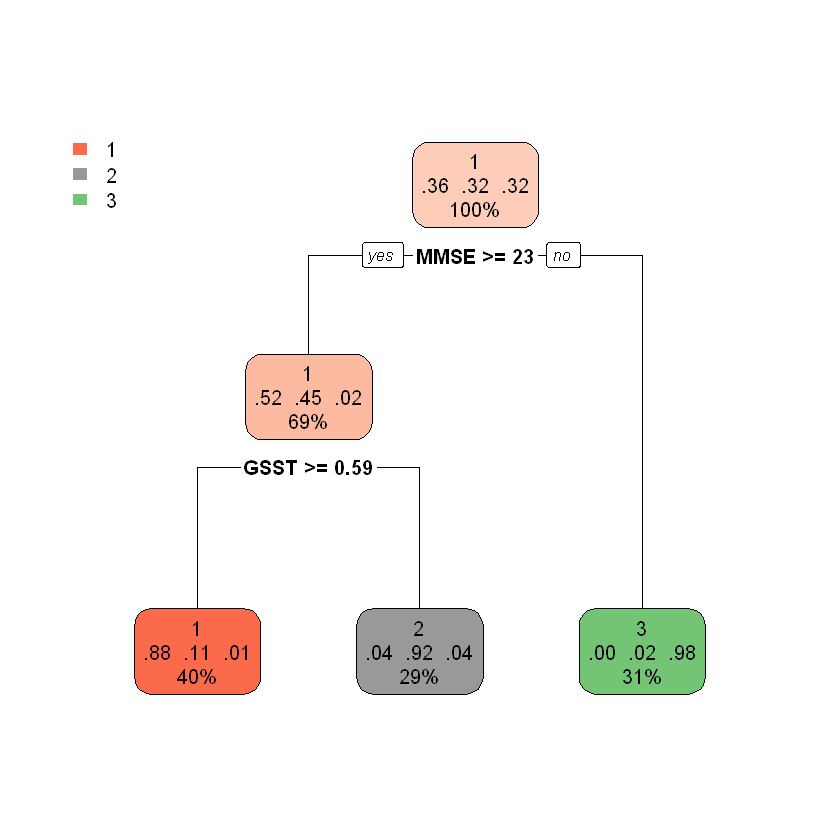

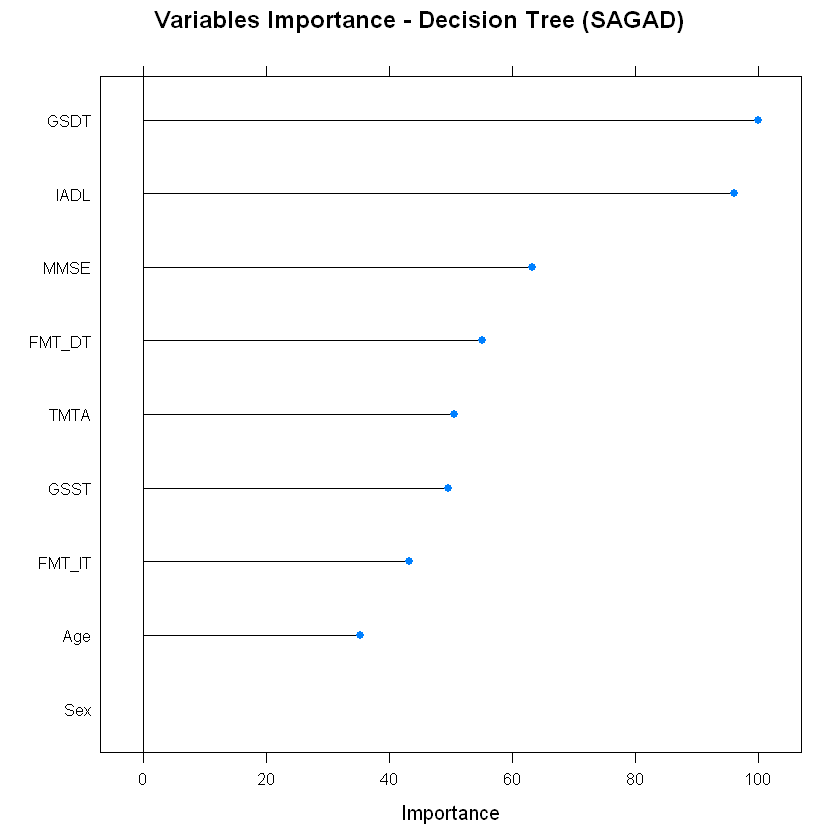

In [122]:
prediction_augmenter2<- predict(Tree_Model_augmenter2,data_test_rfe2)
confusionMatrix(table(prediction_augmenter2,data_test_rfe2$Diagnosis)) #Acurácia = 80%
confusionMatrix(table(prediction_augmenter2,data_test_rfe2$Diagnosis))$byClass #Recall e F1 ccl (0 e Nan)
rpart.plot(Tree_Model_augmenter2$finalModel)
varImp(Tree_Model_augmenter2)
plot(varImp(Tree_Model_augmenter2), main="Variables Importance - Decision Tree (SAGAD)")
recall_tree_augmenter=confusionMatrix(table(prediction_augmenter2,data_test_rfe2$Diagnosis))$byClass[17]
F1_tree_augmenter= confusionMatrix(table(prediction_augmenter2,data_test_rfe2$Diagnosis))$byClass[20]


# Boxplot comparando resultado dos modelos de RF e árvore (5-folds)

In [170]:
#install.packages("ggplot2")
#install.packages("plyr")
require(ggplot2)
require(plyr)

#Data-frame com os modelos de RF (eixo x) e suas respectivas métricas (eixo y)
Dataset= c("Original data","Original data","Original data","Original data",
           "Original data","Original data","Original data","Original data",
           "Original data","Original data","SMOTE","SMOTE","SMOTE","SMOTE",
           "SMOTE","SMOTE","SMOTE","SMOTE","SMOTE","SMOTE","ROSE","ROSE","ROSE",
           "ROSE","ROSE","ROSE","ROSE","ROSE","ROSE","ROSE","SAGAD","SAGAD",
           "SAGAD","SAGAD","SAGAD","SAGAD","SAGAD","SAGAD","SAGAD","SAGAD") 
           
Model= c("Random Forest","Random Forest","Random Forest","Random Forest",
         "Random Forest","Decision Tree","Decision Tree","Decision Tree",
         "Decision Tree","Decision Tree",
         "Random Forest","Random Forest","Random Forest","Random Forest",
         "Random Forest","Decision Tree","Decision Tree","Decision Tree",
         "Decision Tree","Decision Tree","Random Forest","Random Forest","Random Forest",
         "Random Forest","Random Forest","Decision Tree","Decision Tree","Decision Tree","Decision Tree",
         "Decision Tree","Random Forest","Random Forest","Random Forest","Random Forest","Random Forest",
         "Decision Tree","Decision Tree","Decision Tree","Decision Tree","Decision Tree") 

Recall= c(recall1_rf_original,recall2_rf_original,recall3_rf_original,recall4_rf_original,
          recall5_rf_original,recall1_tree_original,recall2_tree_original,
          recall3_tree_original,recall4_tree_original,recall5_tree_original,Metrics_smote_fold01[[17]],
          Metrics_smote_fold02[[17]],Metrics_smote_fold03[[17]],Metrics_smote_fold04[[17]],Metrics_smote_fold05[[17]],
          Metrics_smote_tree_fold01[[17]],Metrics_smote_tree_fold02[[17]],Metrics_smote_tree_fold03[[17]],
          Metrics_smote_tree_fold04[[17]],Metrics_smote_tree_fold05[[17]],
          Metrics_rose_fold01[[17]],Metrics_rose_fold02[[17]],Metrics_rose_fold03[[17]],
          Metrics_rose_fold04[[17]],Metrics_rose_fold05[[17]],Metrics_rose_tree_fold01[[17]],
          Metrics_rose_tree_fold02[[17]],Metrics_rose_tree_fold03[[17]],
          Metrics_rose_tree_fold04[[17]],Metrics_rose_tree_fold05[[17]],Metrics_fold01[[17]],
          Metrics_fold02[[17]],Metrics_fold03[[17]],Metrics_fold04[[17]],Metrics_fold02[[17]],
          Metrics_augmenter_tree_fold01[[17]],Metrics_augmenter_tree_fold02[[17]],Metrics_augmenter_tree_fold03[[17]],
          Metrics_augmenter_tree_fold04[[17]],Metrics_augmenter_tree_fold05[[17]])


F1score= c(F1score1_rf_original,F1score2_rf_original,F1score3_rf_original,
           F1score4_rf_original,F1score5_rf_original,F1score1_tree_original,
           F1score2_tree_original,F1score3_tree_original,F1score4_tree_original,F1score5_tree_original,
           Metrics_smote_fold01[[20]],
          Metrics_smote_fold02[[20]],Metrics_smote_fold03[[20]],Metrics_smote_fold04[[20]],Metrics_smote_fold05[[20]],
          Metrics_smote_tree_fold01[[20]],Metrics_smote_tree_fold02[[20]],Metrics_smote_tree_fold03[[20]],
          Metrics_smote_tree_fold04[[20]],Metrics_smote_tree_fold05[[20]],
           Metrics_rose_fold01[[20]],Metrics_rose_fold02[[20]],Metrics_rose_fold03[[20]],
           Metrics_rose_fold04[[20]],Metrics_rose_fold05[[20]],Metrics_rose_tree_fold01[[20]],
           Metrics_rose_tree_fold02[[20]],Metrics_rose_tree_fold03[[20]],
           Metrics_rose_tree_fold04[[20]],Metrics_rose_tree_fold05[[20]],Metrics_fold01[[20]],
          Metrics_fold02[[20]],Metrics_fold03[[20]],Metrics_fold04[[20]],Metrics_fold02[[20]],
          Metrics_augmenter_tree_fold01[[20]],Metrics_augmenter_tree_fold02[[20]],Metrics_augmenter_tree_fold03[[20]],
          Metrics_augmenter_tree_fold04[[20]],Metrics_augmenter_tree_fold05[[20]])



In [171]:
str(Dataset)
str(Model)
str(Recall)
str(F1score)
#Dataset<- as.factor(Dataset)
#Model<- as.factor(Model)
data_boxplot= cbind(Dataset,Model,Recall,F1score)
data_boxplot= as.data.frame(data_boxplot,stringsAsFactors = FALSE)
head(data_boxplot)



 chr [1:40] "Original data" "Original data" "Original data" "Original data" ...
 chr [1:40] "Random Forest" "Random Forest" "Random Forest" "Random Forest" ...
 num [1:40] 0 0 0 0.333 0 ...
 num [1:40] NaN NaN NA 0.333 NA ...


,Dataset,Model,Recall,F1score
,<chr>,<chr>,<chr>,<chr>
1,Original data,Random Forest,0,NaN
2,Original data,Random Forest,0,NaN
3,Original data,Random Forest,0,NA
4,Original data,Random Forest,0.333333333333333,0.333333333333333
5,Original data,Random Forest,0,NA
6,Original data,Decision Tree,0,NaN


In [172]:
data_boxplot$Dataset<-as.factor(data_boxplot$Dataset)
data_boxplot$Model<-as.factor(data_boxplot$Model)
data_boxplot$Recall<-as.numeric(data_boxplot$Recall)
data_boxplot$F1score<-as.numeric(data_boxplot$F1score)
str(data_boxplot)
dim(data_boxplot)
###
#data_boxplot2<- na.omit(data_boxplot)
#dim(data_boxplot2)

'data.frame':	40 obs. of  4 variables:
 $ Dataset: Factor w/ 4 levels "Original data",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Model  : Factor w/ 2 levels "Decision Tree",..: 2 2 2 2 2 1 1 1 1 1 ...
 $ Recall : num  0 0 0 0.333 0 ...
 $ F1score: num  NaN NaN NA 0.333 NA ...


[1] 40  4

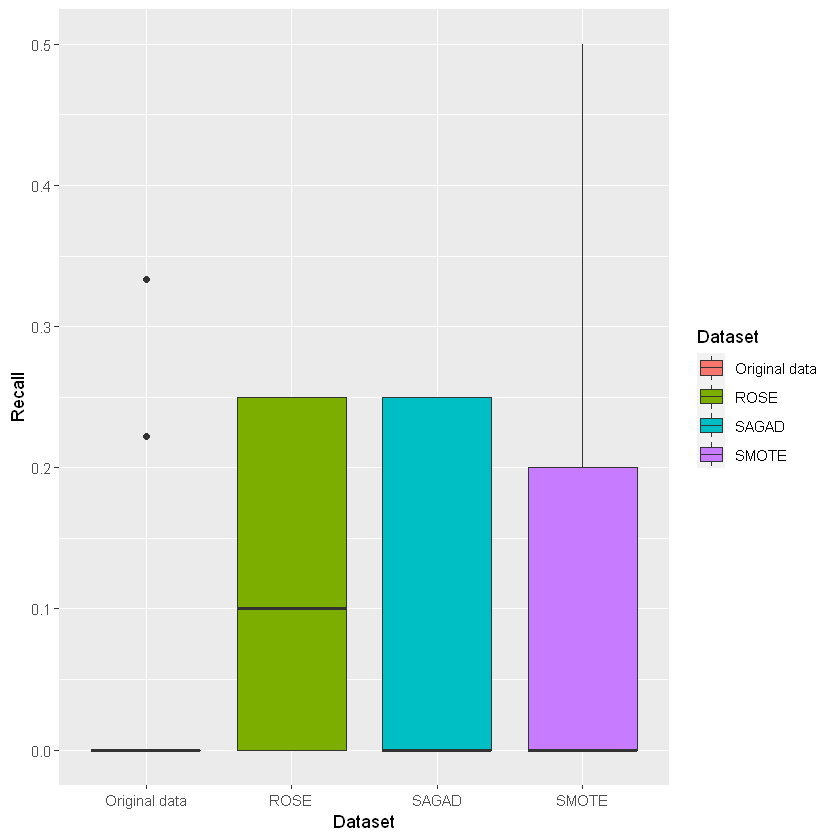

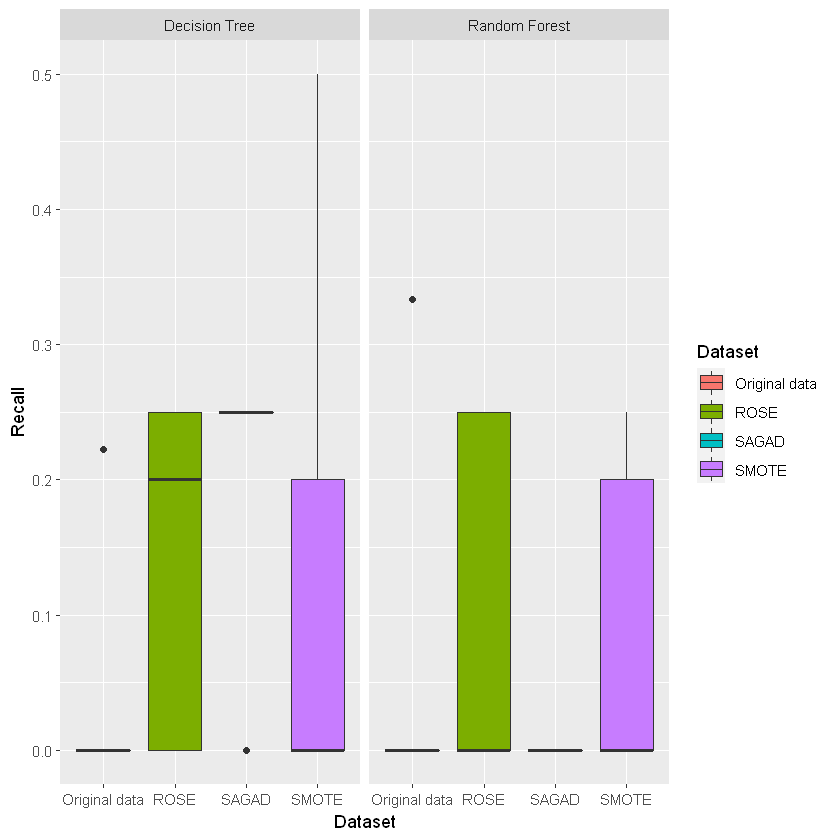

In [181]:
# Boxplot com o recall dos modelos de classificação
plot_recall <- ggplot(data_boxplot, aes(x=Dataset, y=Recall, group=Dataset)) + 
  geom_boxplot(aes(fill=Dataset))+
  ylim(c(0,0.5))
plot_recall

plot_recall + facet_grid(. ~ Model)

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."


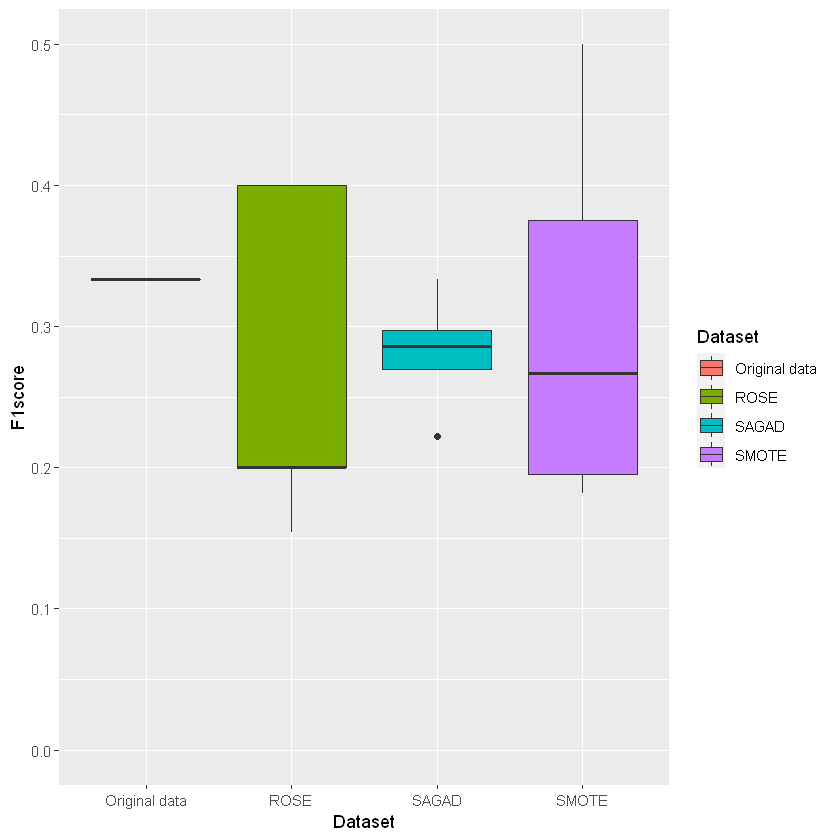

In [178]:
plot_F1score <- ggplot(data_boxplot, aes(x=Dataset, y=F1score, group=Dataset)) + 
  geom_boxplot(aes(fill=Dataset))+
  ylim(c(0,0.5))
plot_F1score


Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."


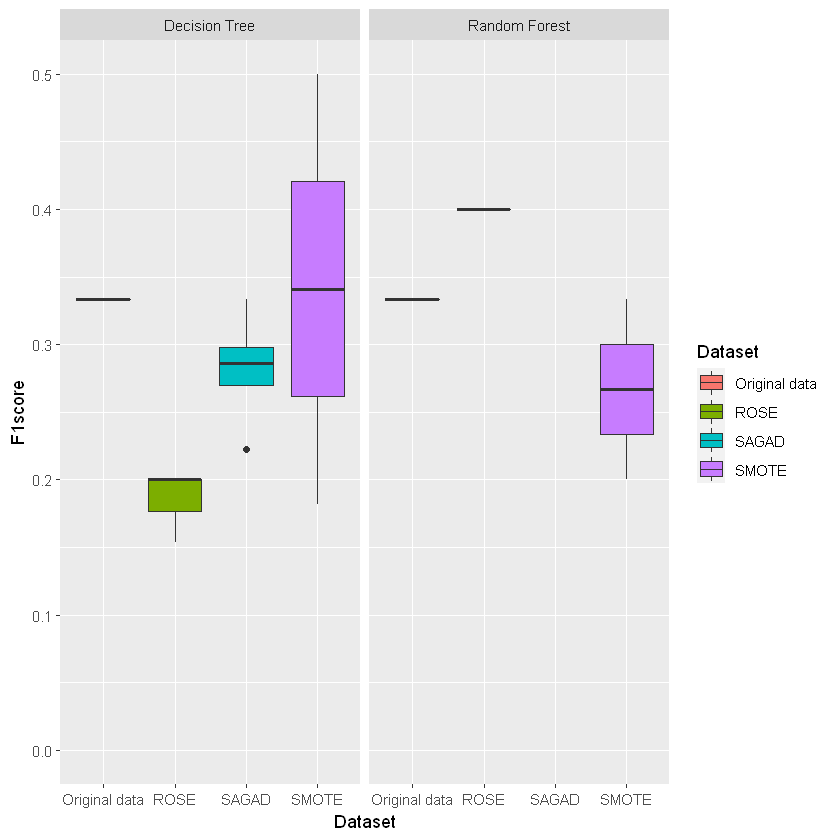

In [179]:
plot_F1score + facet_grid(. ~ Model)